In [1]:
import numpy as np; 
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install permetrics

In [3]:
dataset = pd.read_csv('table_orders.csv') # turned into parallel hexagon array
dataset.head()

time  617777515360944127  617777515367235583  \
0  2021-12-11 02:00:00                 0.0                 0.0   
1  2021-12-11 03:00:00                 0.0                 0.0   
2  2021-12-11 04:00:00                 0.0                 0.0   
3  2021-12-11 05:00:00                 0.0                 0.0   
4  2021-12-11 06:00:00                 0.0                 0.0   

   617777516383567871  617777516385140735  617777516387762175  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   617777516388810751  617777516389335039  617777516392218623  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   617777516392742911  ...  618464969374302207  618464969378234367  \
0                 0.0  ...                 0.0                 0.0   
1                 0.0  ...                 0.0                 0.0   
2                 0.0  ...                 0.0                 0.0   
3                 0.0  ...                 0.0                 0.0   
4                 0.0  ...                 0.0                 0.0   

   618464969583493119  618464969587687423  618464969588735999  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 2.0                 0.0   

   618464969642737663  618464969643261951  618464969645883391  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   618464969647194111  618464969647456255  
0                 0.0                 0.0  
1                 0.0                 0.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  

[5 rows x 4531 columns]

In [4]:
databbbb = dataset.set_index('time') # index

In [5]:
data = databbbb.iloc[0:100, 0:100] # cut saller array for productivity
data.shape

(100, 100)

In [6]:
#table1 = table.iloc[:1000 , :100]

In [7]:
#dataxx = databbbb.iloc[0:1000, 0:100]
#dataxx.shape

In [8]:

X = np.asarray(data) # exogenous 
y = np.asarray(data) # y = X as we predict fro one incoing variable


In [9]:
#train, test = train_test_split(data, test_size=1, random_state=42)

In [10]:
#y = np.asarray(databbbbar)

#databbbbar = np.asarray(databbbb)

In [11]:
#databbbbar = np.asarray(databbbbar)

In [12]:
data

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 0.0                 0.0  ...   
2021-12-11 03:00:00                 0.0                 0.0  ...   
2021-12-11 04:00:00                 0.0                 0.0  ...   
2021-12-11 05:00:00                 0.0                 0.0  ...   
2021-12-11 06:00:00                 0.0                 0.0  ...   
...                                 ...                 ...  ...   
2021-12-15 01:00:00                 0.0                 0.0  ...   
2021-12-15 02:00:00                 0.0                 0.0  ...   
2021-12-15 03:00:00                 0.0                 0.0  

In [13]:
y = np.asarray(data)

In [90]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4 # train_size=90 + test_size=10 = 100 array lenght
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

In [91]:
y_rf.shape

(10, 100)

In [92]:
# array to dataframe - predicts 

a = pd.DataFrame(y_rf,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape

(10, 100)

In [93]:
a = a+1 # add 1 to avoid zero calculations
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                1.08                1.02   
2021-12-11 03:00:00                1.11                1.11   
2021-12-11 04:00:00                1.00                1.00   
2021-12-11 05:00:00                1.15                1.07   
2021-12-11 06:00:00                1.14                1.00   
2021-12-11 07:00:00                1.00                1.00   
2021-12-11 08:00:00                1.03                1.01   
2021-12-11 09:00:00                1.00                1.00   
2021-12-11 10:00:00                1.15                1.02   
2021-12-11 11:00:00                1.00                1.00   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                1.09                1.06   
2021-12-11 03:00:00                1.07                1.03   
2021-12-11 04:00:00                1.00                1.00   
2021-12-11 05:00:00                1.06                1.05   
2021-12-11 06:00:00                1.01                1.00   
2021-12-11 07:00:00                1.00                1.00   
2021-12-11 08:00:00                1.00                1.00   
2021-12-11 09:00:00                1.00                1.00   
2021-12-11 10:00:00                1.11                1.03   
2021-12-11 11:00:00                1.00                1.00   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0                1.00   
2021-12-11 03:00:00                 1.0                1.00   
2021-12-11 04:00:00                 1.0                1.00   
2021-12-11 05:00:00                 1.0                1.01   
2021-12-11 06:00:00                 1.0                1.09   
2021-12-11 07:00:00                 1.0                1.00   
2021-12-11 08:00:00                 1.0                1.00   
2021-12-11 09:00:00                 1.0                1.00   
2021-12-11 10:00:00                 1.0                1.02   
2021-12-11 11:00:00                 1.0                1.00   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                1.00                 1.0   
2021-12-11 03:00:00                1.02                 1.0   
2021-12-11 04:00:00                1.00                 1.0   
2021-12-11 05:00:00                1.04                 1.0   
2021-12-11 06:00:00                1.12                 1.0   
2021-12-11 07:00:00                1.00                 1.0   
2021-12-11 08:00:00                1.00                 1.0   
2021-12-11 09:00:00                1.00                 1.0   
2021-12-11 10:00:00                1.04                 1.0   
2021-12-11 11:00:00                1.00                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0                1.14  ...   
2021-12-11 03:00:00                 1.0                1.10  ...   
2021-12-11 04:00:00                 1.0                1.00  ...   
2021-12-11 05:00:00                 1.0                1.13  ...   
2021-12-11 06:00:00                 1.0                1.19  ...   
2021-12-11 07:00:00                 1.0                1.00  ...   
2021-12-11 08:00:00                 1.0                1.04  ...   
2021-12-11 09:00:00                 1.0                1.00  ...   
2021-12-11 10:00:00                 1.0                1.20  ...   
2021-12-11 11:00:00                 1.0                1.00  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00                2.38           

In [94]:
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data[0:10].index,
                   columns=data[0:10].columns )


b.shape

(10, 100)

In [95]:
b = b+1
b

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 2.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 2.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0                 1.0  ...   
2021-12-11 03:00:00                 1.0                 1.0  ...   
2021-12-11 04:00:00                 1.0                 1.0  ...   
2021-12-11 05:00:00                 1.0                 1.0  ...   
2021-12-11 06:00:00                 1.0                 1.0  ...   
2021-12-11 07:00:00                 1.0                 1.0  ...   
2021-12-11 08:00:00                 1.0                 1.0  ...   
2021-12-11 09:00:00                 1.0                 1.0  ...   
2021-12-11 10:00:00                 1.0                 2.0  ...   
2021-12-11 11:00:00                 1.0                 1.0  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00                 4.0           

In [113]:
from numpy import array
from permetrics.regression import Metrics
columns = list(a)
#for column in a.columns:
    #for column in b.columns:
for i in columns:    
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        d = obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5)
        print(d)

## > 1-D array
        
       

0.05834
0.08634
0.09631
0.01624
0.0
0.01119
0.02032
0.0
0.0
0.11122
0.02868
0.0
0.0
0.0
0.18251
0.02583
0.09426
0.0
0.09863
0.0
0.0
0.0
0.0114
0.11986
0.01072
0.0
0.13548
0.06
0.0
0.0
0.17493
0.08242
0.08203
0.00582
0.02067
0.01576
0.0
0.0
0.0
0.0
0.01459
0.20075
0.0
0.0
0.11253
0.27367
0.0
0.03008
0.16043
0.01414
0.1787
0.18794
0.12461
0.07644
0.13318
0.11557
0.02167
0.30264
0.19942
0.00948
0.25196
0.02686
0.0
0.16474
0.188
0.0296
0.23253
0.0
0.14279
0.00967
0.0107
0.0
0.06619
0.24478
0.09848
0.0
0.21338
0.00752
0.00489
0.15736
0.07
0.19976
0.13133
0.11184
0.11686
0.04676
0.30627
0.2693
0.17068
0.23948
0.2885
0.2192
0.1612
0.30537
0.14225
0.28555
0.01876
0.21253
0.12896
0.24557


In [114]:
d

0.24557

In [29]:
from numpy import array
from permetrics.regression import Metrics

#columns = list(a) 
  
#for i in columns: 

#for column in a.columns:
    #for column in b.columns:
for i in columns:        
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=2))


0.06
0.08
0.09
0.02
0.0
0.01
0.02
0.0
0.0
0.11
0.03
0.0
0.0
0.0
0.18
0.03
0.08
0.0
0.09
0.0
0.0
0.0
0.01
0.15
0.01
0.0
0.13
0.07
0.0
0.0
0.2
0.07
0.07
0.01
0.02
0.02
0.0
0.0
0.0
0.0
0.02
0.22
0.0
0.0
0.11
0.26
0.0
0.03
0.15
0.01
0.25
0.18
0.12
0.08
0.14
0.11
0.02
0.3
0.22
0.01
0.25
0.03
0.0
0.16
0.21
0.03
0.26
0.0
0.2
0.01
0.01
0.0
0.07
0.24
0.12
0.0
0.2
0.01
0.0
0.17
0.08
0.23
0.13
0.11
0.13
0.05
0.29
0.3
0.19
0.25
0.31
0.2
0.14
0.33
0.14
0.27
0.02
0.18
0.14
0.3


In [462]:
error

0.61057

In [30]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_squared_log_error(clean=True, decimal=5))

0.00739
0.0403
0.0413
0.00075
0.0
0.00079
0.00163
0.0
0.0
0.03339
0.00321
0.0
0.0
0.0
0.09895
0.00212
0.03908
0.0
0.04854
0.0
0.0
0.0
0.00059
0.06632
0.00028
0.0
0.12287
0.0123
0.0
0.0
0.08833
0.04546
0.03848
0.00017
0.00131
0.00121
0.0
0.0
0.0
0.0
0.00136
0.08556
0.0
0.0
0.04026
0.17166
0.0
0.00282
0.06338
0.00084
0.16698
0.14707
0.03556
0.03146
0.04046
0.03337
0.00131
0.14339
0.10863
0.00051
0.14913
0.00303
0.0
0.06111
0.07449
0.00328
0.08462
0.0
0.1552
0.00033
0.0003
0.0
0.01313
0.10803
0.0419
0.0
0.22046
0.00047
0.00011
0.06501
0.01335
0.11499
0.04172
0.0456
0.0458
0.00603
0.20879
0.19033
0.1027
0.16145
0.24623
0.09199
0.04376
0.17126
0.0416
0.1371
0.00121
0.09718
0.0445
0.18797


In [31]:
from numpy import array
from permetrics.regression import Metrics
#for column1 in range(100):
    #for column2 in b.columns:
## 1-D array
for i in columns: 
        #if(column1==column2):
            y_true1 = a[i].to_numpy()
            y_pred1 = b[i].to_numpy()

            obj1 = Metrics(y_true1, y_pred1)
            print(obj1.nash_sutcliffe_efficiency_coefficient(clean=True, decimal=5))
            #d = nash_sutcliffe_efficiency_coefficient(clean=True, decimal=5)

-1.07715
-68.61935
-50.55452
-0.57685
nan
-0.20112
-0.36778
nan
nan
-11.0299
-0.39445
nan
nan
nan
-40.78049
-0.51042
-42.41141
nan
-66.42588
nan
nan
nan
-0.30252
0.1802
-0.71598
nan
-241.25768
-0.52036
nan
nan
-0.85193
-1000.66667
-108.20513
-0.25
-0.52838
-0.28306
nan
nan
nan
nan
-0.20253
0.31346
nan
nan
-6.54611
-5.21012
nan
-0.51344
-14.22642
-0.32847
0.10183
-10.60236
-2.64263
0.63795
-3.94738
-8.95251
-0.6144
-0.91218
-0.75683
-0.22727
-6.43085
-0.35156
nan
-5.32641
-2.43549
-0.40924
-2.6086
nan
0.39847
-0.41667
-0.64021
nan
-0.65708
-18.2805
-0.44724
nan
-71.28428
-0.14679
-0.29412
-1.01118
-0.78019
0.30215
-0.65415
-6.44108
0.79979
-0.69858
-4.88541
-8.57446
-1.54839
-2.53256
-3.26419
-1.13487
0.53972
-0.03331
-2.43667
-11.8184
-0.44444
-47.80895
-0.68189
-0.47331


In [32]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        d = mean_absolute_error(y_true1, y_pred1)

0.066
0.109
0.12
0.017
0.0
0.012
0.022
0.0
0.0
0.14
0.032
0.0
0.0
0.0
0.28
0.028
0.118
0.0
0.122
0.0
0.0
0.0
0.012
0.203
0.011
0.0
0.227
0.073
0.0
0.0
0.29
0.104
0.104
0.006
0.022
0.017
0.0
0.0
0.0
0.0
0.016
0.531
0.0
0.0
0.146
0.622
0.0
0.033
0.209
0.015
0.428
0.46
0.17
0.15
0.175
0.146
0.023
0.818
0.427
0.01
0.505
0.03
0.0
0.222
0.27
0.033
0.352
0.0
0.386
0.01
0.011
0.0
0.08
0.373
0.144
0.0
0.555
0.008
0.005
0.244
0.084
0.779
0.187
0.146
0.392
0.053
0.972
0.524
0.314
0.52
0.917
0.74
0.599
0.826
0.198
0.48
0.02
0.279
0.195
0.59


In [34]:

# recursive multi-step forecast with linear algorithms
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor

In [35]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lasso(random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lasso(random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [36]:
a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape

(10, 100)

In [37]:
a= a+1
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.1            1.077778   
2021-12-11 03:00:00                 1.1            1.077778   
2021-12-11 04:00:00                 1.1            1.077778   
2021-12-11 05:00:00                 1.1            1.077778   
2021-12-11 06:00:00                 1.1            1.077778   
2021-12-11 07:00:00                 1.1            1.077778   
2021-12-11 08:00:00                 1.1            1.077778   
2021-12-11 09:00:00                 1.1            1.077778   
2021-12-11 10:00:00                 1.1            1.077778   
2021-12-11 11:00:00                 1.1            1.077778   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00            1.033333            1.033333   
2021-12-11 03:00:00            1.033333            1.033333   
2021-12-11 04:00:00            1.033333            1.033333   
2021-12-11 05:00:00            1.033333            1.033333   
2021-12-11 06:00:00            1.033333            1.033333   
2021-12-11 07:00:00            1.033333            1.033333   
2021-12-11 08:00:00            1.033333            1.033333   
2021-12-11 09:00:00            1.033333            1.033333   
2021-12-11 10:00:00            1.033333            1.033333   
2021-12-11 11:00:00            1.033333            1.033333   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0            1.011111   
2021-12-11 03:00:00                 1.0            1.011111   
2021-12-11 04:00:00                 1.0            1.011111   
2021-12-11 05:00:00                 1.0            1.011111   
2021-12-11 06:00:00                 1.0            1.011111   
2021-12-11 07:00:00                 1.0            1.011111   
2021-12-11 08:00:00                 1.0            1.011111   
2021-12-11 09:00:00                 1.0            1.011111   
2021-12-11 10:00:00                 1.0            1.011111   
2021-12-11 11:00:00                 1.0            1.011111   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00            1.011111                 1.0   
2021-12-11 03:00:00            1.011111                 1.0   
2021-12-11 04:00:00            1.011111                 1.0   
2021-12-11 05:00:00            1.011111                 1.0   
2021-12-11 06:00:00            1.011111                 1.0   
2021-12-11 07:00:00            1.011111                 1.0   
2021-12-11 08:00:00            1.011111                 1.0   
2021-12-11 09:00:00            1.011111                 1.0   
2021-12-11 10:00:00            1.011111                 1.0   
2021-12-11 11:00:00            1.011111                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0            1.111111  ...   
2021-12-11 03:00:00                 1.0            1.111111  ...   
2021-12-11 04:00:00                 1.0            1.111111  ...   
2021-12-11 05:00:00                 1.0            1.111111  ...   
2021-12-11 06:00:00                 1.0            1.111111  ...   
2021-12-11 07:00:00                 1.0            1.111111  ...   
2021-12-11 08:00:00                 1.0            1.111111  ...   
2021-12-11 09:00:00                 1.0            1.111111  ...   
2021-12-11 10:00:00                 1.0            1.111111  ...   
2021-12-11 11:00:00                 1.0            1.111111  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00            2.789296           

In [38]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.09066
0.13561
0.10423
0.03225
0.0
0.01099
0.01099
0.0
0.0
0.15718
0.03225
0.0
0.0
0.0
0.18619
0.02174
0.10423
0.0
0.09588
0.0
0.0
0.0
0.01099
0.29138
0.01099
0.0
0.12894
0.02174
0.0
0.0
0.28023
0.08732
0.08732
0.01099
0.02174
0.01099
0.0
0.0
0.0
0.0
0.02174
0.27392
0.0
0.0
0.13561
0.48009
0.0
0.08145
0.21954
0.01099
0.30805
0.36503
0.20967
0.35091
0.17068
0.14298
0.01099
0.32099
0.41175
0.01099
0.37769
0.03225
0.0
0.21954
0.23923
0.02174
0.31628
0.0
0.22246
0.01099
0.01099
0.0
0.05258
0.27595
0.12555
0.0
0.26393
0.01099
0.01099
0.2643
0.06242
0.18612
0.24972
0.12031
0.21051
0.05258
0.51322
0.37081
0.29336
0.43098
0.34918
0.16946
0.18269
0.25163
0.23757
0.38981
0.02174
0.25206
0.22883
0.29698


In [39]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        d = mean_absolute_error(y_true1, y_pred1)

0.1
0.16222
0.12667
0.03333
0.0
0.01111
0.01111
0.0
0.0
0.18889
0.03333
0.0
0.0
0.0
0.28
0.02222
0.12667
0.0
0.11778
0.0
0.0
0.0
0.01111
0.40667
0.01111
0.0
0.21778
0.02222
0.0
0.0
0.38
0.10889
0.10889
0.01111
0.02222
0.01111
0.0
0.0
0.0
0.0
0.02222
0.57113
0.0
0.0
0.16222
0.92889
0.0
0.08889
0.27333
0.01111
0.45333
0.68889
0.26
0.52444
0.20667
0.17111
0.01111
0.78229
0.7379
0.01111
0.66667
0.03333
0.0
0.27333
0.31333
0.02222
0.46
0.0
0.37555
0.01111
0.01111
0.0
0.05556
0.4
0.14444
0.0
0.64667
0.01111
0.01111
0.34667
0.06667
0.44868
0.32
0.14444
0.46774
0.05556
1.31552
0.64
0.42667
0.76889
0.86497
0.5416
0.4877
0.5698
0.3
0.61556
0.02222
0.31778
0.28667
0.53581


In [339]:
import numpy as np 
import pandas as pd 
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

# fitting
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X, y)

# predicting
print(np.mean((multioutputregressor.predict(X) - y)**2, axis=0))

[1.98405346e-08 1.97654847e-08 7.80444179e-09 8.79951523e-09
 6.10004463e-32 1.48378389e-08 1.48378389e-08 6.10004463e-32
 6.10004463e-32 5.48708556e-09 1.70980607e-08 6.10004463e-32
 6.10004463e-32 6.10004463e-32 2.17268367e-08 1.89704885e-08
 7.80444179e-09 6.10004463e-32 8.79951523e-09 6.10004463e-32
 6.10004463e-32 6.10004463e-32 1.48378389e-08 2.32183431e-08
 1.48378389e-08 6.10004463e-32 1.84458280e-08 1.22909683e-08
 6.10004463e-32 6.10004463e-32 1.38961002e-08 1.22909683e-08
 1.22909683e-08 1.48378389e-08 1.22909683e-08 1.48378389e-08
 6.10004463e-32 6.10004463e-32 6.10004463e-32 6.10004463e-32
 1.89704885e-08 2.05631450e-08 6.10004463e-32 6.10004463e-32
 1.97654847e-08 1.05910363e-08 6.10004463e-32 1.98090746e-08
 1.63342295e-08 1.48378389e-08 1.36804590e-08 2.27231734e-08
 2.11647176e-08 2.35304652e-08 2.20147831e-08 5.82894763e-09
 1.48378389e-08 2.54861763e-08 2.37703928e-08 1.48378389e-08
 2.17159056e-08 1.70980607e-08 6.10004463e-32 5.38183575e-09
 1.77617232e-08 1.229096

In [44]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lasso()
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lasso()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [45]:
y_rfl.shape

(10, 100)

In [46]:
a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape

(10, 100)

In [47]:
a = a+1
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.1            1.077778   
2021-12-11 03:00:00                 1.1            1.077778   
2021-12-11 04:00:00                 1.1            1.077778   
2021-12-11 05:00:00                 1.1            1.077778   
2021-12-11 06:00:00                 1.1            1.077778   
2021-12-11 07:00:00                 1.1            1.077778   
2021-12-11 08:00:00                 1.1            1.077778   
2021-12-11 09:00:00                 1.1            1.077778   
2021-12-11 10:00:00                 1.1            1.077778   
2021-12-11 11:00:00                 1.1            1.077778   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00            1.033333            1.033333   
2021-12-11 03:00:00            1.033333            1.033333   
2021-12-11 04:00:00            1.033333            1.033333   
2021-12-11 05:00:00            1.033333            1.033333   
2021-12-11 06:00:00            1.033333            1.033333   
2021-12-11 07:00:00            1.033333            1.033333   
2021-12-11 08:00:00            1.033333            1.033333   
2021-12-11 09:00:00            1.033333            1.033333   
2021-12-11 10:00:00            1.033333            1.033333   
2021-12-11 11:00:00            1.033333            1.033333   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0            1.011111   
2021-12-11 03:00:00                 1.0            1.011111   
2021-12-11 04:00:00                 1.0            1.011111   
2021-12-11 05:00:00                 1.0            1.011111   
2021-12-11 06:00:00                 1.0            1.011111   
2021-12-11 07:00:00                 1.0            1.011111   
2021-12-11 08:00:00                 1.0            1.011111   
2021-12-11 09:00:00                 1.0            1.011111   
2021-12-11 10:00:00                 1.0            1.011111   
2021-12-11 11:00:00                 1.0            1.011111   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00            1.011111                 1.0   
2021-12-11 03:00:00            1.011111                 1.0   
2021-12-11 04:00:00            1.011111                 1.0   
2021-12-11 05:00:00            1.011111                 1.0   
2021-12-11 06:00:00            1.011111                 1.0   
2021-12-11 07:00:00            1.011111                 1.0   
2021-12-11 08:00:00            1.011111                 1.0   
2021-12-11 09:00:00            1.011111                 1.0   
2021-12-11 10:00:00            1.011111                 1.0   
2021-12-11 11:00:00            1.011111                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0            1.111111  ...   
2021-12-11 03:00:00                 1.0            1.111111  ...   
2021-12-11 04:00:00                 1.0            1.111111  ...   
2021-12-11 05:00:00                 1.0            1.111111  ...   
2021-12-11 06:00:00                 1.0            1.111111  ...   
2021-12-11 07:00:00                 1.0            1.111111  ...   
2021-12-11 08:00:00                 1.0            1.111111  ...   
2021-12-11 09:00:00                 1.0            1.111111  ...   
2021-12-11 10:00:00                 1.0            1.111111  ...   
2021-12-11 11:00:00                 1.0            1.111111  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00            2.789296           

In [48]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.09066
0.13561
0.10423
0.03225
0.0
0.01099
0.01099
0.0
0.0
0.15718
0.03225
0.0
0.0
0.0
0.18619
0.02174
0.10423
0.0
0.09588
0.0
0.0
0.0
0.01099
0.29138
0.01099
0.0
0.12894
0.02174
0.0
0.0
0.28023
0.08732
0.08732
0.01099
0.02174
0.01099
0.0
0.0
0.0
0.0
0.02174
0.27392
0.0
0.0
0.13561
0.48009
0.0
0.08145
0.21954
0.01099
0.30805
0.36503
0.20967
0.35091
0.17068
0.14298
0.01099
0.32099
0.41175
0.01099
0.37769
0.03225
0.0
0.21954
0.23923
0.02174
0.31628
0.0
0.22246
0.01099
0.01099
0.0
0.05258
0.27595
0.12555
0.0
0.26393
0.01099
0.01099
0.2643
0.06242
0.18612
0.24972
0.12031
0.21051
0.05258
0.51322
0.37081
0.29336
0.43098
0.34918
0.16946
0.18269
0.25163
0.23757
0.38981
0.02174
0.25206
0.22883
0.29698


In [49]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        d = mean_absolute_error(y_true1, y_pred1)

0.1
0.16222
0.12667
0.03333
0.0
0.01111
0.01111
0.0
0.0
0.18889
0.03333
0.0
0.0
0.0
0.28
0.02222
0.12667
0.0
0.11778
0.0
0.0
0.0
0.01111
0.40667
0.01111
0.0
0.21778
0.02222
0.0
0.0
0.38
0.10889
0.10889
0.01111
0.02222
0.01111
0.0
0.0
0.0
0.0
0.02222
0.57113
0.0
0.0
0.16222
0.92889
0.0
0.08889
0.27333
0.01111
0.45333
0.68889
0.26
0.52444
0.20667
0.17111
0.01111
0.78229
0.7379
0.01111
0.66667
0.03333
0.0
0.27333
0.31333
0.02222
0.46
0.0
0.37555
0.01111
0.01111
0.0
0.05556
0.4
0.14444
0.0
0.64667
0.01111
0.01111
0.34667
0.06667
0.44868
0.32
0.14444
0.46774
0.05556
1.31552
0.64
0.42667
0.76889
0.86497
0.5416
0.4877
0.5698
0.3
0.61556
0.02222
0.31778
0.28667
0.53581


In [50]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Ridge(alpha=4.0,random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = Ridge(random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [51]:
a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape

(10, 100)

In [54]:
a = a + 1
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00            0.963509            0.966932   
2021-12-11 03:00:00            1.026277            1.008510   
2021-12-11 04:00:00            1.059021            0.931892   
2021-12-11 05:00:00            1.238339            1.873151   
2021-12-11 06:00:00            0.946572            0.925107   
2021-12-11 07:00:00            1.008079            1.013528   
2021-12-11 08:00:00            1.050217            0.983145   
2021-12-11 09:00:00            0.997055            1.015520   
2021-12-11 10:00:00            0.946709            0.976389   
2021-12-11 11:00:00            1.012467            1.007079   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00            1.198805            1.044756   
2021-12-11 03:00:00            1.461061            0.973842   
2021-12-11 04:00:00            1.241724            0.898334   
2021-12-11 05:00:00            0.981112            1.240784   
2021-12-11 06:00:00            1.069301            0.816332   
2021-12-11 07:00:00            1.022589            1.018333   
2021-12-11 08:00:00            1.000052            1.014016   
2021-12-11 09:00:00            0.998797            1.011839   
2021-12-11 10:00:00            1.055292            1.298982   
2021-12-11 11:00:00            0.988415            1.002833   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0            0.963569   
2021-12-11 03:00:00                 1.0            1.009126   
2021-12-11 04:00:00                 1.0            0.944228   
2021-12-11 05:00:00                 1.0            1.162039   
2021-12-11 06:00:00                 1.0            1.141409   
2021-12-11 07:00:00                 1.0            0.980963   
2021-12-11 08:00:00                 1.0            1.028193   
2021-12-11 09:00:00                 1.0            0.979377   
2021-12-11 10:00:00                 1.0            1.061302   
2021-12-11 11:00:00                 1.0            0.994781   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00            0.992791                 1.0   
2021-12-11 03:00:00            1.123991                 1.0   
2021-12-11 04:00:00            0.929593                 1.0   
2021-12-11 05:00:00            0.910803                 1.0   
2021-12-11 06:00:00            0.944332                 1.0   
2021-12-11 07:00:00            1.010641                 1.0   
2021-12-11 08:00:00            1.006534                 1.0   
2021-12-11 09:00:00            0.998949                 1.0   
2021-12-11 10:00:00            1.040529                 1.0   
2021-12-11 11:00:00            0.996502                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0            1.030815  ...   
2021-12-11 03:00:00                 1.0            1.108083  ...   
2021-12-11 04:00:00                 1.0            0.908561  ...   
2021-12-11 05:00:00                 1.0            1.165562  ...   
2021-12-11 06:00:00                 1.0            0.974438  ...   
2021-12-11 07:00:00                 1.0            0.990279  ...   
2021-12-11 08:00:00                 1.0            1.014736  ...   
2021-12-11 09:00:00                 1.0            1.005834  ...   
2021-12-11 10:00:00                 1.0            1.695778  ...   
2021-12-11 11:00:00                 1.0            1.012137  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00            3.941557           

In [56]:
b

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 2.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 2.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0                 1.0  ...   
2021-12-11 03:00:00                 1.0                 1.0  ...   
2021-12-11 04:00:00                 1.0                 1.0  ...   
2021-12-11 05:00:00                 1.0                 1.0  ...   
2021-12-11 06:00:00                 1.0                 1.0  ...   
2021-12-11 07:00:00                 1.0                 1.0  ...   
2021-12-11 08:00:00                 1.0                 1.0  ...   
2021-12-11 09:00:00                 1.0                 1.0  ...   
2021-12-11 10:00:00                 1.0                 2.0  ...   
2021-12-11 11:00:00                 1.0                 1.0  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00                 4.0           

In [57]:
from numpy import array
from permetrics.regression import Metrics

a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape


for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.28145
-0.04995
0.53155
0.57499
1.5708
-0.03257
-0.313
1.5708
1.5708
0.55299
-0.00327
1.5708
1.5708
1.5708
0.16091
1.22007
-0.02177
1.5708
0.24905
1.5708
1.5708
1.5708
0.00144
1.02295
0.3126
1.5708
0.56264
0.27466
1.5708
1.5708
1.05159
-0.64365
0.21881
-0.0824
-0.67419
-0.02956
1.5708
1.5708
1.5708
1.5708
-0.95259
0.21854
1.5708
1.5708
-0.04734
0.27454
1.5708
0.61784
-0.14527
-0.01518
0.72565
-0.26745
0.20503
0.35018
-0.05461
-0.03989
0.86686
0.98803
0.06709
0.2673
0.0715
-0.63254
1.5708
-0.13683
0.51349
-0.1068
0.71585
1.5708
0.85671
-0.01239
0.59333
1.5708
0.29183
0.45742
-0.00073
1.5708
0.73507
0.3124
-0.62732
-0.12377
-0.63428
0.67134
0.43358
0.23669
0.39347
-0.63141
0.43363
0.42338
-0.78958
0.2865
0.77821
0.51999
0.50181
0.71479
1.09441
0.03617
-0.03718
0.51099
0.13217
1.25808


In [58]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        d = mean_absolute_error(y_true1, y_pred1)

0.97518
1.02987
0.99829
0.96799
1.0
0.9735
1.00453
1.0
1.0
1.00938
1.00372
1.0
1.0
1.0
0.98016
0.96552
1.06263
1.0
1.0357
1.0
1.0
1.0
1.00296
0.938
1.00558
1.0
1.10599
0.96973
1.0
1.0
0.95996
1.07807
1.01725
0.95618
0.96787
0.97905
1.0
1.0
1.0
1.0
0.99361
1.01364
1.0
1.0
1.04396
1.03846
1.0
0.99133
1.01346
0.99126
0.95196
1.04022
1.04979
0.99622
1.02718
1.04824
0.93431
0.99426
0.99136
0.96217
1.00028
1.00418
1.0
1.0272
0.96793
0.93223
1.00953
1.0
0.97438
0.99437
0.97002
1.0
0.99212
1.03184
1.00071
1.0
1.04765
1.00095
1.0068
1.03557
1.00061
1.00466
0.96921
1.01924
1.00146
1.02073
1.0165
1.01474
1.04325
0.98842
1.00333
1.02058
0.99557
1.00025
0.99594
1.02957
0.97031
1.15132
0.97903
0.97527


In [59]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    ElasticNet(alpha=2.0,random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = ElasticNet(random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [61]:
from numpy import array
from permetrics.regression import Metrics

a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 0.1            0.077778   
2021-12-11 03:00:00                 0.1            0.077778   
2021-12-11 04:00:00                 0.1            0.077778   
2021-12-11 05:00:00                 0.1            0.077778   
2021-12-11 06:00:00                 0.1            0.077778   
2021-12-11 07:00:00                 0.1            0.077778   
2021-12-11 08:00:00                 0.1            0.077778   
2021-12-11 09:00:00                 0.1            0.077778   
2021-12-11 10:00:00                 0.1            0.077778   
2021-12-11 11:00:00                 0.1            0.077778   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00            0.033333            0.033333   
2021-12-11 03:00:00            0.033333            0.033333   
2021-12-11 04:00:00            0.033333            0.033333   
2021-12-11 05:00:00            0.033333            0.033333   
2021-12-11 06:00:00            0.033333            0.033333   
2021-12-11 07:00:00            0.033333            0.033333   
2021-12-11 08:00:00            0.033333            0.033333   
2021-12-11 09:00:00            0.033333            0.033333   
2021-12-11 10:00:00            0.033333            0.033333   
2021-12-11 11:00:00            0.033333            0.033333   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 0.0            0.011111   
2021-12-11 03:00:00                 0.0            0.011111   
2021-12-11 04:00:00                 0.0            0.011111   
2021-12-11 05:00:00                 0.0            0.011111   
2021-12-11 06:00:00                 0.0            0.011111   
2021-12-11 07:00:00                 0.0            0.011111   
2021-12-11 08:00:00                 0.0            0.011111   
2021-12-11 09:00:00                 0.0            0.011111   
2021-12-11 10:00:00                 0.0            0.011111   
2021-12-11 11:00:00                 0.0            0.011111   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00            0.011111                 0.0   
2021-12-11 03:00:00            0.011111                 0.0   
2021-12-11 04:00:00            0.011111                 0.0   
2021-12-11 05:00:00            0.011111                 0.0   
2021-12-11 06:00:00            0.011111                 0.0   
2021-12-11 07:00:00            0.011111                 0.0   
2021-12-11 08:00:00            0.011111                 0.0   
2021-12-11 09:00:00            0.011111                 0.0   
2021-12-11 10:00:00            0.011111                 0.0   
2021-12-11 11:00:00            0.011111                 0.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 0.0            0.111111  ...   
2021-12-11 03:00:00                 0.0            0.111111  ...   
2021-12-11 04:00:00                 0.0            0.111111  ...   
2021-12-11 05:00:00                 0.0            0.111111  ...   
2021-12-11 06:00:00                 0.0            0.111111  ...   
2021-12-11 07:00:00                 0.0            0.111111  ...   
2021-12-11 08:00:00                 0.0            0.111111  ...   
2021-12-11 09:00:00                 0.0            0.111111  ...   
2021-12-11 10:00:00                 0.0            0.111111  ...   
2021-12-11 11:00:00                 0.0            0.111111  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00            2.062448           

In [62]:
a = a + 1 
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.1            1.077778   
2021-12-11 03:00:00                 1.1            1.077778   
2021-12-11 04:00:00                 1.1            1.077778   
2021-12-11 05:00:00                 1.1            1.077778   
2021-12-11 06:00:00                 1.1            1.077778   
2021-12-11 07:00:00                 1.1            1.077778   
2021-12-11 08:00:00                 1.1            1.077778   
2021-12-11 09:00:00                 1.1            1.077778   
2021-12-11 10:00:00                 1.1            1.077778   
2021-12-11 11:00:00                 1.1            1.077778   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00            1.033333            1.033333   
2021-12-11 03:00:00            1.033333            1.033333   
2021-12-11 04:00:00            1.033333            1.033333   
2021-12-11 05:00:00            1.033333            1.033333   
2021-12-11 06:00:00            1.033333            1.033333   
2021-12-11 07:00:00            1.033333            1.033333   
2021-12-11 08:00:00            1.033333            1.033333   
2021-12-11 09:00:00            1.033333            1.033333   
2021-12-11 10:00:00            1.033333            1.033333   
2021-12-11 11:00:00            1.033333            1.033333   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0            1.011111   
2021-12-11 03:00:00                 1.0            1.011111   
2021-12-11 04:00:00                 1.0            1.011111   
2021-12-11 05:00:00                 1.0            1.011111   
2021-12-11 06:00:00                 1.0            1.011111   
2021-12-11 07:00:00                 1.0            1.011111   
2021-12-11 08:00:00                 1.0            1.011111   
2021-12-11 09:00:00                 1.0            1.011111   
2021-12-11 10:00:00                 1.0            1.011111   
2021-12-11 11:00:00                 1.0            1.011111   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00            1.011111                 1.0   
2021-12-11 03:00:00            1.011111                 1.0   
2021-12-11 04:00:00            1.011111                 1.0   
2021-12-11 05:00:00            1.011111                 1.0   
2021-12-11 06:00:00            1.011111                 1.0   
2021-12-11 07:00:00            1.011111                 1.0   
2021-12-11 08:00:00            1.011111                 1.0   
2021-12-11 09:00:00            1.011111                 1.0   
2021-12-11 10:00:00            1.011111                 1.0   
2021-12-11 11:00:00            1.011111                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0            1.111111  ...   
2021-12-11 03:00:00                 1.0            1.111111  ...   
2021-12-11 04:00:00                 1.0            1.111111  ...   
2021-12-11 05:00:00                 1.0            1.111111  ...   
2021-12-11 06:00:00                 1.0            1.111111  ...   
2021-12-11 07:00:00                 1.0            1.111111  ...   
2021-12-11 08:00:00                 1.0            1.111111  ...   
2021-12-11 09:00:00                 1.0            1.111111  ...   
2021-12-11 10:00:00                 1.0            1.111111  ...   
2021-12-11 11:00:00                 1.0            1.111111  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00            3.062448           

In [63]:



for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.09066
0.13561
0.10423
0.03225
0.0
0.01099
0.01099
0.0
0.0
0.15718
0.03225
0.0
0.0
0.0
0.18619
0.02174
0.10423
0.0
0.09588
0.0
0.0
0.0
0.01099
0.28209
0.01099
0.0
0.12894
0.02174
0.0
0.0
0.28023
0.08732
0.08732
0.01099
0.02174
0.01099
0.0
0.0
0.0
0.0
0.02174
0.22923
0.0
0.0
0.13561
0.46999
0.0
0.08145
0.21954
0.01099
0.21586
0.3359
0.20967
0.30551
0.17068
0.14298
0.01099
0.26209
0.28599
0.01099
0.35812
0.03225
0.0
0.21954
0.23923
0.02174
0.31628
0.0
0.19285
0.01099
0.01099
0.0
0.05258
0.27595
0.12555
0.0
0.26393
0.01099
0.01099
0.2583
0.06242
0.16926
0.24972
0.12031
0.18504
0.05258
0.35798
0.33009
0.29336
0.33638
0.27797
0.13756
0.16372
0.21458
0.23757
0.38981
0.02174
0.25206
0.22883
0.22995


In [64]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        d = mean_absolute_error(y_true1, y_pred1)

0.1
0.16222
0.12667
0.03333
0.0
0.01111
0.01111
0.0
0.0
0.18889
0.03333
0.0
0.0
0.0
0.28
0.02222
0.12667
0.0
0.11778
0.0
0.0
0.0
0.01111
0.39219
0.01111
0.0
0.21778
0.02222
0.0
0.0
0.38
0.10889
0.10889
0.01111
0.02222
0.01111
0.0
0.0
0.0
0.0
0.02222
0.45866
0.0
0.0
0.16222
0.91014
0.0
0.08889
0.27333
0.01111
0.30418
0.65017
0.26
0.45211
0.20667
0.17111
0.01111
0.61478
0.49956
0.01111
0.63121
0.03333
0.0
0.27333
0.31333
0.02222
0.46
0.0
0.30824
0.01111
0.01111
0.0
0.05556
0.4
0.14444
0.0
0.64667
0.01111
0.01111
0.34016
0.06667
0.39912
0.32
0.14444
0.40051
0.05556
0.93414
0.5614
0.42667
0.59886
0.66982
0.44066
0.42983
0.4707
0.3
0.61556
0.02222
0.31778
0.28667
0.38745


In [74]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lars()
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lars()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [75]:
from numpy import array
from permetrics.regression import Metrics

a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape
a = a+1
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 2.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 2.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0                 1.0  ...   
2021-12-11 03:00:00                 1.0                 1.0  ...   
2021-12-11 04:00:00                 1.0                 1.0  ...   
2021-12-11 05:00:00                 1.0                 1.0  ...   
2021-12-11 06:00:00                 1.0                 1.0  ...   
2021-12-11 07:00:00                 1.0                 1.0  ...   
2021-12-11 08:00:00                 1.0                 1.0  ...   
2021-12-11 09:00:00                 1.0                 1.0  ...   
2021-12-11 10:00:00                 1.0                 2.0  ...   
2021-12-11 11:00:00                 1.0                 1.0  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00                 4.0           

In [76]:
b


617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 2.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 2.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0                 1.0  ...   
2021-12-11 03:00:00                 1.0                 1.0  ...   
2021-12-11 04:00:00                 1.0                 1.0  ...   
2021-12-11 05:00:00                 1.0                 1.0  ...   
2021-12-11 06:00:00                 1.0                 1.0  ...   
2021-12-11 07:00:00                 1.0                 1.0  ...   
2021-12-11 08:00:00                 1.0                 1.0  ...   
2021-12-11 09:00:00                 1.0                 1.0  ...   
2021-12-11 10:00:00                 1.0                 2.0  ...   
2021-12-11 11:00:00                 1.0                 1.0  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00                 4.0           

In [77]:


for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [78]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        d = mean_absolute_error(y_true1, y_pred1)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [79]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    LassoLars(alpha=8.0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = LassoLars(alpha=8.0)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [82]:
from numpy import array
from permetrics.regression import Metrics

a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape
a = a+1
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.1            1.077778   
2021-12-11 03:00:00                 1.1            1.077778   
2021-12-11 04:00:00                 1.1            1.077778   
2021-12-11 05:00:00                 1.1            1.077778   
2021-12-11 06:00:00                 1.1            1.077778   
2021-12-11 07:00:00                 1.1            1.077778   
2021-12-11 08:00:00                 1.1            1.077778   
2021-12-11 09:00:00                 1.1            1.077778   
2021-12-11 10:00:00                 1.1            1.077778   
2021-12-11 11:00:00                 1.1            1.077778   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00            1.033333            1.033333   
2021-12-11 03:00:00            1.033333            1.033333   
2021-12-11 04:00:00            1.033333            1.033333   
2021-12-11 05:00:00            1.033333            1.033333   
2021-12-11 06:00:00            1.033333            1.033333   
2021-12-11 07:00:00            1.033333            1.033333   
2021-12-11 08:00:00            1.033333            1.033333   
2021-12-11 09:00:00            1.033333            1.033333   
2021-12-11 10:00:00            1.033333            1.033333   
2021-12-11 11:00:00            1.033333            1.033333   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0            1.011111   
2021-12-11 03:00:00                 1.0            1.011111   
2021-12-11 04:00:00                 1.0            1.011111   
2021-12-11 05:00:00                 1.0            1.011111   
2021-12-11 06:00:00                 1.0            1.011111   
2021-12-11 07:00:00                 1.0            1.011111   
2021-12-11 08:00:00                 1.0            1.011111   
2021-12-11 09:00:00                 1.0            1.011111   
2021-12-11 10:00:00                 1.0            1.011111   
2021-12-11 11:00:00                 1.0            1.011111   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00            1.011111                 1.0   
2021-12-11 03:00:00            1.011111                 1.0   
2021-12-11 04:00:00            1.011111                 1.0   
2021-12-11 05:00:00            1.011111                 1.0   
2021-12-11 06:00:00            1.011111                 1.0   
2021-12-11 07:00:00            1.011111                 1.0   
2021-12-11 08:00:00            1.011111                 1.0   
2021-12-11 09:00:00            1.011111                 1.0   
2021-12-11 10:00:00            1.011111                 1.0   
2021-12-11 11:00:00            1.011111                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0            1.111111  ...   
2021-12-11 03:00:00                 1.0            1.111111  ...   
2021-12-11 04:00:00                 1.0            1.111111  ...   
2021-12-11 05:00:00                 1.0            1.111111  ...   
2021-12-11 06:00:00                 1.0            1.111111  ...   
2021-12-11 07:00:00                 1.0            1.111111  ...   
2021-12-11 08:00:00                 1.0            1.111111  ...   
2021-12-11 09:00:00                 1.0            1.111111  ...   
2021-12-11 10:00:00                 1.0            1.111111  ...   
2021-12-11 11:00:00                 1.0            1.111111  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00            1.922222           

In [83]:



for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.09066
0.13561
0.10423
0.03225
0.0
0.01099
0.01099
0.0
0.0
0.15718
0.03225
0.0
0.0
0.0
0.18619
0.02174
0.10423
0.0
0.09588
0.0
0.0
0.0
0.01099
0.29138
0.01099
0.0
0.12894
0.02174
0.0
0.0
0.28023
0.08732
0.08732
0.01099
0.02174
0.01099
0.0
0.0
0.0
0.0
0.02174
0.45577
0.0
0.0
0.13561
0.48009
0.0
0.08145
0.21954
0.01099
0.30805
0.36503
0.20967
0.35091
0.17068
0.14298
0.01099
0.53677
0.42928
0.01099
0.37769
0.03225
0.0
0.21954
0.23923
0.02174
0.31628
0.0
0.38
0.01099
0.01099
0.0
0.05258
0.27595
0.12555
0.0
0.26393
0.01099
0.01099
0.2643
0.06242
0.53581
0.24972
0.12031
0.51051
0.05258
0.62497
0.37081
0.29336
0.43098
0.55819
0.39161
0.57621
0.47905
0.23757
0.38981
0.02174
0.25206
0.22883
0.40329


In [84]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

0.1
0.30082
0.30732
0.03333
0.0
0.01111
0.01111
0.0
0.0
0.30021
0.03333
0.0
0.0
0.0
0.60828
0.02222
0.30732
0.0
0.30992
0.0
0.0
0.0
0.01111
0.42528
0.01111
0.0
0.62578
0.02222
0.0
0.0
0.41231
0.31289
0.31289
0.01111
0.02222
0.01111
0.0
0.0
0.0
0.0
0.02222
1.37764
0.0
0.0
0.30082
1.33726
0.0
0.08889
0.40749
0.01111
0.45758
1.25806
0.41231
0.66925
0.30185
0.30021
0.01111
1.69982
1.02566
0.01111
1.04851
0.03333
0.0
0.40749
0.34319
0.02222
0.46904
0.0
0.9434
0.01111
0.01111
0.0
0.05556
0.65405
0.14444
0.0
1.58515
0.01111
0.01111
0.40246
0.06667
2.41615
0.4
0.30327
1.67763
0.05556
2.26759
0.91652
0.64645
1.03518
1.98814
1.55258
2.1725
1.54108
0.40139
0.83341
0.02222
0.5247
0.40384
0.96616


In [85]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS

# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    LinearRegression()
)
regr_multirf.fit(X_train, y_train)

regr_rf = LinearRegression()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [87]:
from numpy import array
from permetrics.regression import Metrics

a = pd.DataFrame(y_rfl,
                   index=data[0:10].index,
                   columns=data[0:10].columns )


a.shape
a = a +1
a

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 2.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 2.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 1.0            1.020619   
2021-12-11 03:00:00                 1.0            1.000000   
2021-12-11 04:00:00                 1.0            1.000000   
2021-12-11 05:00:00                 1.0            0.979381   
2021-12-11 06:00:00                 1.0            0.979381   
2021-12-11 07:00:00                 1.0            1.000000   
2021-12-11 08:00:00                 1.0            1.000000   
2021-12-11 09:00:00                 1.0            1.000000   
2021-12-11 10:00:00                 1.0            0.979381   
2021-12-11 11:00:00                 1.0            1.000000   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 1.0                 1.0   
2021-12-11 03:00:00                 1.0                 1.0   
2021-12-11 04:00:00                 1.0                 1.0   
2021-12-11 05:00:00                 1.0                 1.0   
2021-12-11 06:00:00                 1.0                 1.0   
2021-12-11 07:00:00                 1.0                 1.0   
2021-12-11 08:00:00                 1.0                 1.0   
2021-12-11 09:00:00                 1.0                 1.0   
2021-12-11 10:00:00                 1.0                 1.0   
2021-12-11 11:00:00                 1.0                 1.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 1.0                 1.0  ...   
2021-12-11 03:00:00                 1.0                 1.0  ...   
2021-12-11 04:00:00                 1.0                 1.0  ...   
2021-12-11 05:00:00                 1.0                 1.0  ...   
2021-12-11 06:00:00                 1.0                 1.0  ...   
2021-12-11 07:00:00                 1.0                 1.0  ...   
2021-12-11 08:00:00                 1.0                 1.0  ...   
2021-12-11 09:00:00                 1.0                 1.0  ...   
2021-12-11 10:00:00                 1.0                 2.0  ...   
2021-12-11 11:00:00                 1.0                 1.0  ...   

                     618091109474107391  618091109474631679  \
time                                                          
2021-12-11 02:00:00                 4.0           

In [88]:


for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.0
0.0
0.0
0.0
0.0
0.00833
0.0
0.0
0.0
0.0
0.01107
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08695
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07018
0.0
0.00415
0.0
0.0
0.0
0.0
0.0
0.0394
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08695
0.0
0.0
0.00588
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0041
0.00588
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02268
0.0
0.0
0.0
0.0
0.00322
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01219
0.05905
0.0
0.0


In [89]:

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

0.0
0.0
0.0
0.0
0.0
0.01304
0.0
0.0
0.0
0.0
0.03953
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14996
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14996
0.0
0.00652
0.0
0.0
0.0
0.0
0.0
0.0652
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14996
0.0
0.0
0.01976
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.00652
0.01976
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05929
0.0
0.0
0.0
0.0
0.01976
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01956
0.14996
0.0
0.0


In [ ]:
## Bad models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

In [392]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [393]:
data

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2021-12-15 01:00:00                 0.0                 0.0   
2021-12-15 02:00:00                 0.0                 0.0   
2021-12-15 03:00:00                 0.0                 0.0   
2021-12-15 04:00:00                 0.0                 0.0   
2021-12-15 05:00:00                 0.0                 0.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 0.0                 0.0  ...   
2021-12-11 03:00:00                 0.0                 0.0  ...   
2021-12-11 04:00:00                 0.0                 0.0  ...   
2021-12-11 05:00:00                 0.0                 0.0  ...   
2021-12-11 06:00:00                 0.0                 0.0  ...   
...                                 ...                 ...  ...   
2021-12-15 01:00:00                 0.0                 0.0  ...   
2021-12-15 02:00:00                 0.0                 0.0  ...   
2021-12-15 03:00:00                 0.0                 0.0  

In [394]:
#table11 = np.asarray(data)

In [404]:
dataxx

617777515360944127  617777515367235583  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-01-23 13:00:00                 0.0                 0.0   
2022-01-23 14:00:00                 0.0                 0.0   
2022-01-23 15:00:00                 0.0                 0.0   
2022-01-23 16:00:00                 1.0                 0.0   
2022-01-23 17:00:00                 0.0                 0.0   

                     617777516383567871  617777516385140735  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-01-23 13:00:00                 0.0                 0.0   
2022-01-23 14:00:00                 0.0                 0.0   
2022-01-23 15:00:00                 0.0                 0.0   
2022-01-23 16:00:00                 0.0                 0.0   
2022-01-23 17:00:00                 0.0                 0.0   

                     617777516387762175  617777516388810751  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-01-23 13:00:00                 0.0                 0.0   
2022-01-23 14:00:00                 0.0                 0.0   
2022-01-23 15:00:00                 0.0                 0.0   
2022-01-23 16:00:00                 0.0                 0.0   
2022-01-23 17:00:00                 0.0                 0.0   

                     617777516389335039  617777516392218623  \
time                                                          
2021-12-11 02:00:00                 0.0                 0.0   
2021-12-11 03:00:00                 0.0                 0.0   
2021-12-11 04:00:00                 0.0                 0.0   
2021-12-11 05:00:00                 0.0                 0.0   
2021-12-11 06:00:00                 0.0                 0.0   
...                                 ...                 ...   
2022-01-23 13:00:00                 0.0                 0.0   
2022-01-23 14:00:00                 1.0                 0.0   
2022-01-23 15:00:00                 0.0                 0.0   
2022-01-23 16:00:00                 1.0                 0.0   
2022-01-23 17:00:00                 1.0                 0.0   

                     617777516392742911  617777516393005055  ...  \
time                                                         ...   
2021-12-11 02:00:00                 0.0                 0.0  ...   
2021-12-11 03:00:00                 0.0                 0.0  ...   
2021-12-11 04:00:00                 0.0                 0.0  ...   
2021-12-11 05:00:00                 0.0                 0.0  ...   
2021-12-11 06:00:00                 0.0                 0.0  ...   
...                                 ...                 ...  ...   
2022-01-23 13:00:00                 0.0                 0.0  ...   
2022-01-23 14:00:00                 0.0                 0.0  ...   
2022-01-23 15:00:00                 0.0                 0.0  

In [406]:
table11 = pd.Series(list(dataxx)) # Серии для вывода
table11 = table11.astype(float)

In [496]:
dataxx1 = dataxx[0:100]
dataxx1.shape

(100, 100)

In [407]:
table11.shape

(100,)

In [397]:
y = table11

In [398]:
end_validation = 60

In [399]:
table11.shape

(100,)

In [400]:
#table11 = pd.Series(list(table1))

In [412]:
forecaster = ForecasterAutoregMultiOutput(
                regressor = LGBMRegressor(max_depth=4),
                steps     = 36,
                lags      = 20 # This value will be replaced in the grid search
             )

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}

# Lags used as predictors
lags_grid = [[1, 2, 3, 4, 20], [1, 2, 3, 10, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = table11,
                        exog        = dataxx1,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 20,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 90,
                        return_best = True,
                        verbose     = False
                  )

Number of models compared: 8


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:05<00:00,  2.84s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4 20] 
  Parameters: {'max_depth': 4, 'n_estimators': 100}
  Backtesting metric: 302093760623872.0



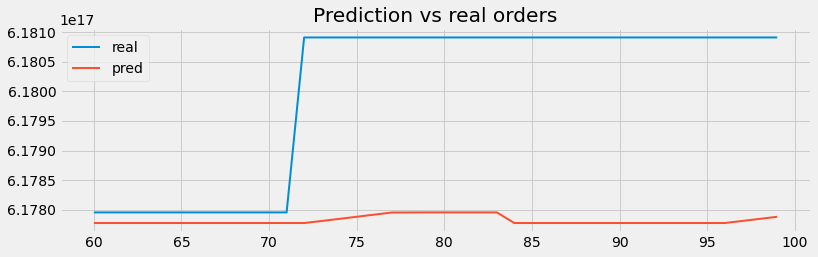

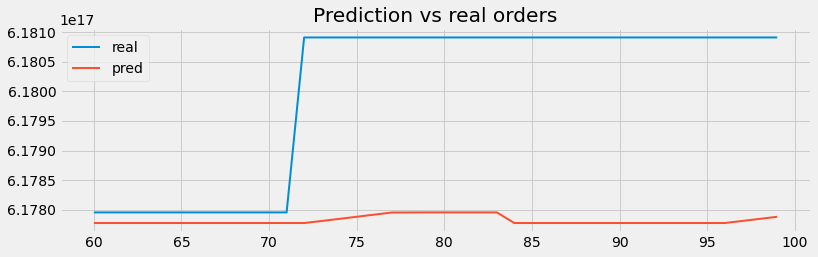

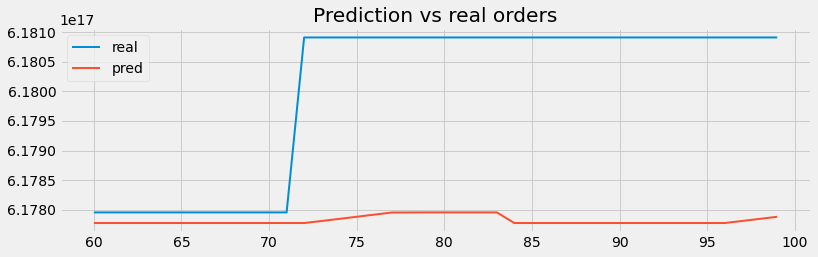

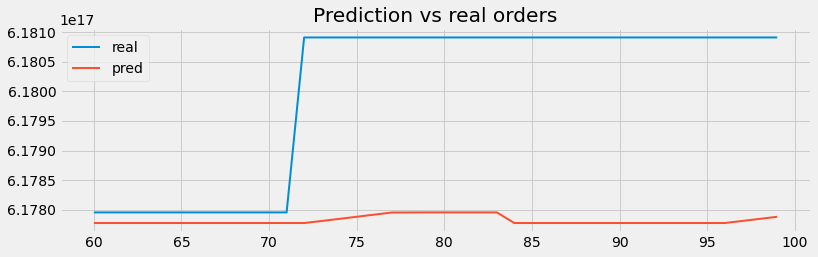

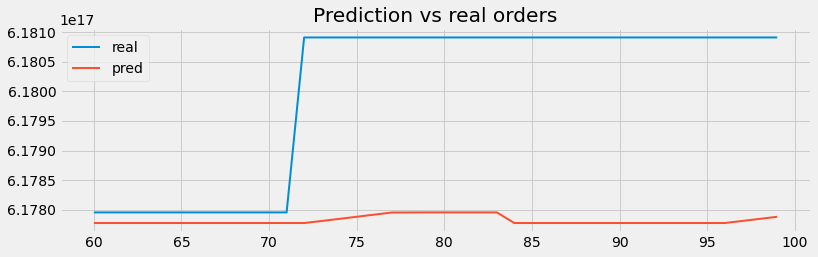

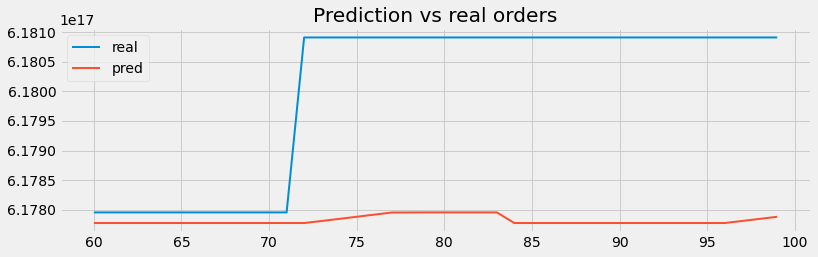

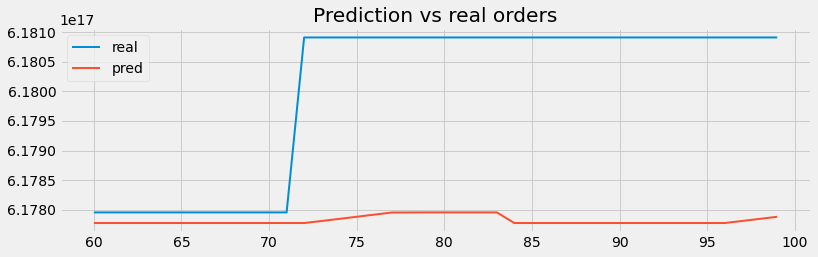

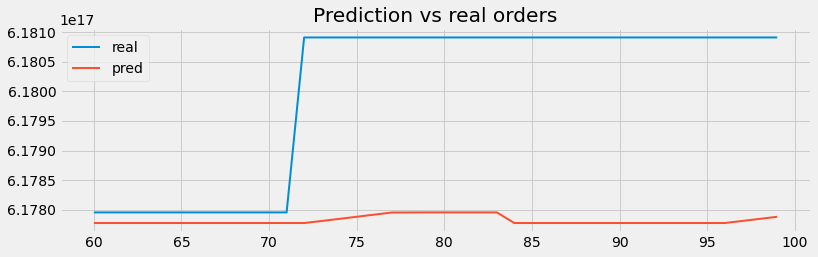

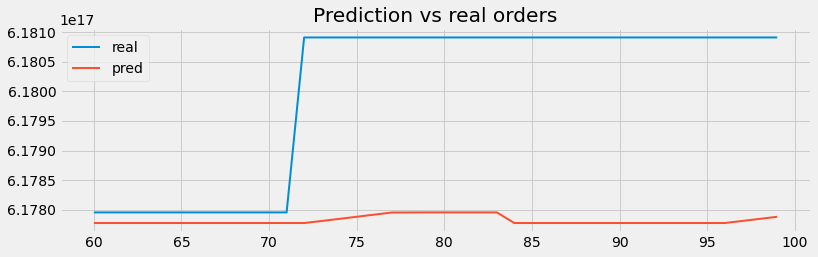

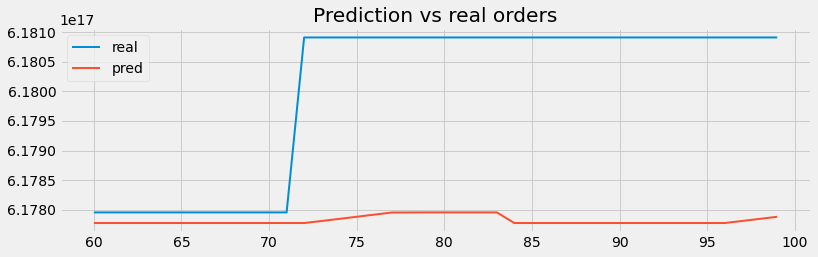

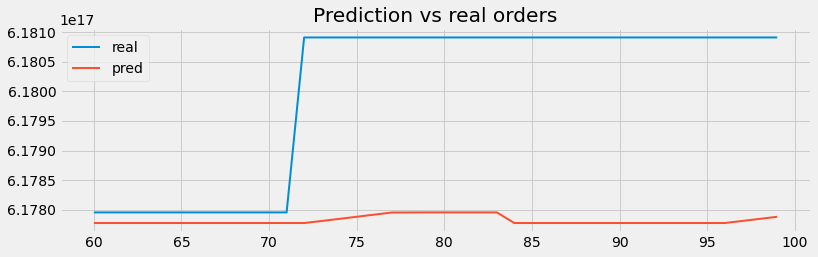

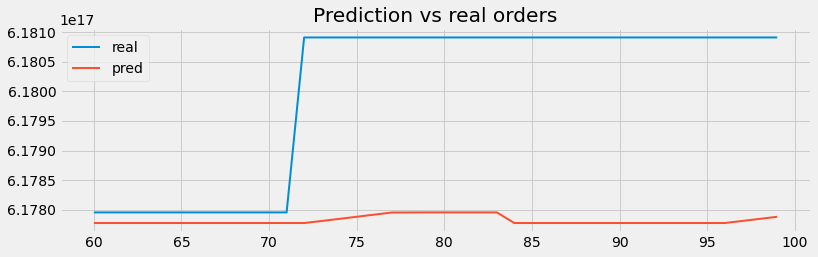

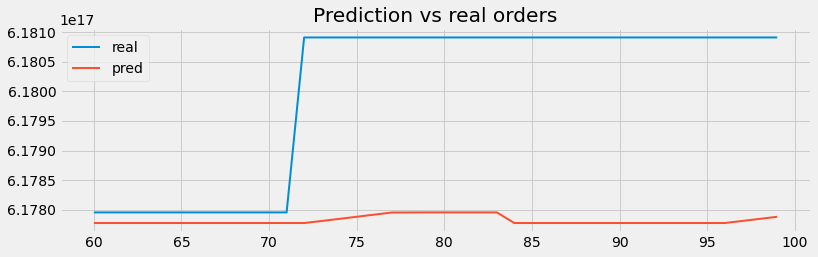

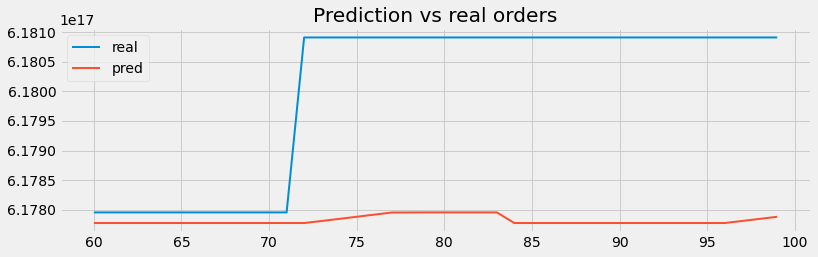

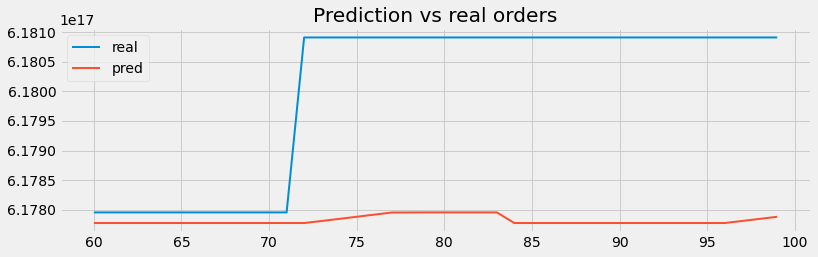

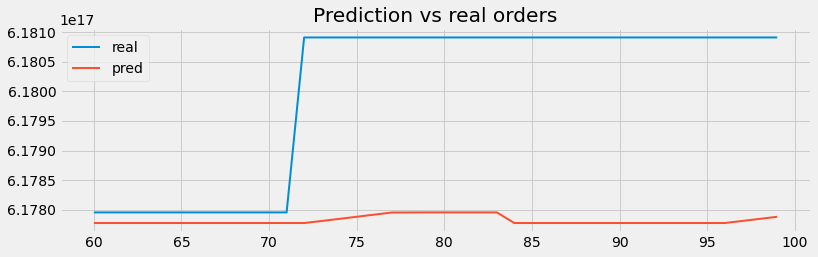

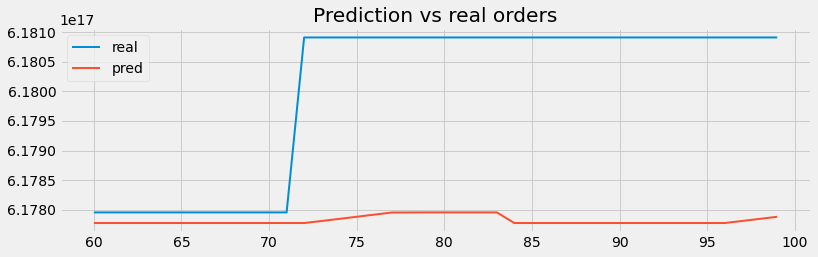

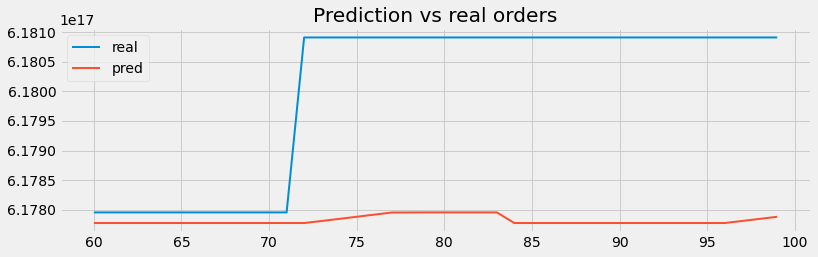

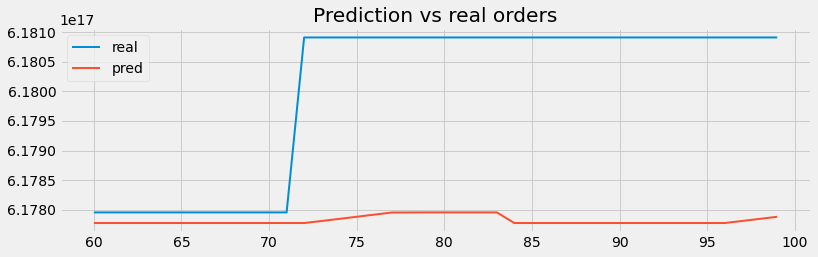

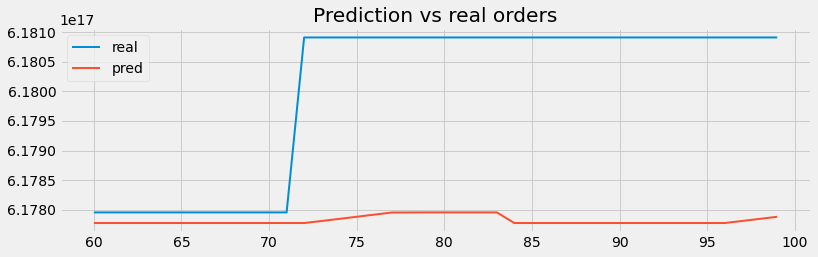

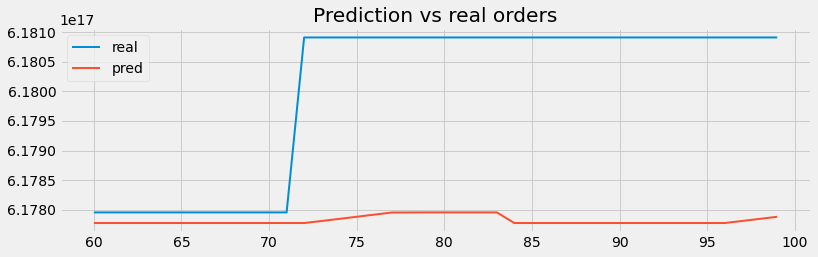

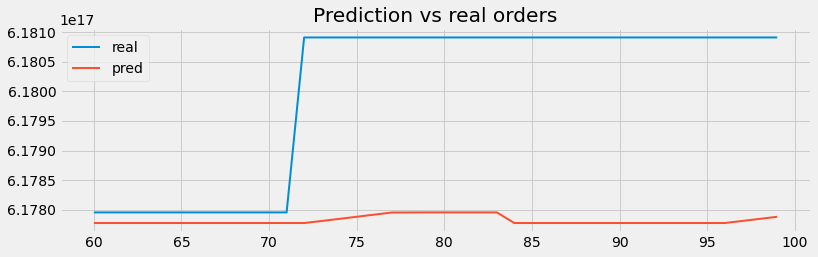

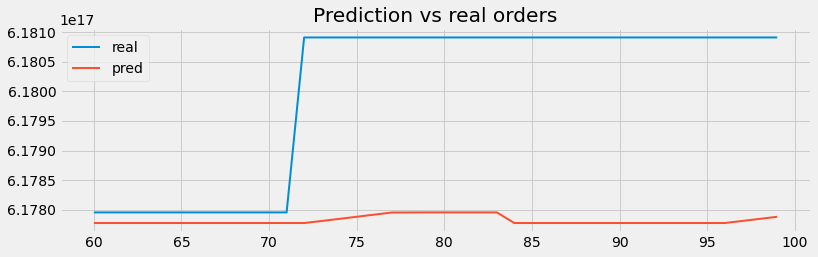

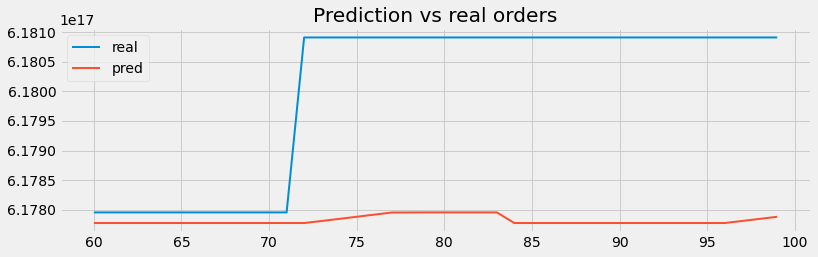

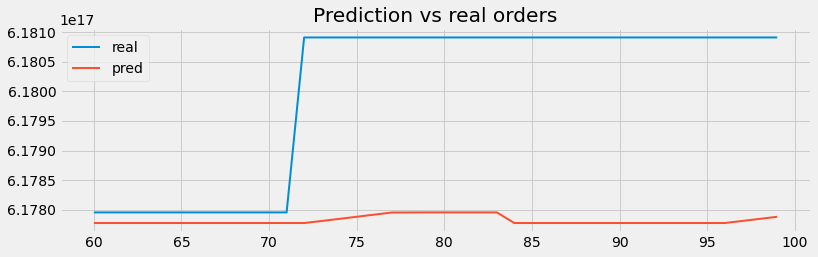

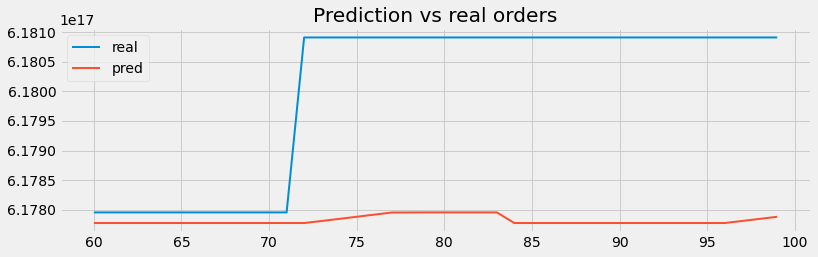

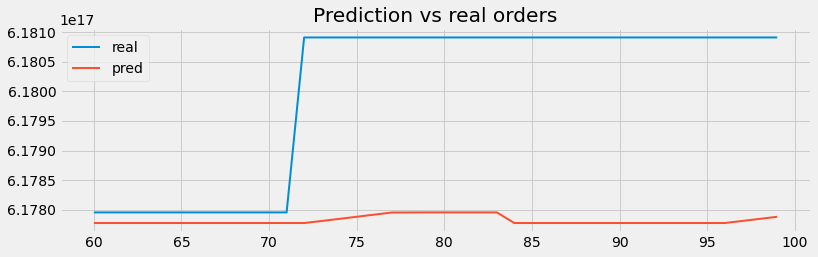

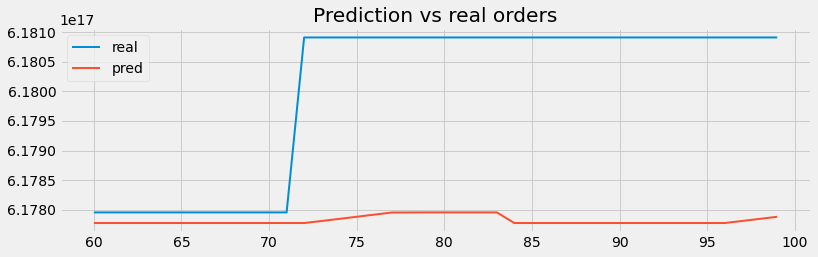

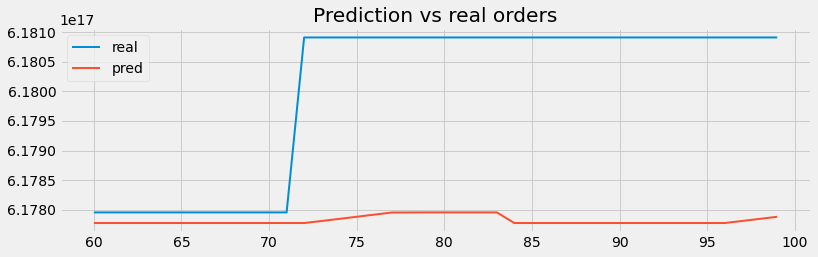

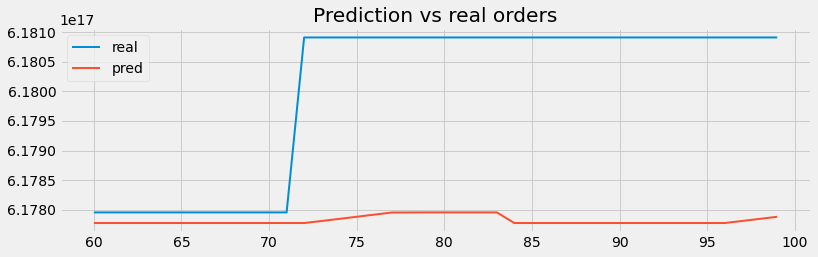

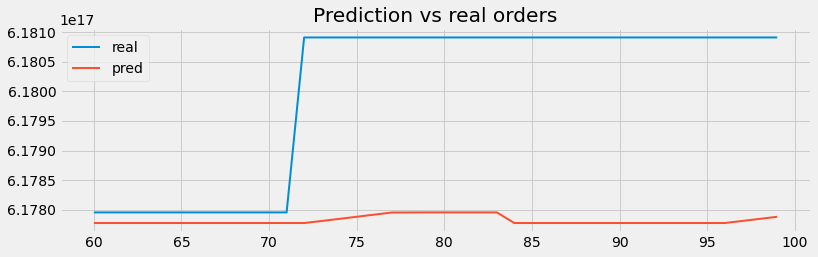

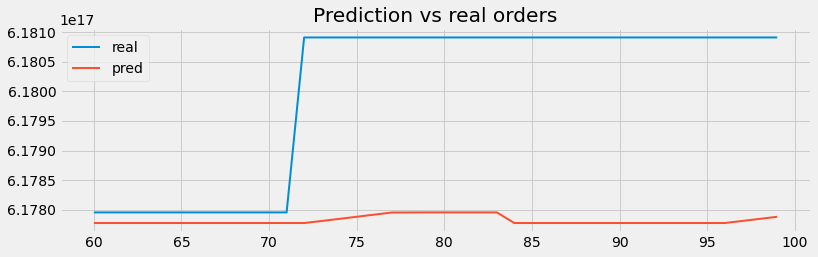

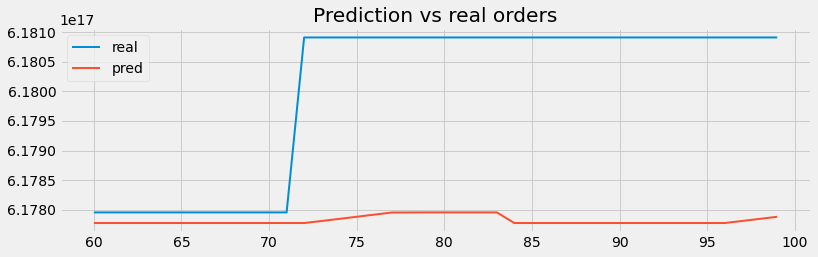

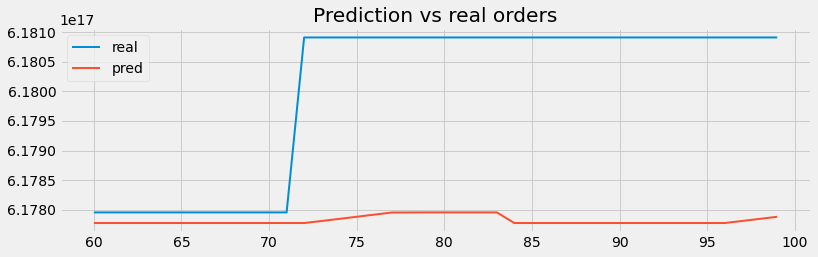

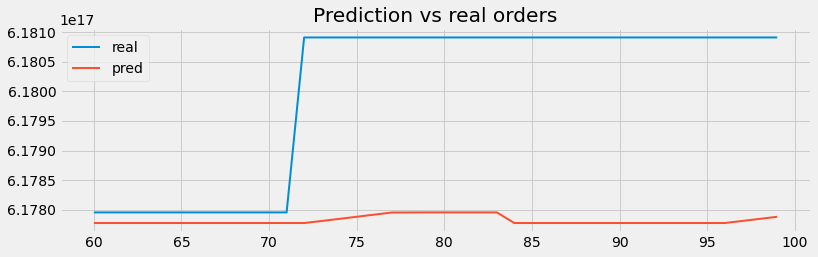

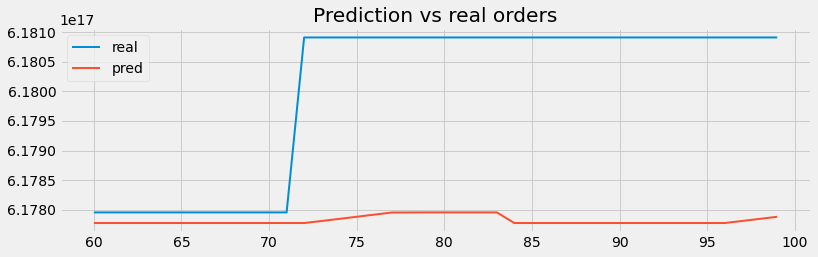

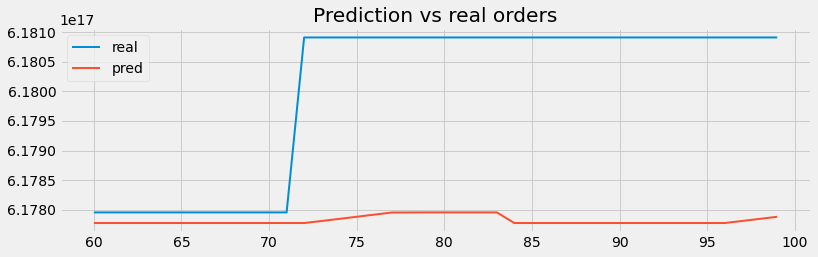

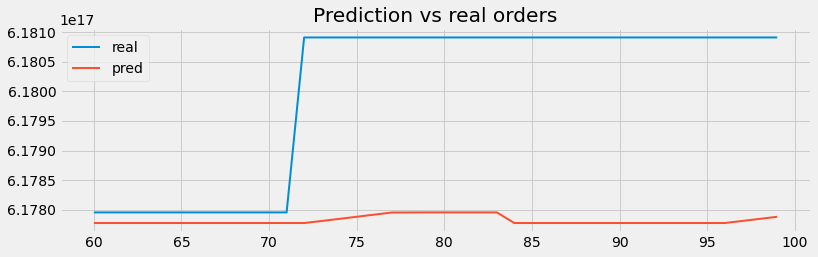

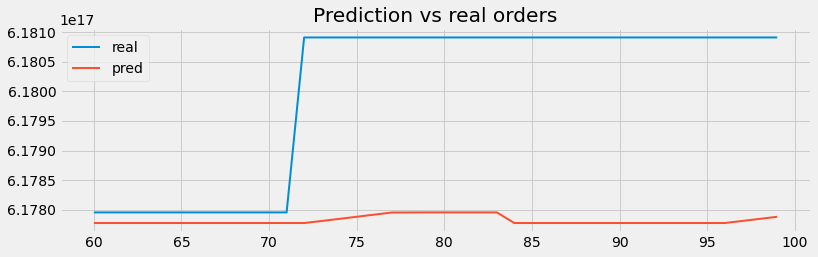

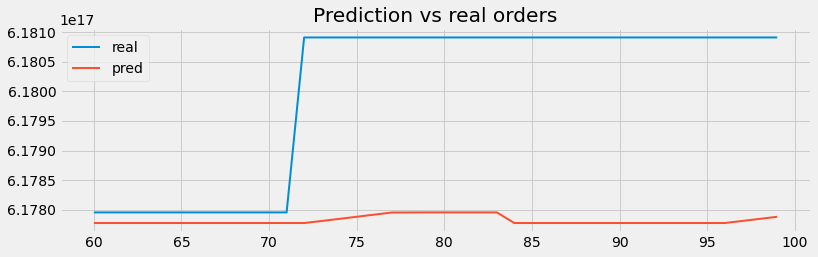

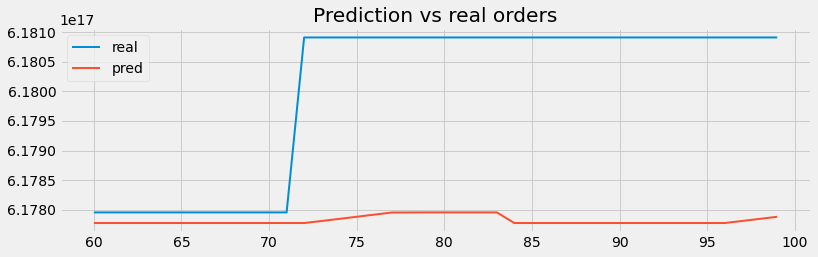

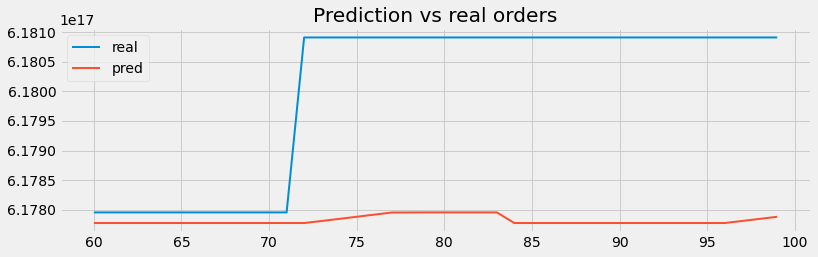

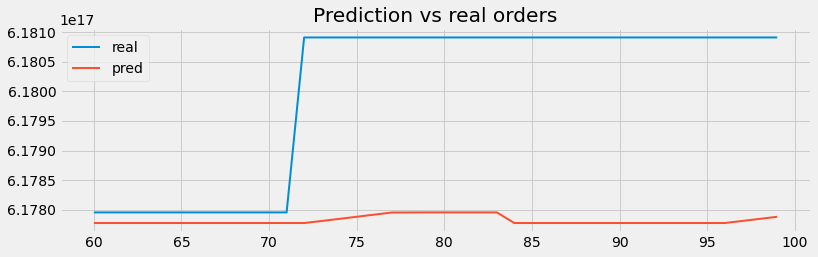

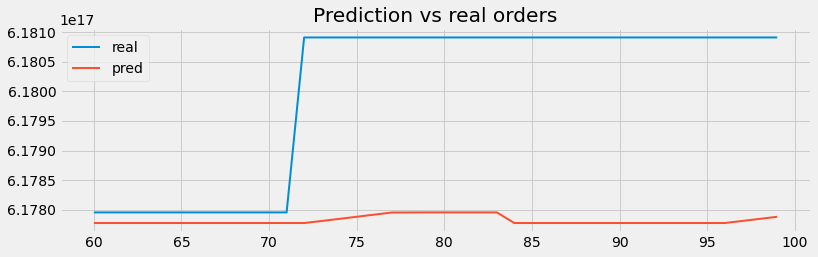

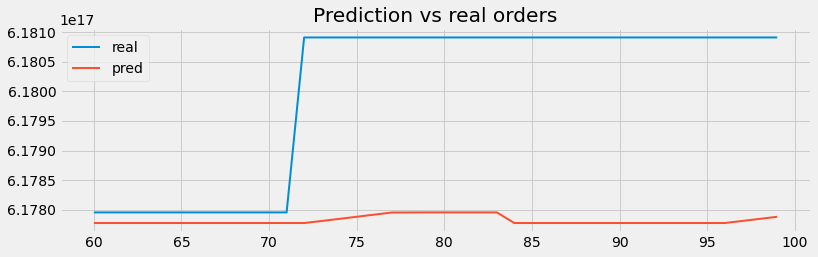

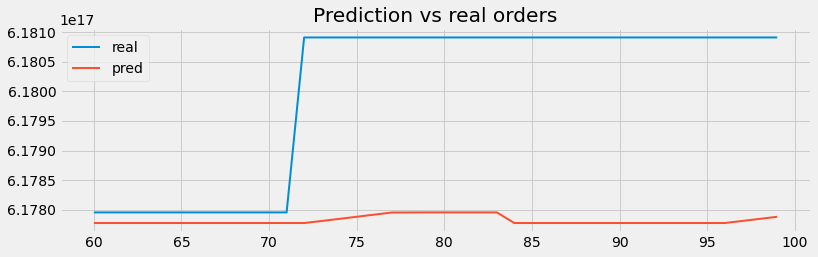

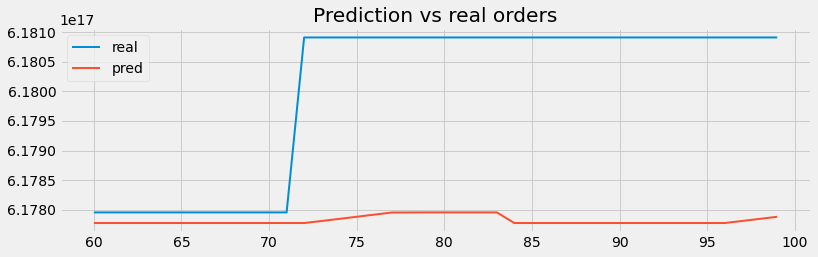

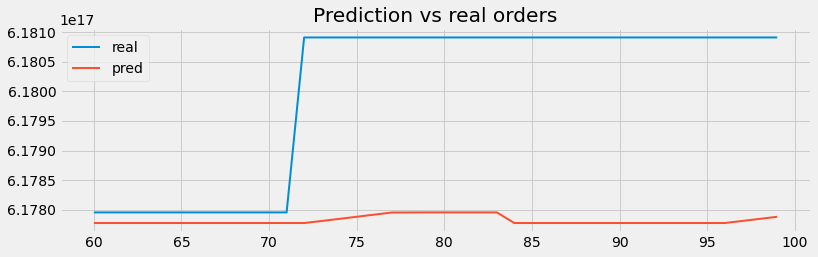

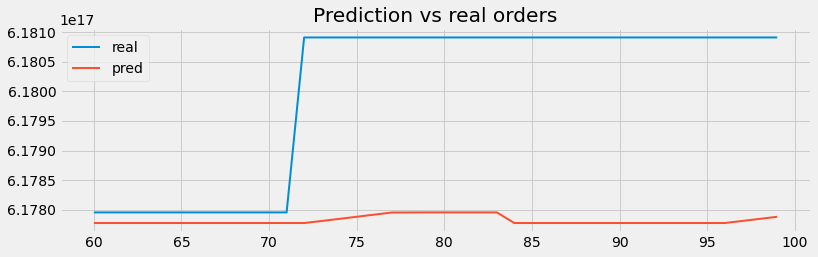

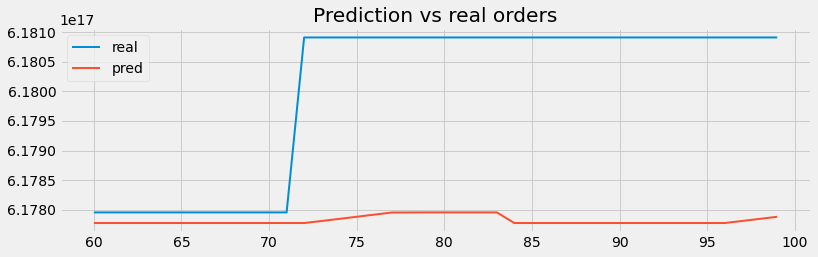

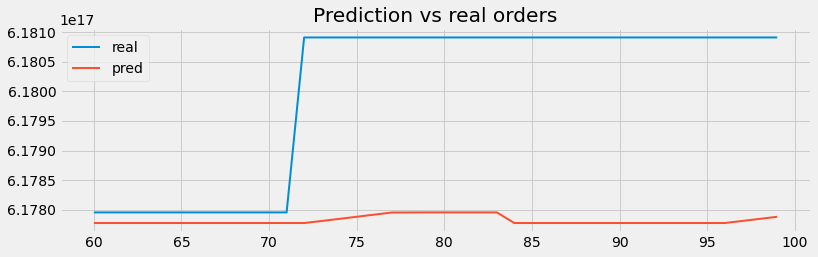

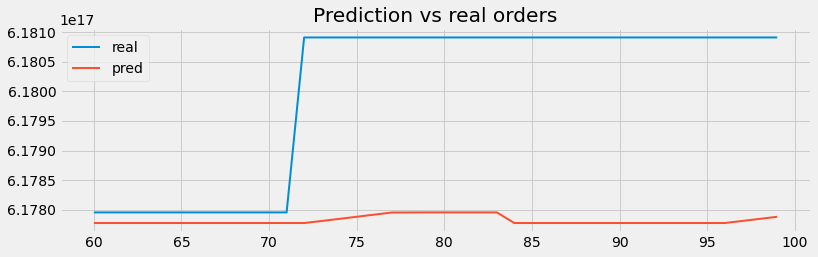

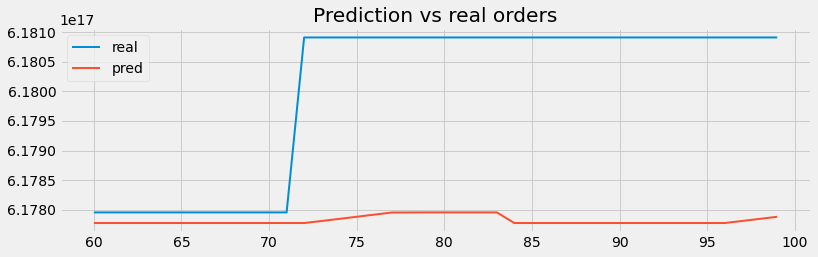

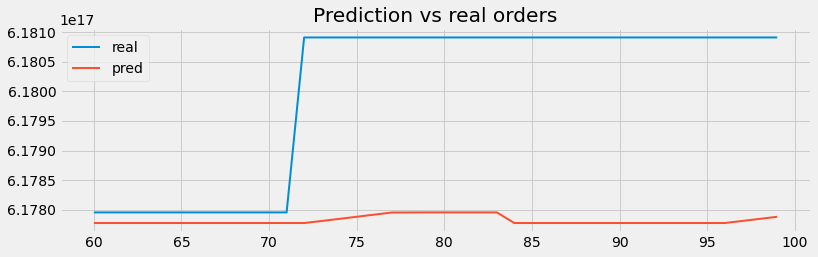

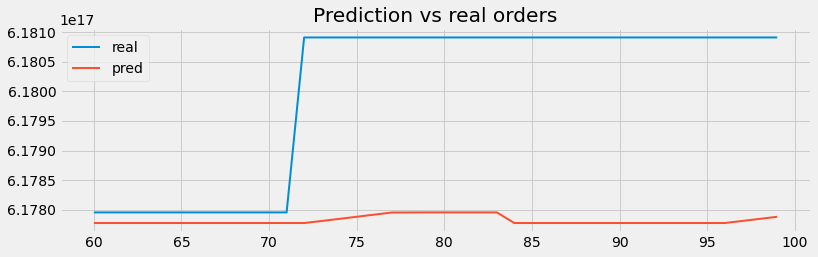

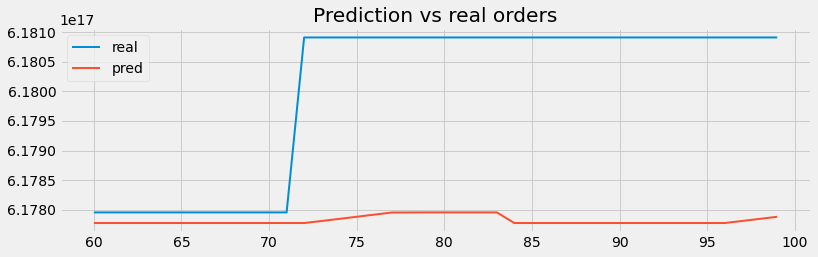

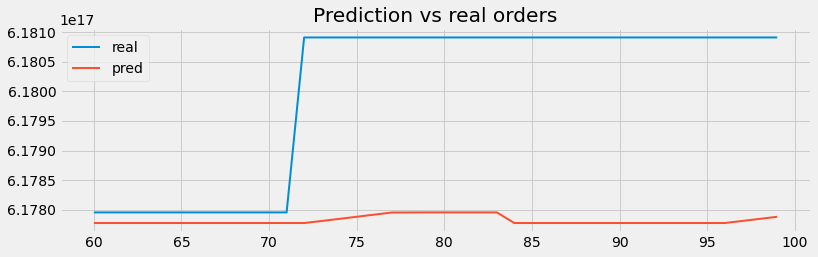

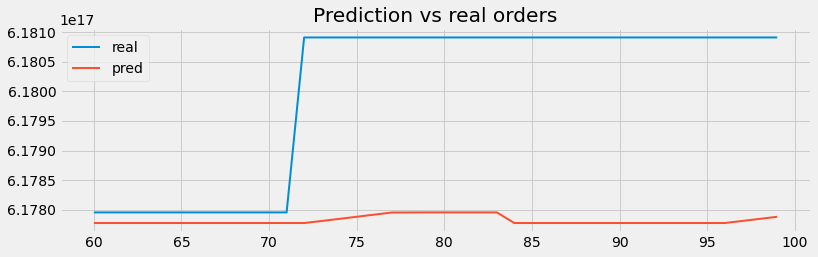

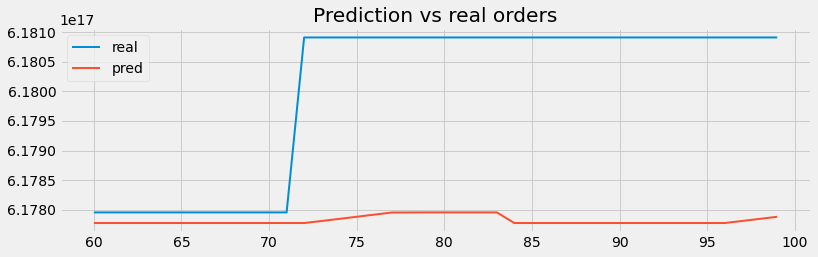

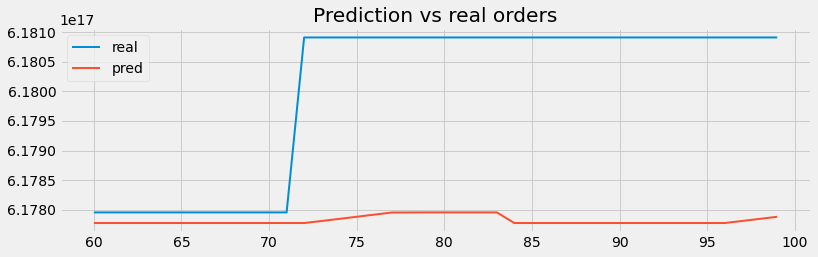

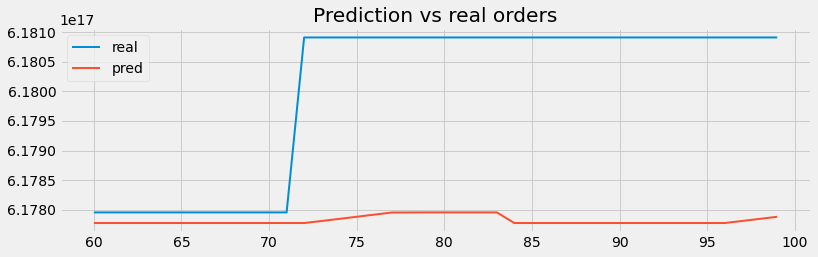

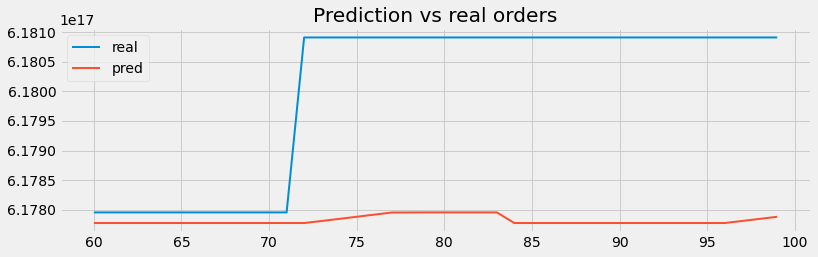

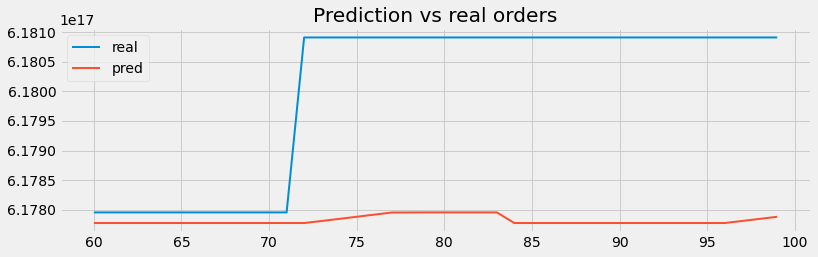

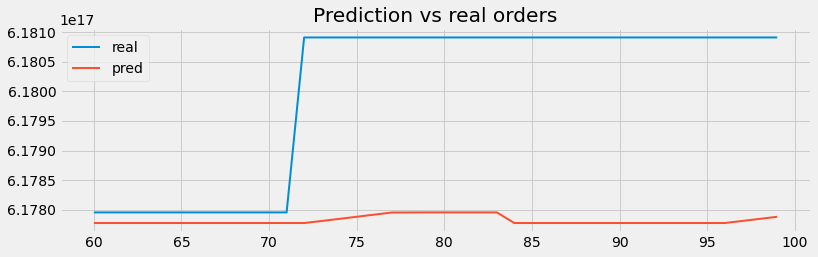

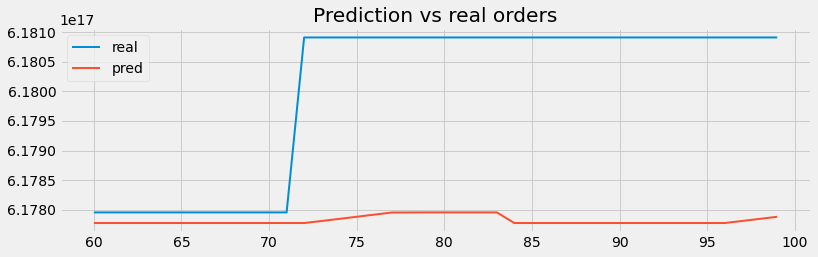

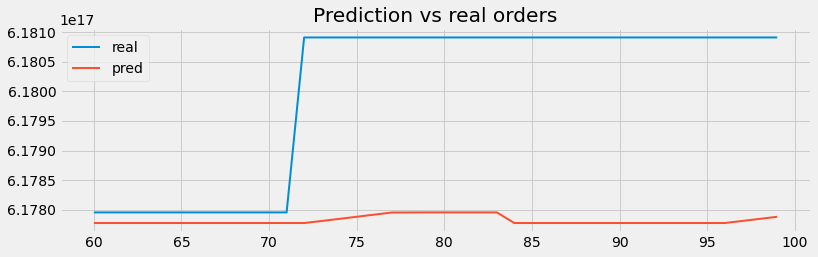

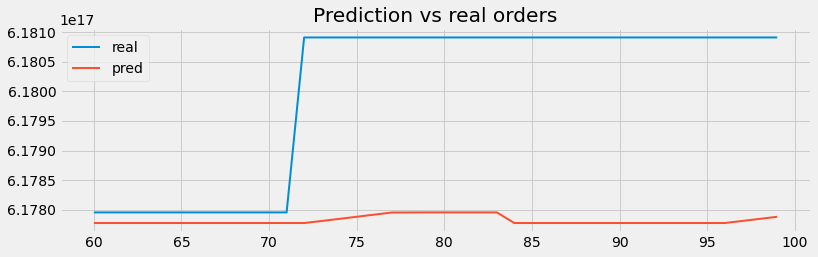

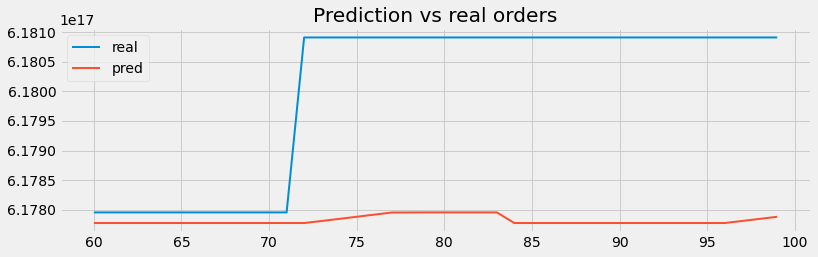

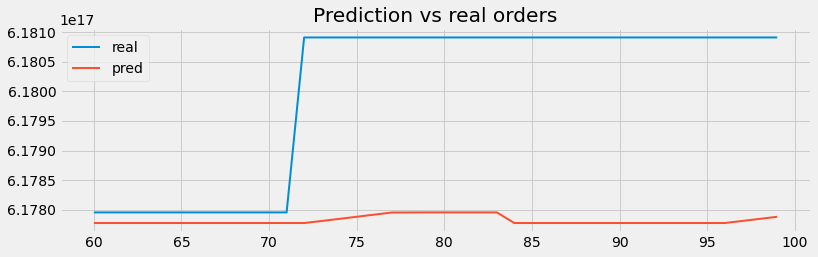

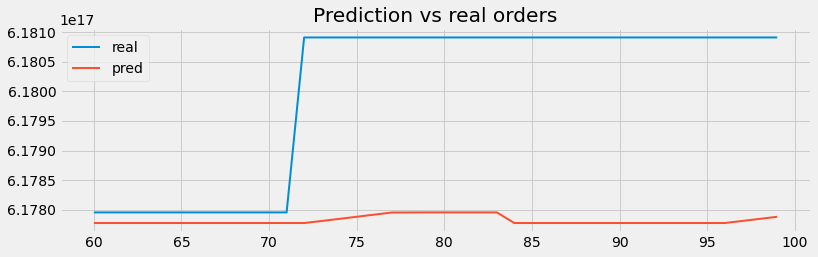

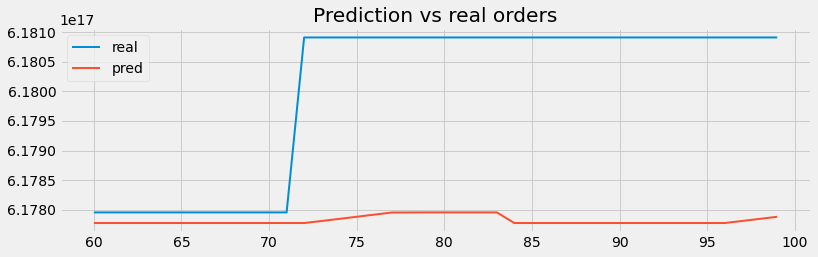

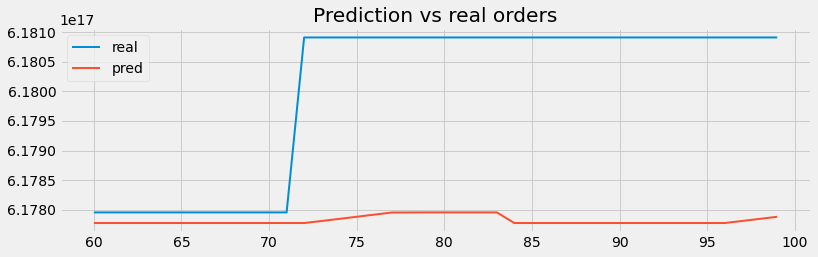

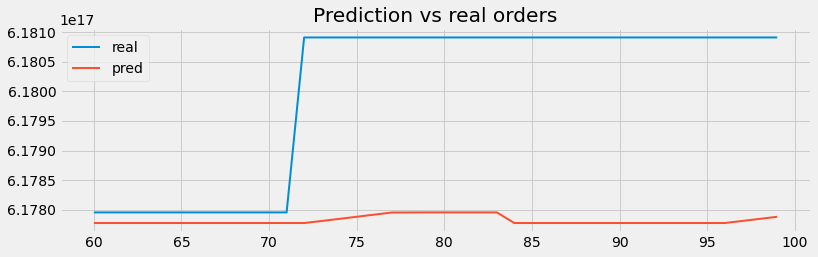

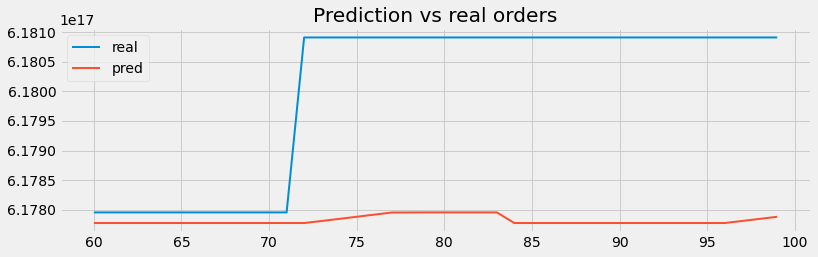

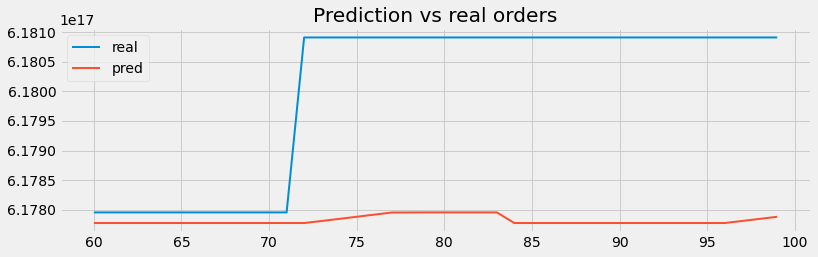

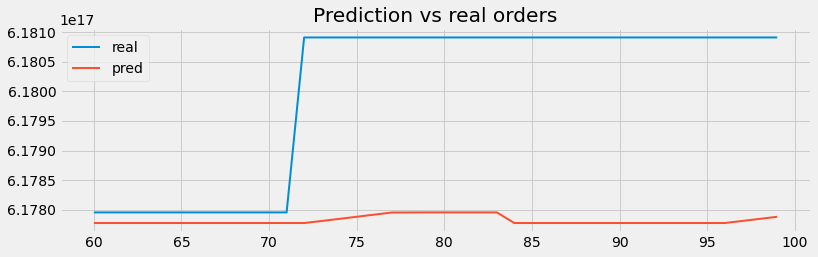

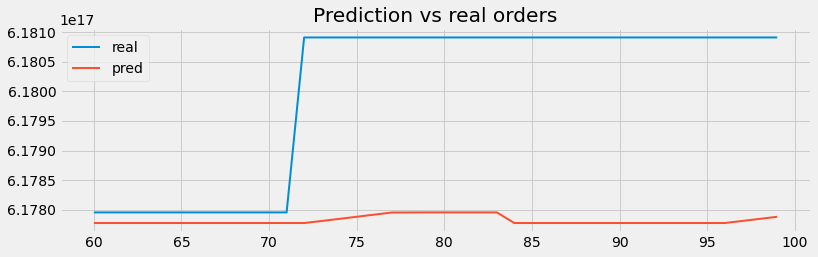

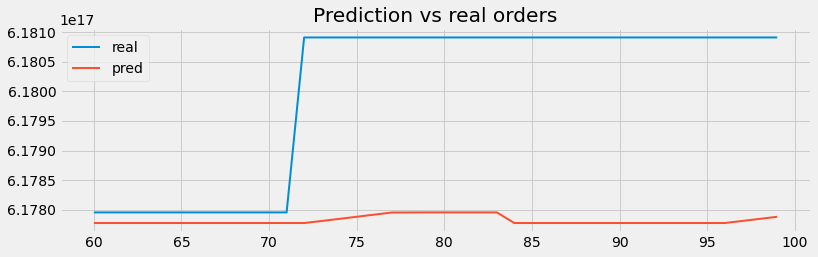

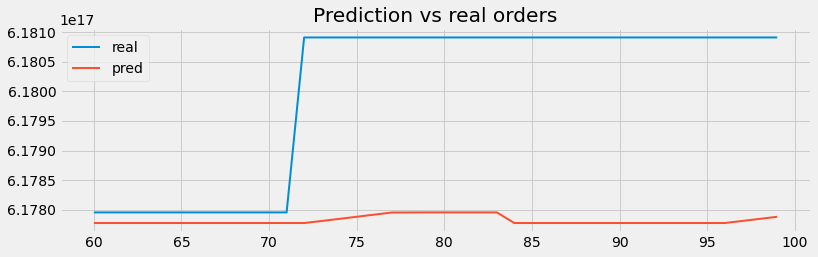

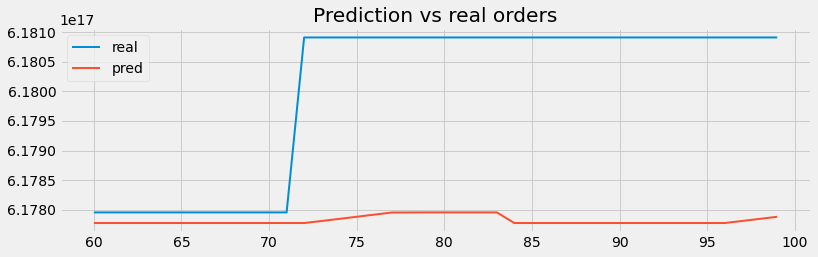

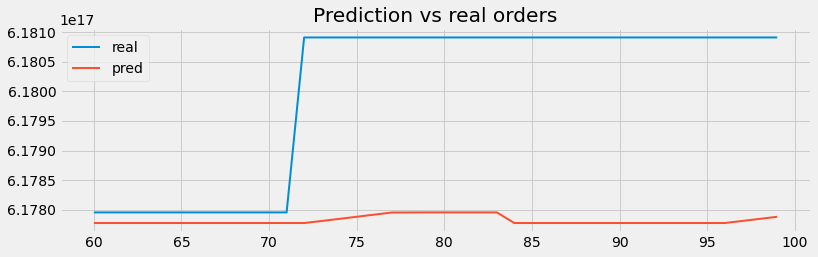

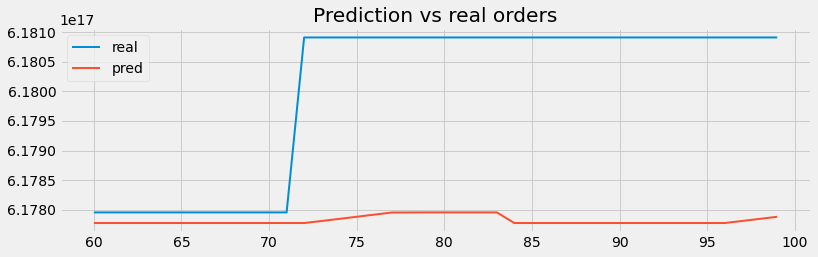

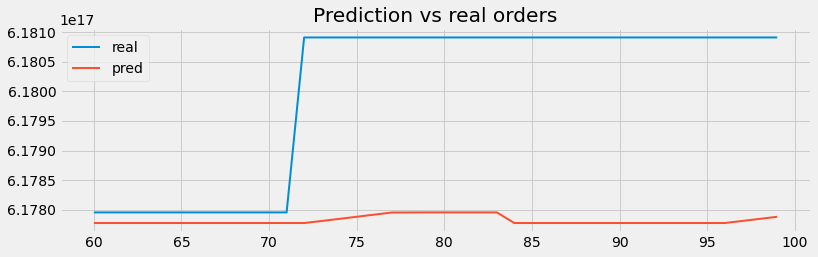

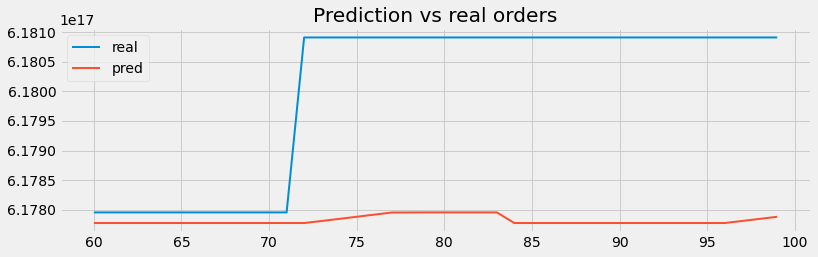

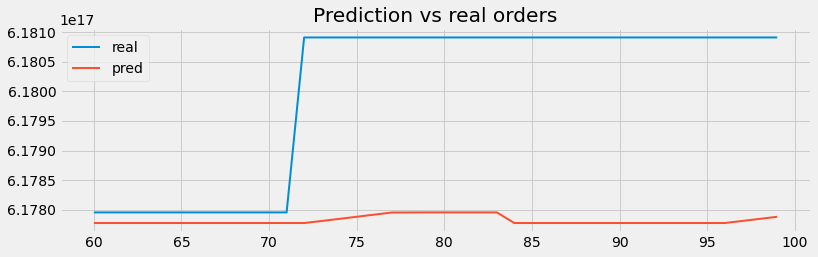

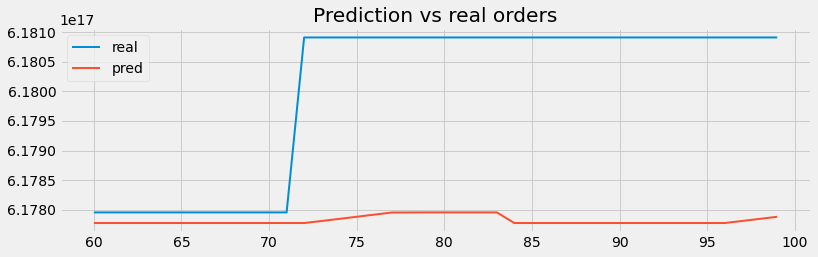

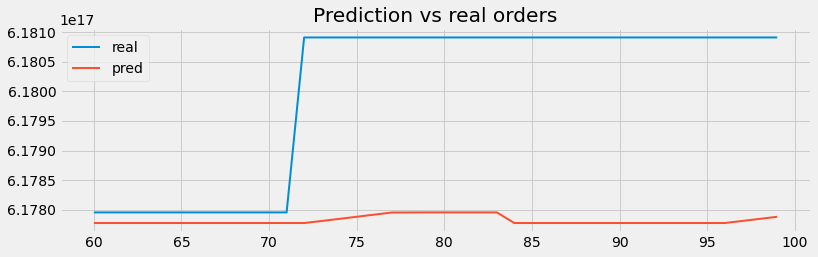

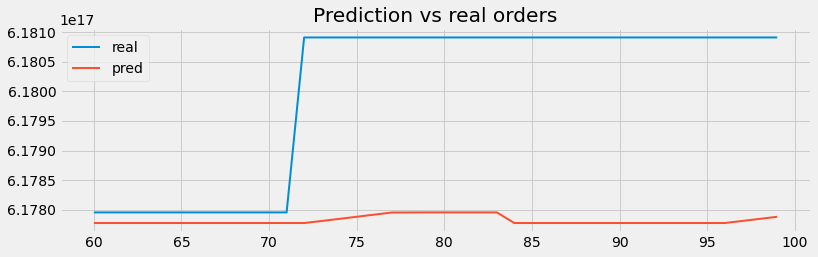

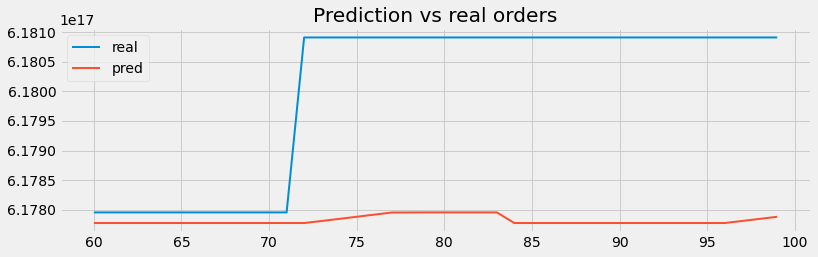

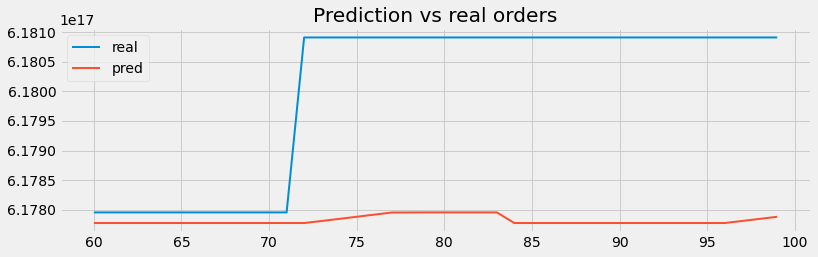

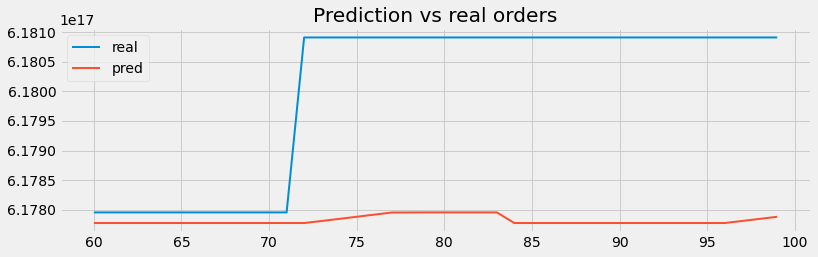

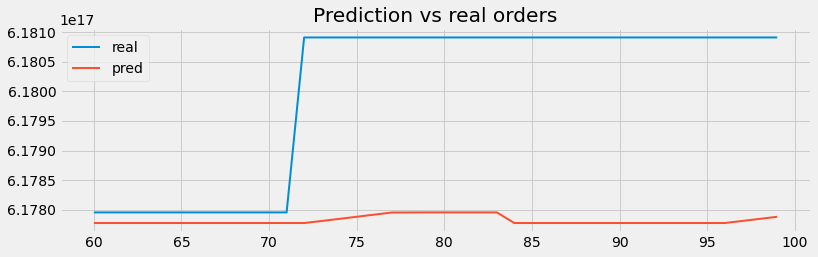

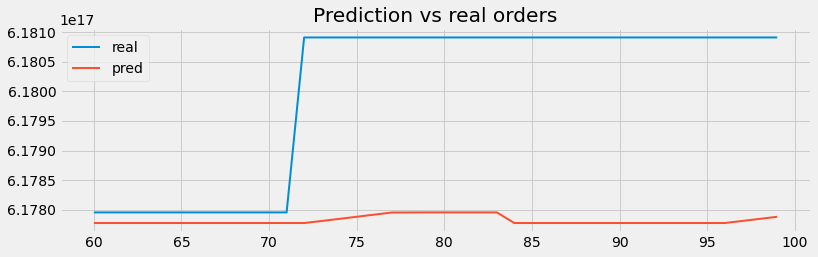

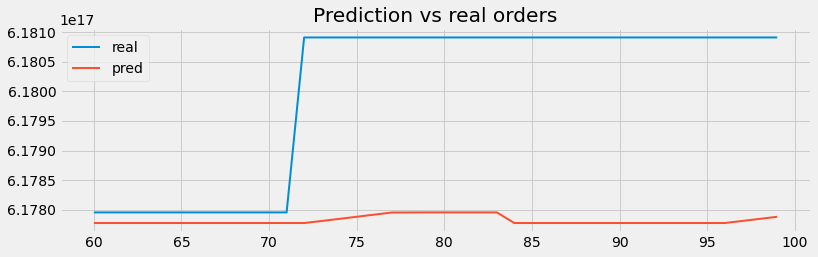

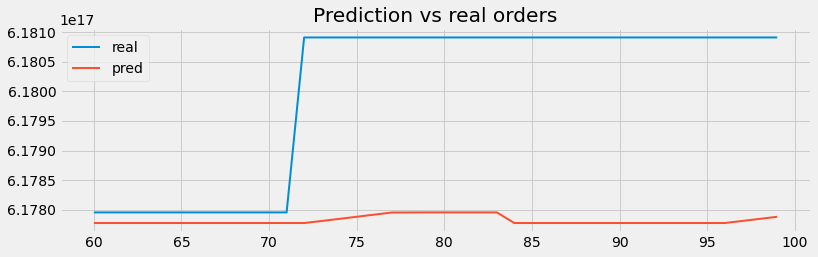

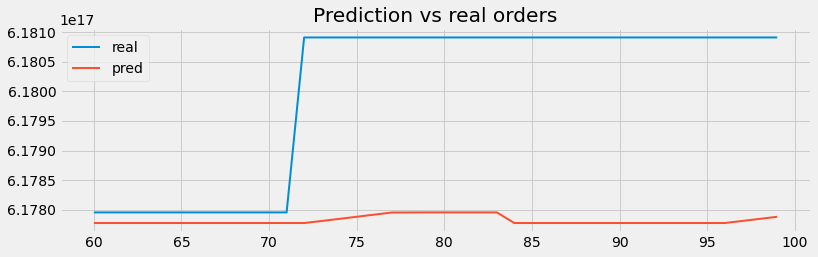

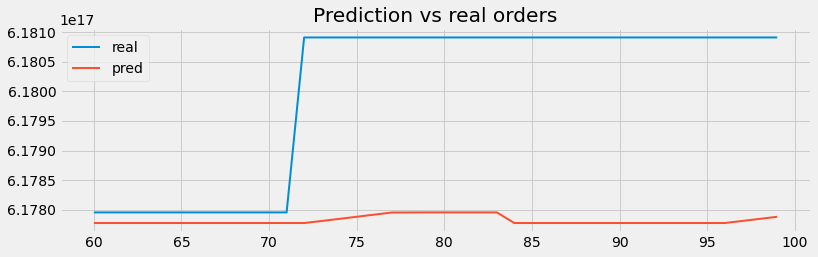

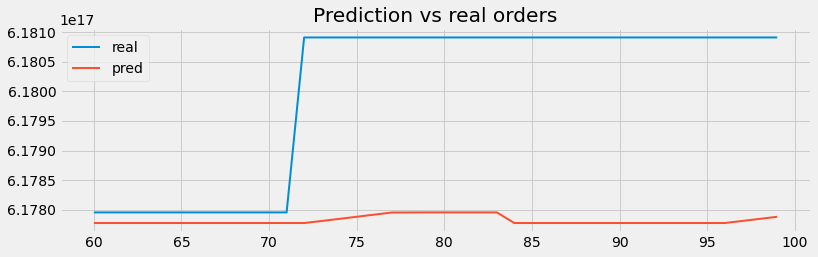

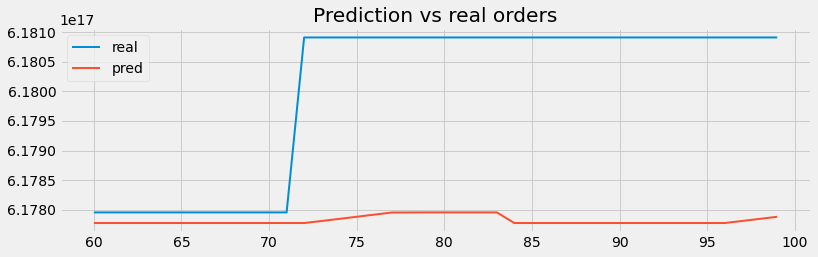

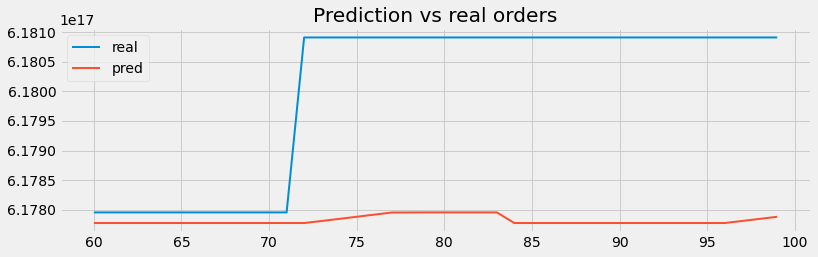

In [413]:
# Backtest final model
# ==============================================================================
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = table11,
                            initial_train_size = len(table11[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

for row in table11:                        
    fig, ax = plt.subplots(figsize=(12, 3.5))
    table11.loc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();

In [414]:
predictions

pred
60  6.177775e+17
61  6.177775e+17
62  6.177775e+17
63  6.177775e+17
64  6.177775e+17
65  6.177775e+17
66  6.177775e+17
67  6.177775e+17
68  6.177775e+17
69  6.177775e+17
70  6.177775e+17
71  6.177775e+17
72  6.177775e+17
73  6.177810e+17
74  6.177845e+17
75  6.177881e+17
76  6.177917e+17
77  6.177953e+17
78  6.177954e+17
79  6.177954e+17
80  6.177954e+17
81  6.177954e+17
82  6.177954e+17
83  6.177954e+17
84  6.177775e+17
85  6.177775e+17
86  6.177775e+17
87  6.177775e+17
88  6.177775e+17
89  6.177775e+17
90  6.177775e+17
91  6.177775e+17
92  6.177775e+17
93  6.177775e+17
94  6.177775e+17
95  6.177775e+17
96  6.177775e+17
97  6.177810e+17
98  6.177845e+17
99  6.177881e+17

In [415]:
forecaster = ForecasterAutoregMultiOutput(
                regressor = RandomForestRegressor(max_depth=4),
                steps     = 36,
                lags      = 20 # This value will be replaced in the grid search
             )

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [4, 6]}

# Lags used as predictors
lags_grid = [[1, 2, 3, 4, 20], [1, 2, 3, 10, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = table11,
                        exog        = dataxx1,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 20,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 56,
                        return_best = True,
                        verbose     = False
                  )

Number of models compared: 8


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:15<00:00, 37.62s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4 20] 
  Parameters: {'max_depth': 4, 'n_estimators': 100}
  Backtesting metric: 203673912457774.53



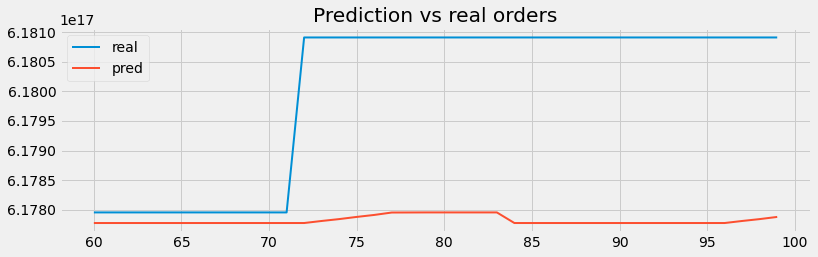

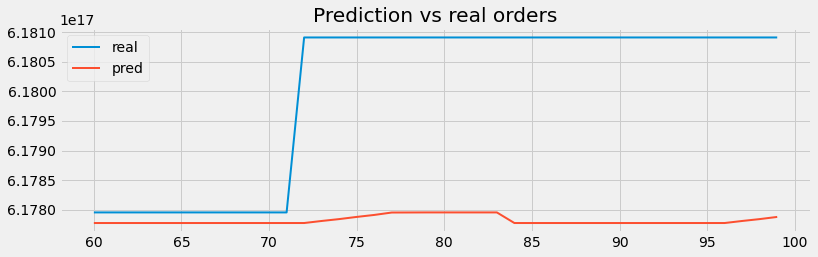

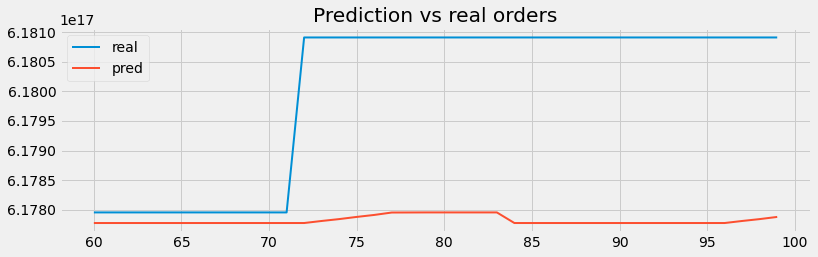

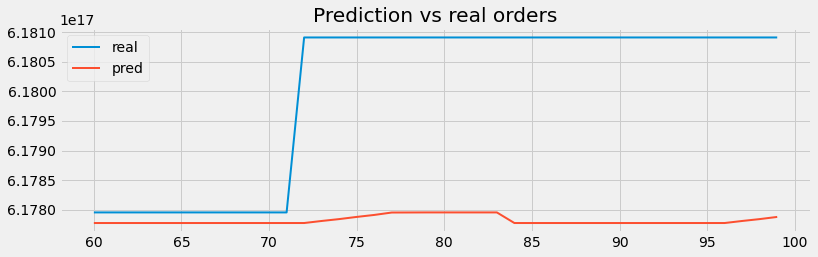

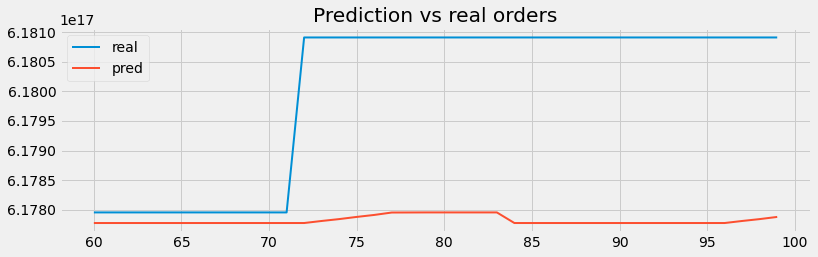

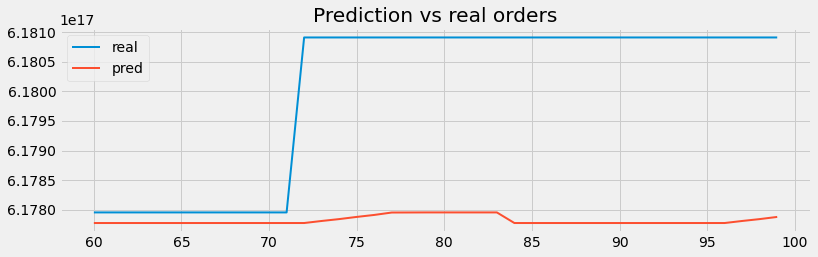

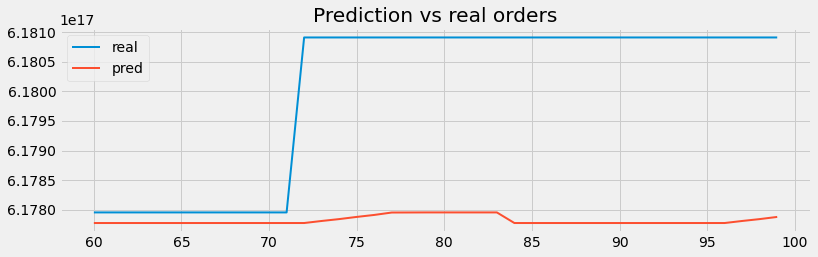

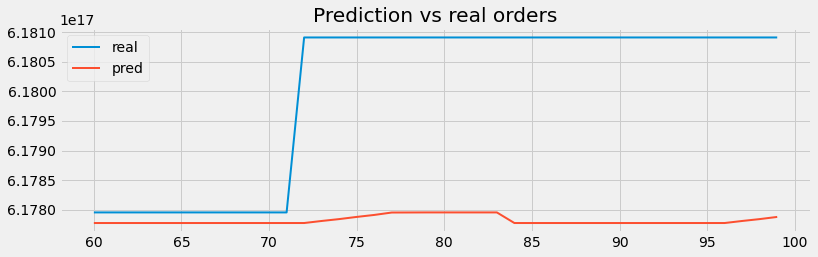

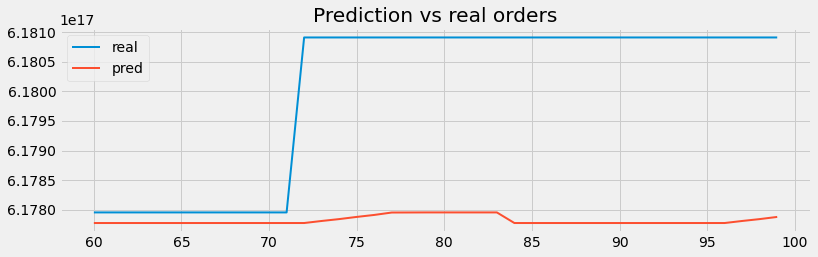

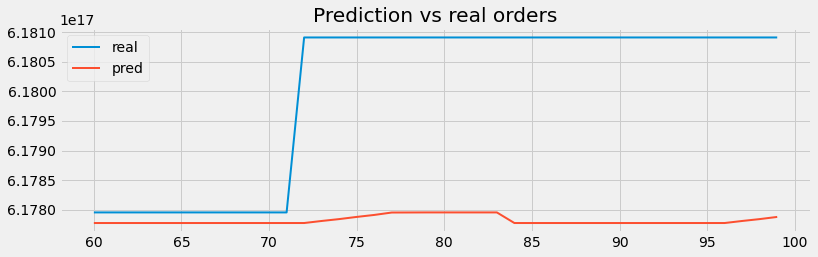

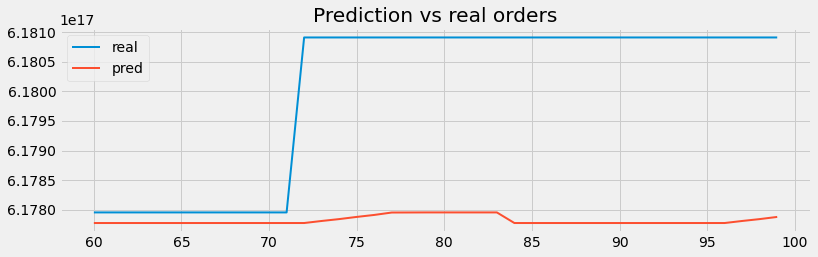

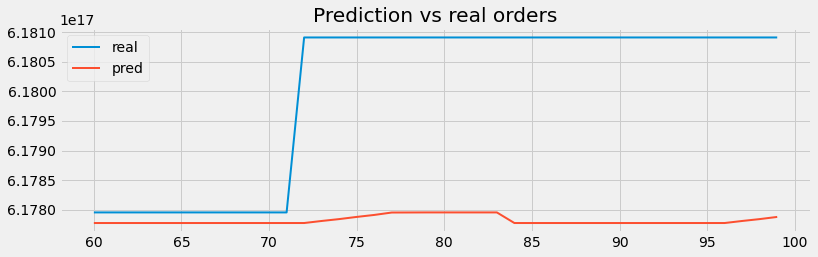

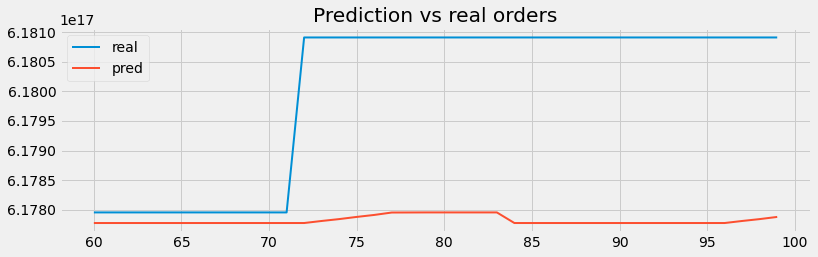

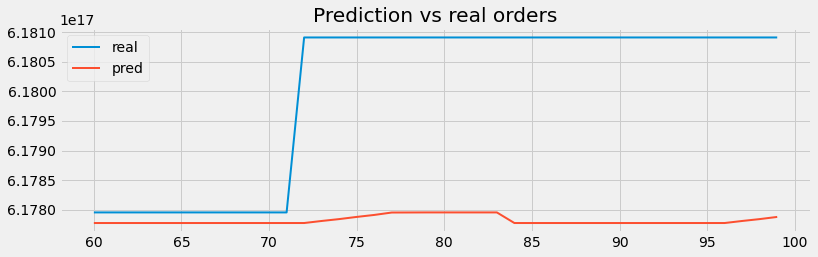

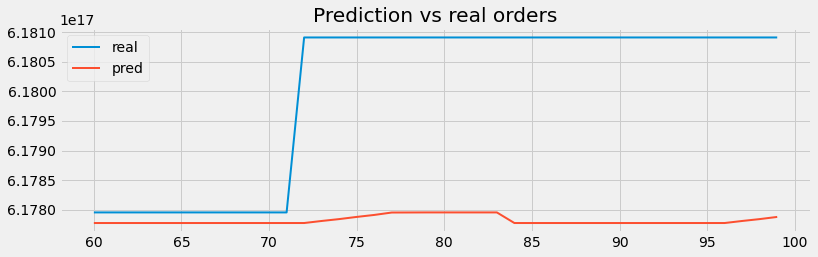

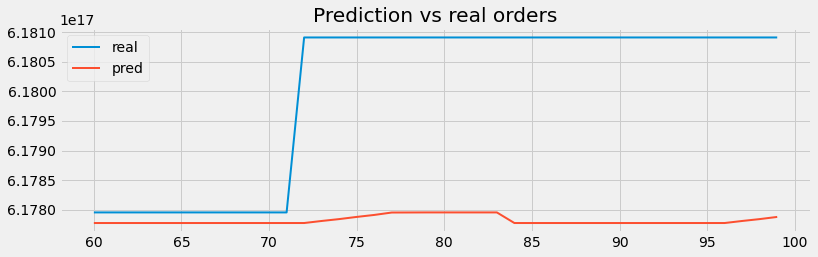

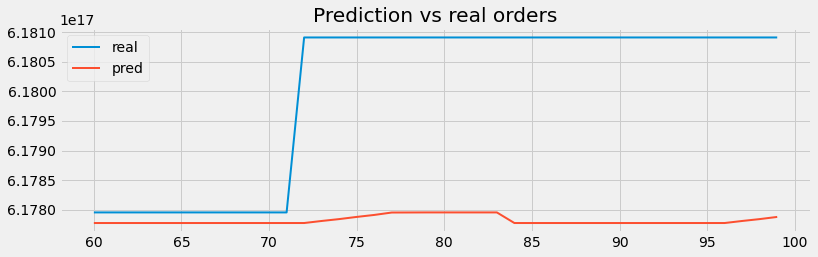

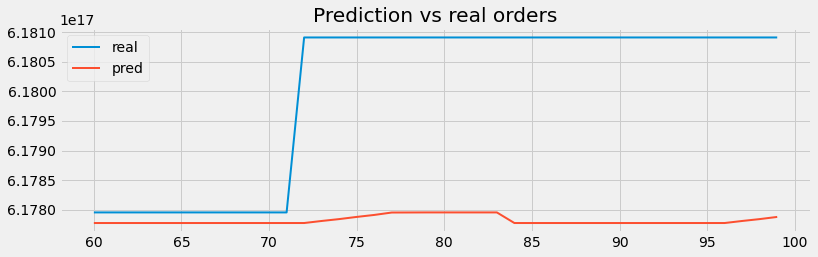

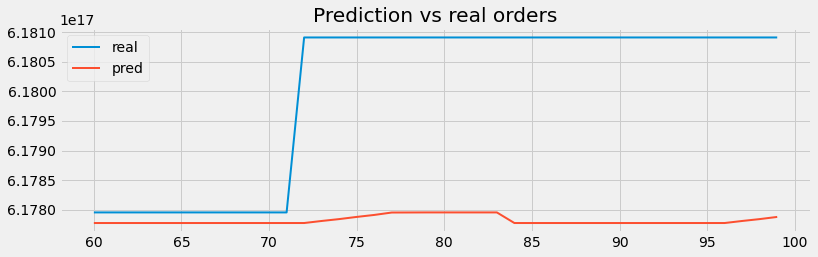

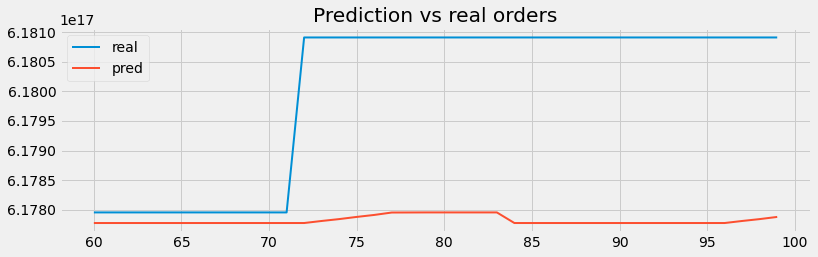

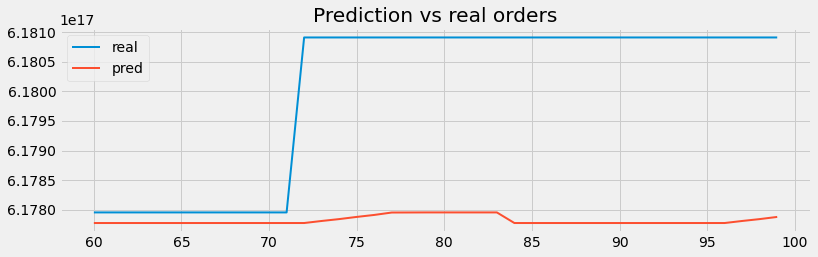

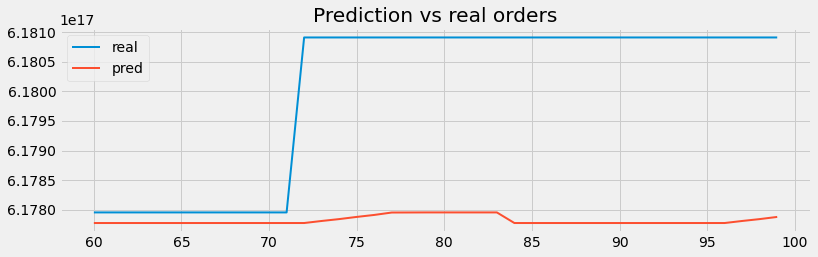

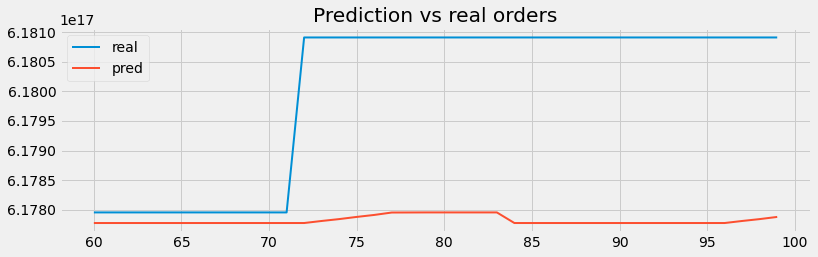

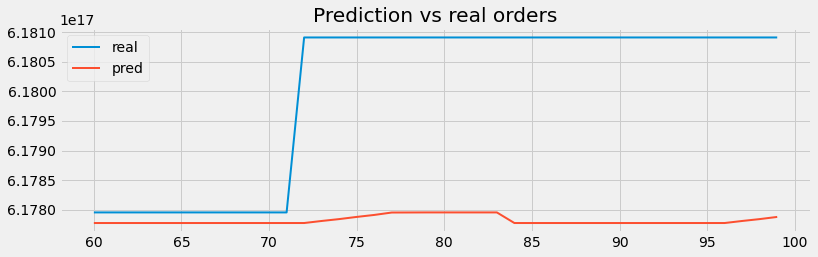

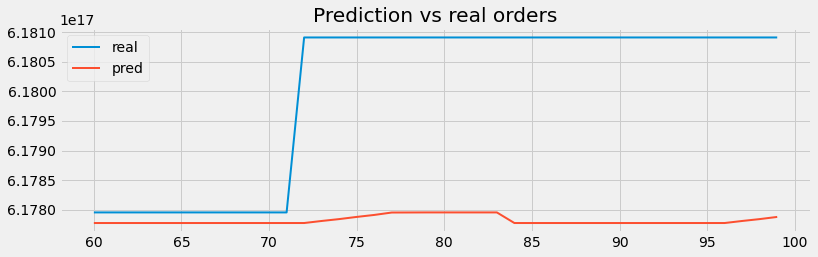

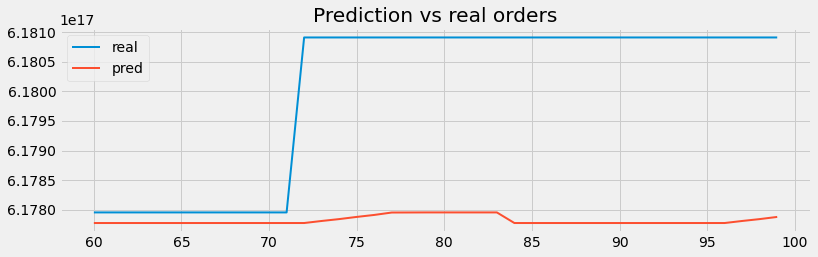

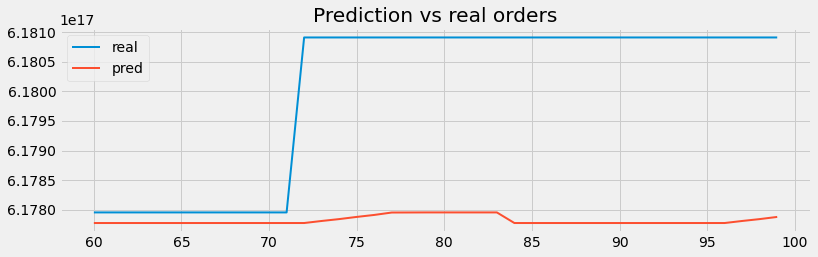

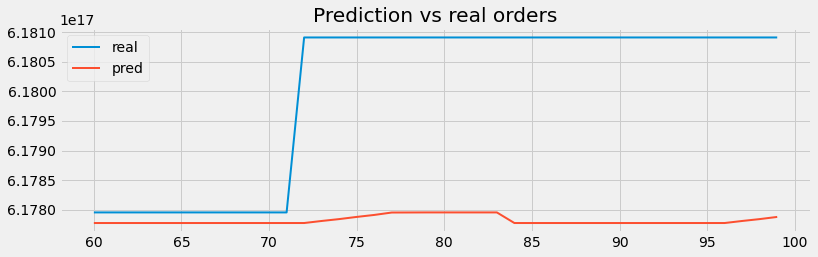

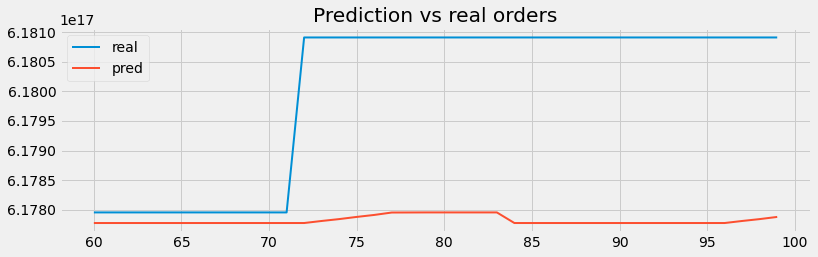

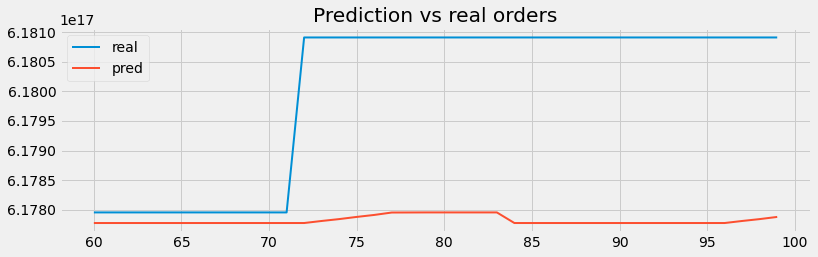

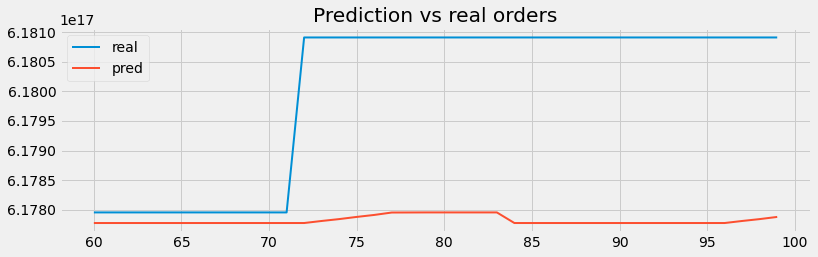

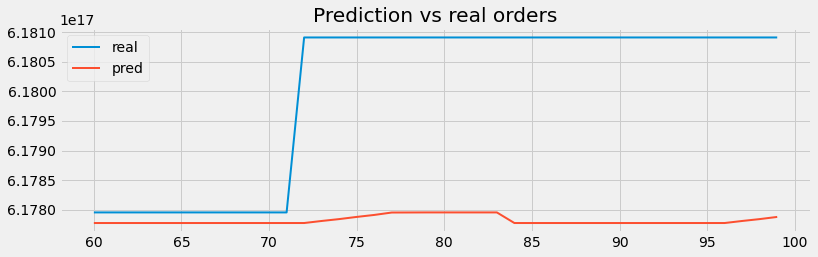

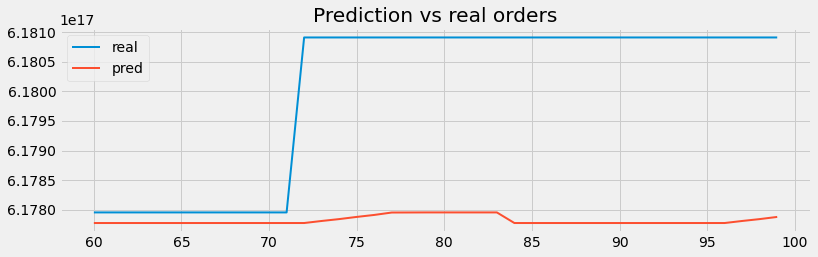

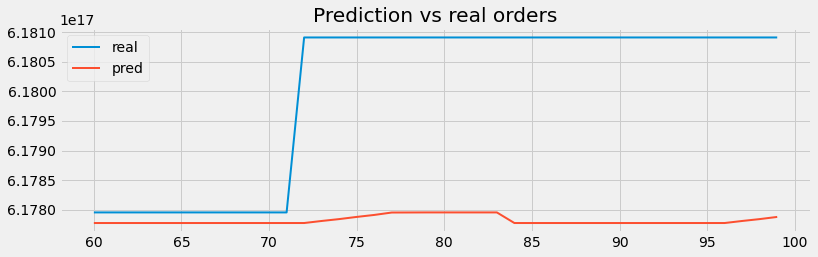

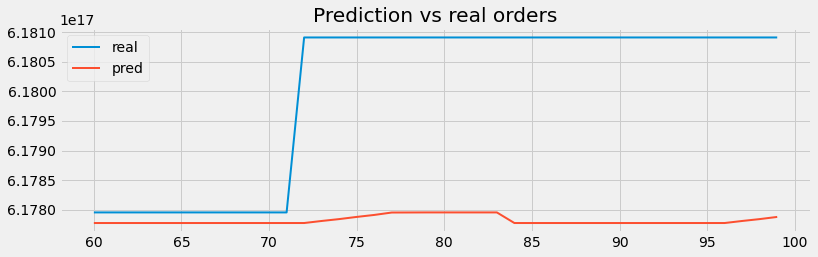

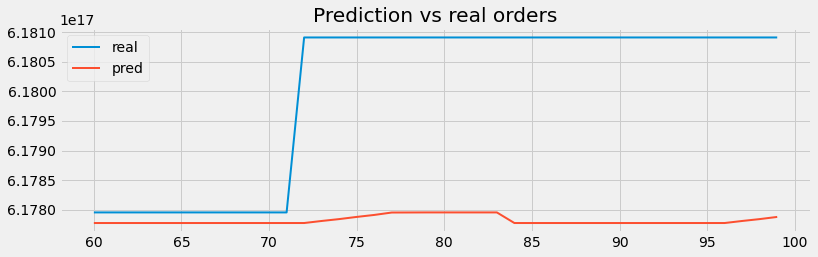

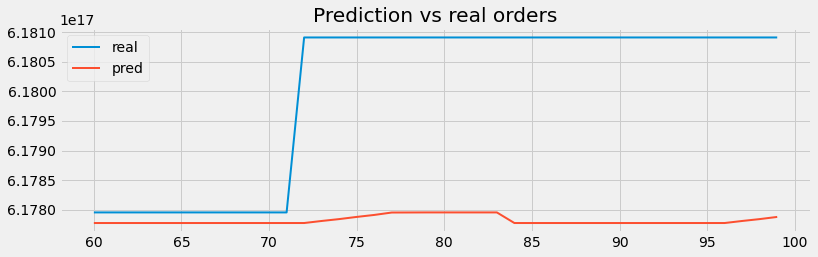

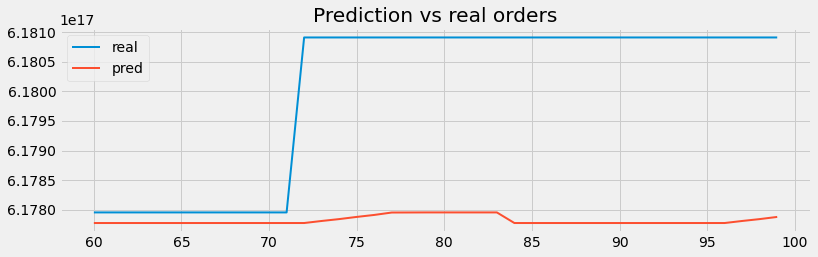

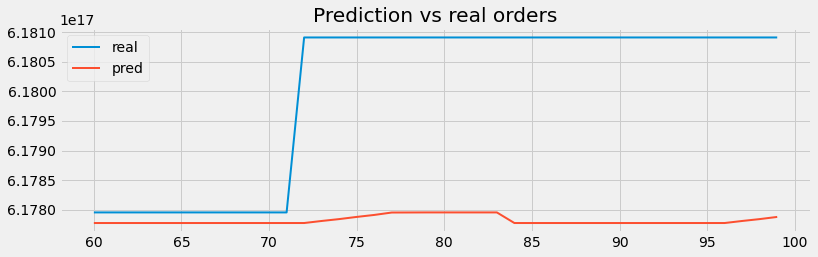

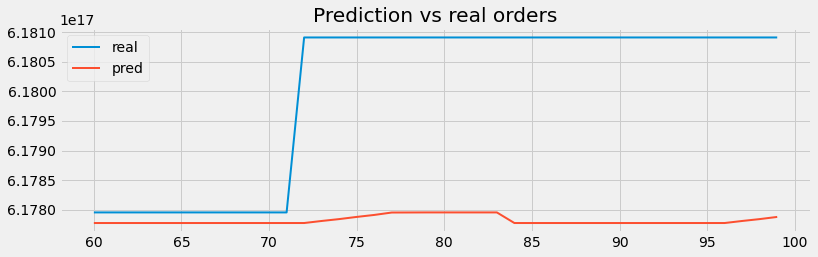

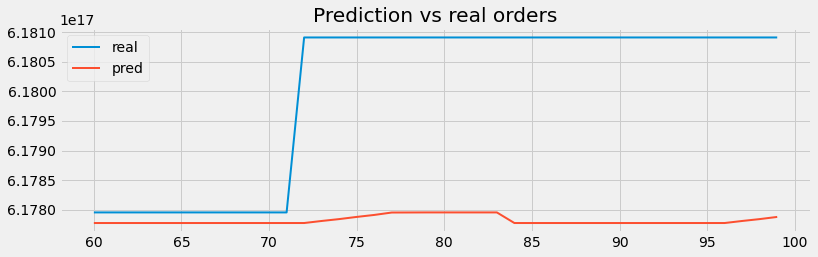

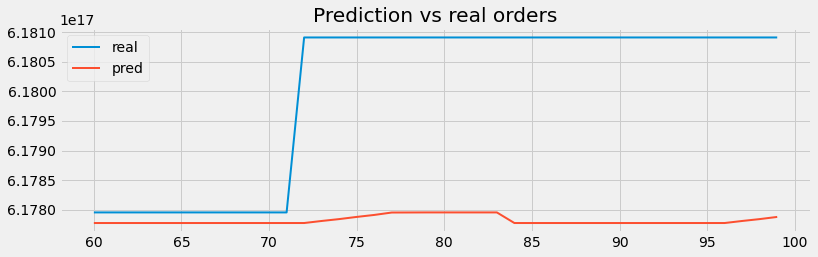

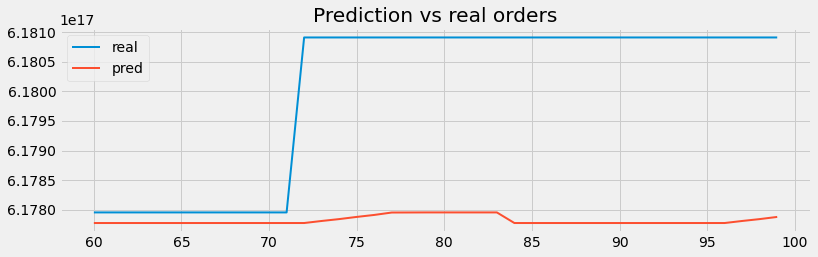

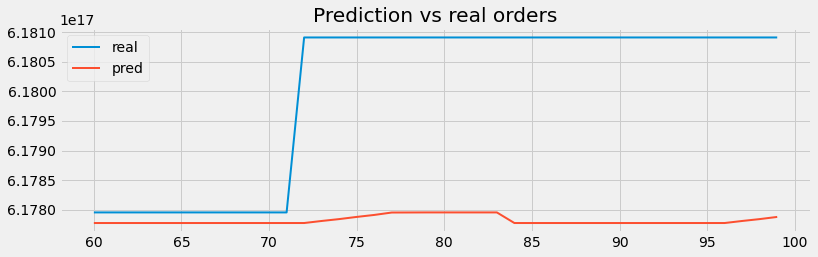

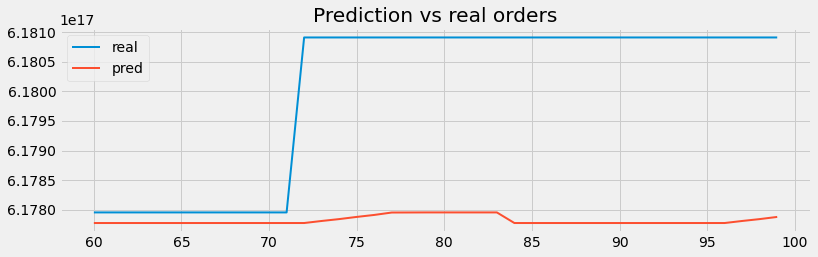

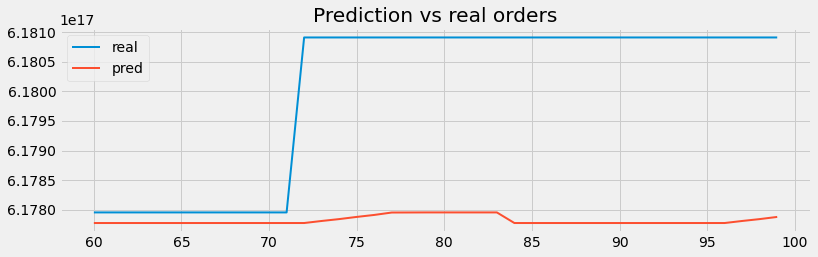

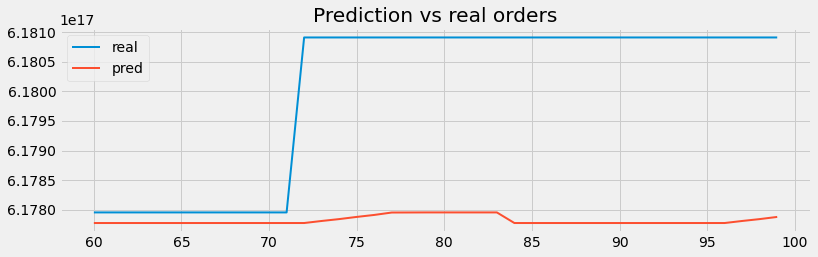

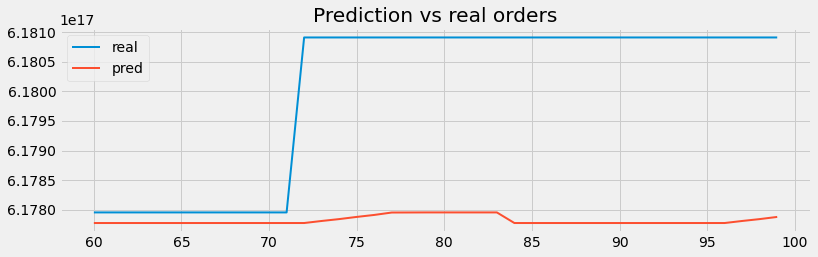

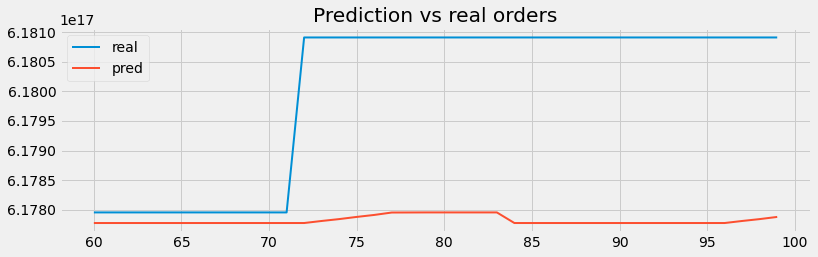

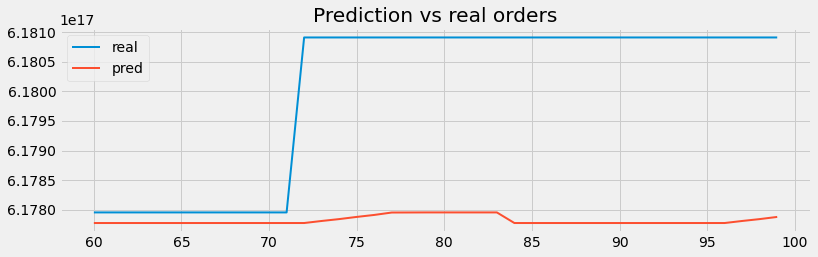

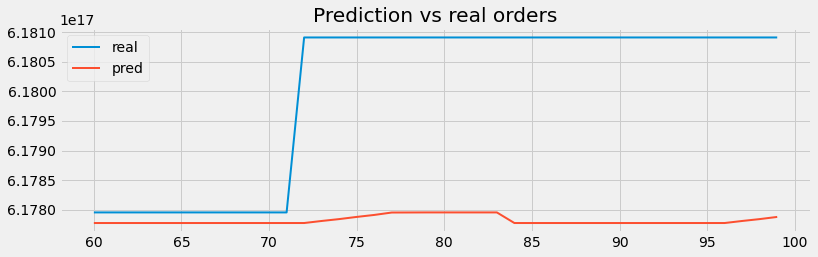

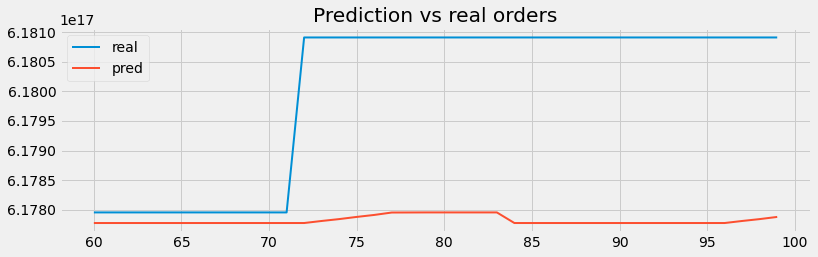

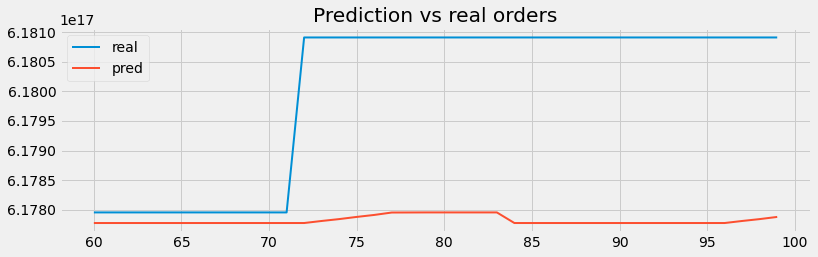

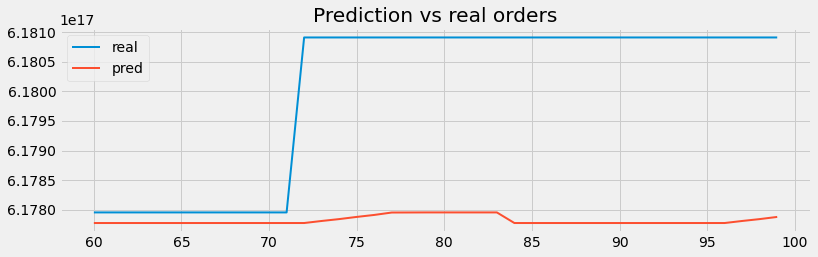

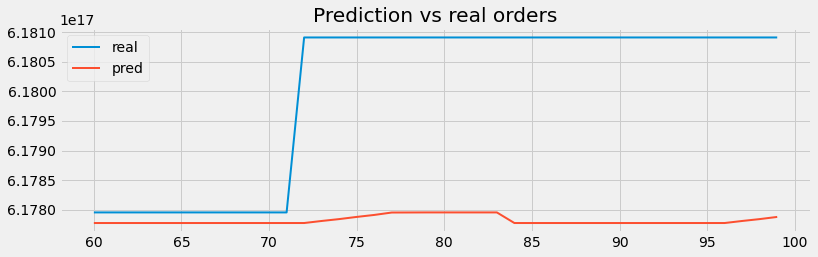

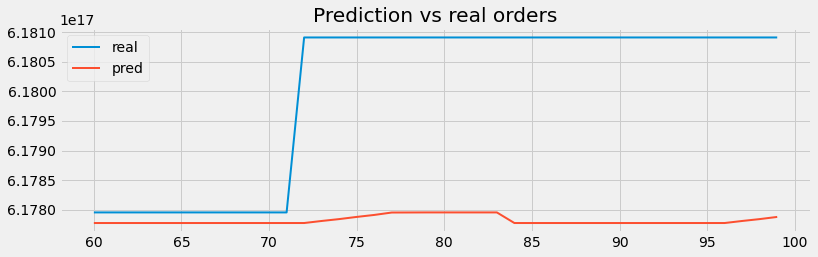

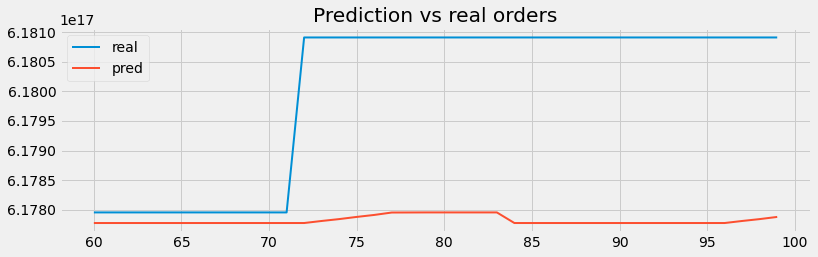

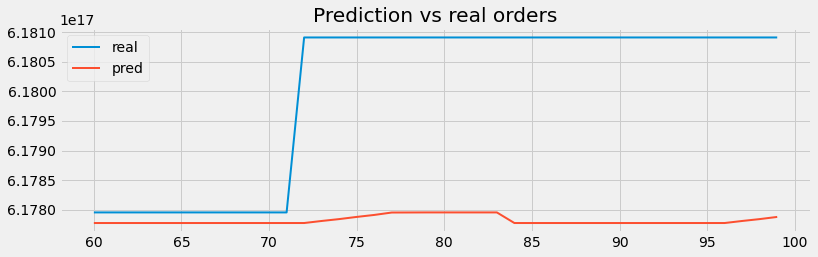

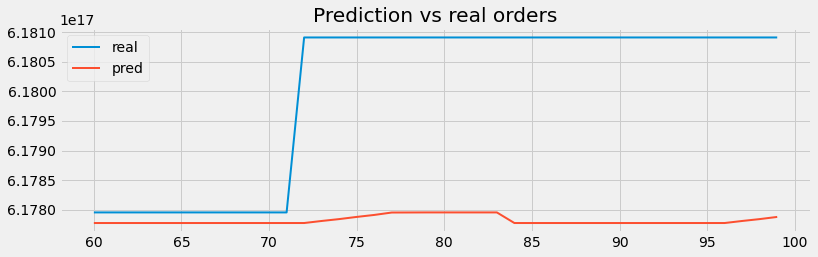

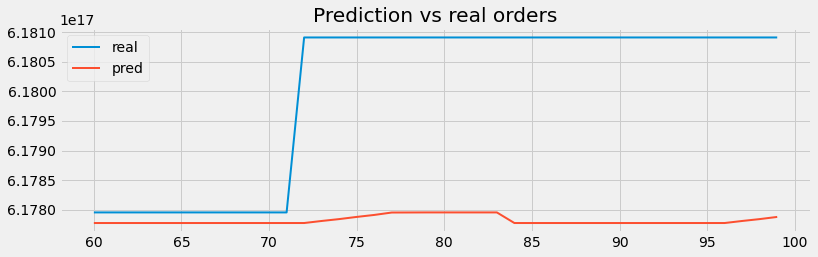

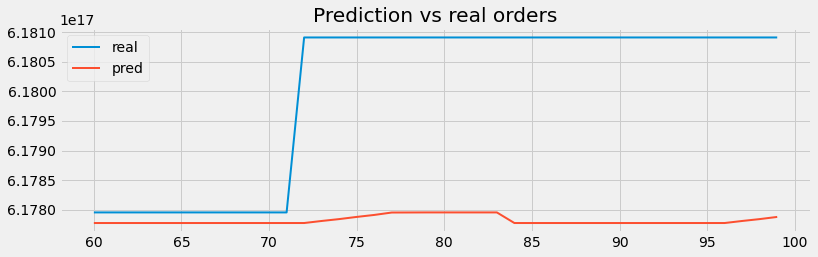

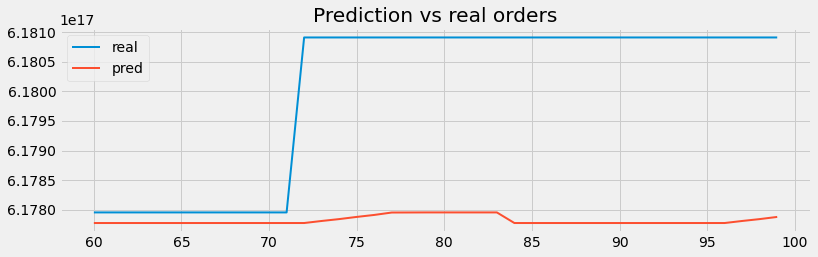

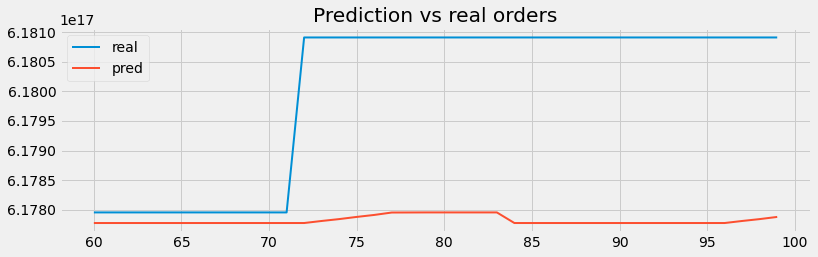

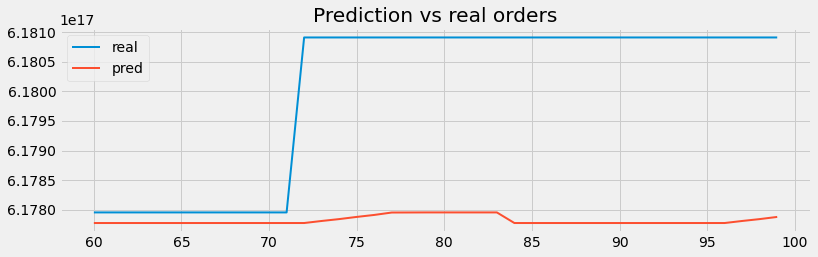

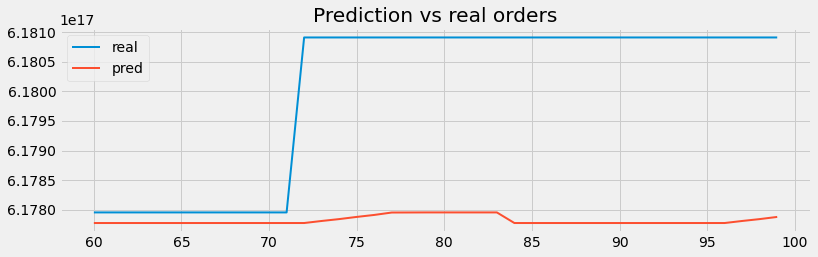

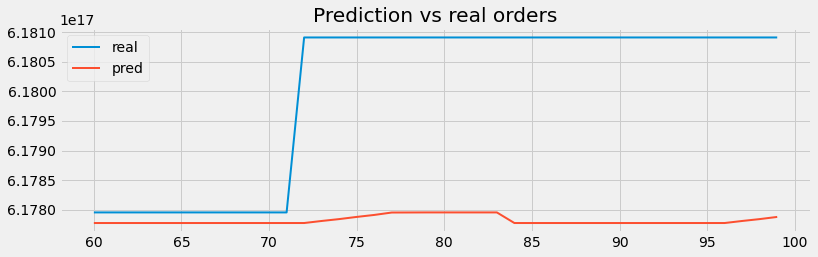

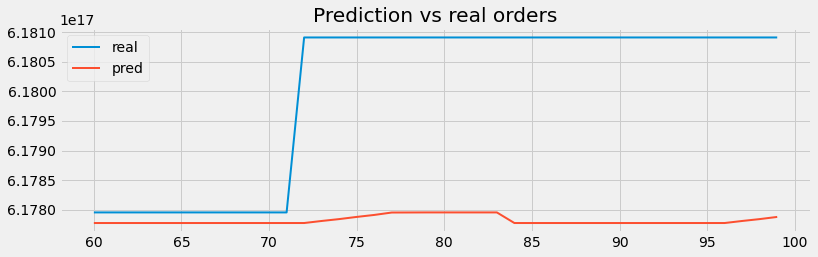

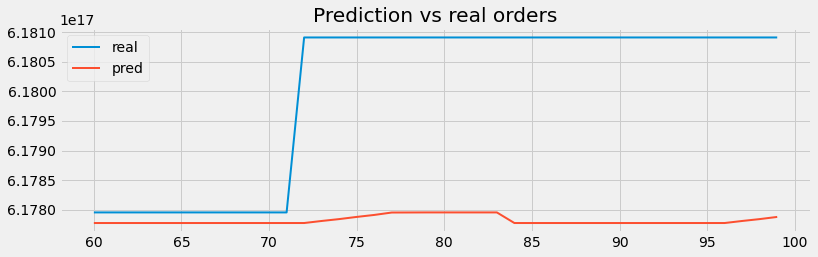

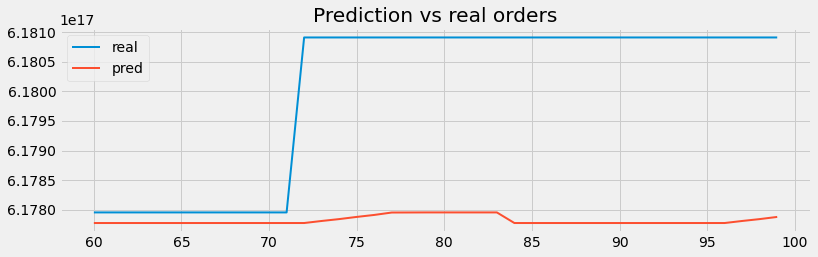

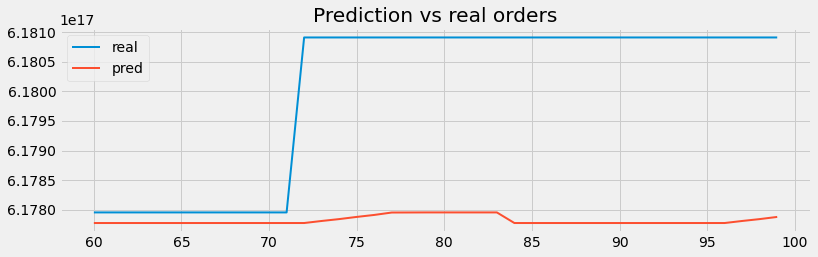

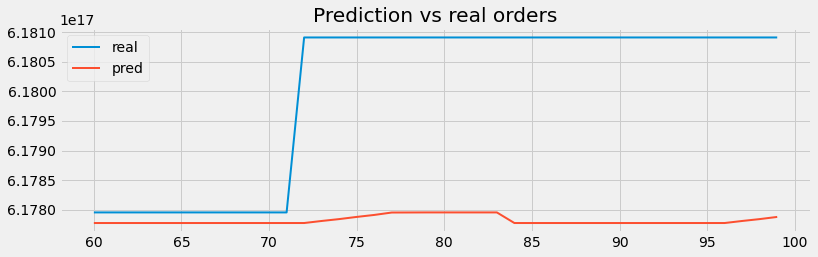

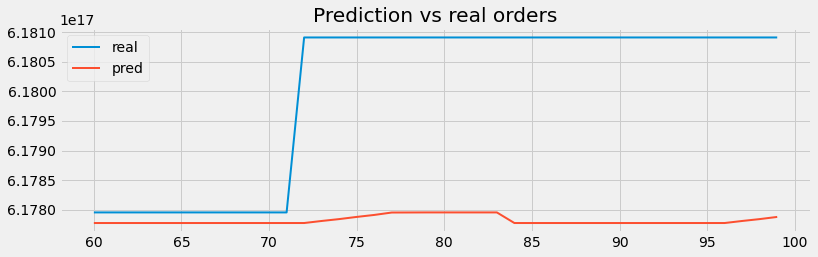

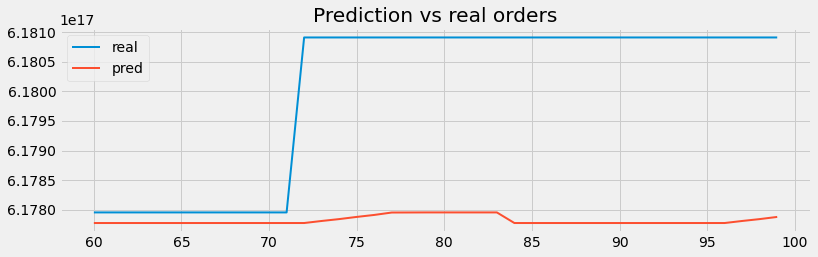

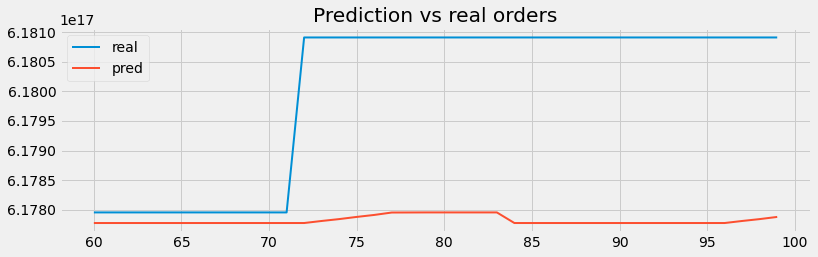

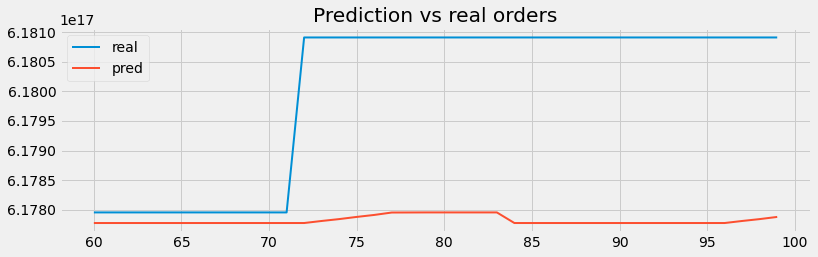

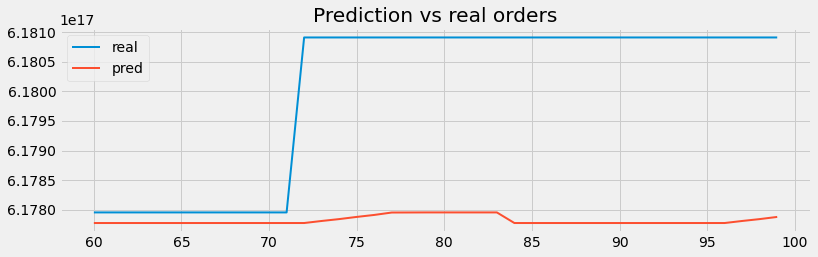

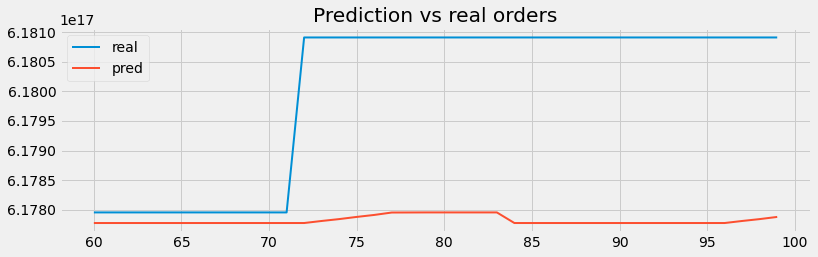

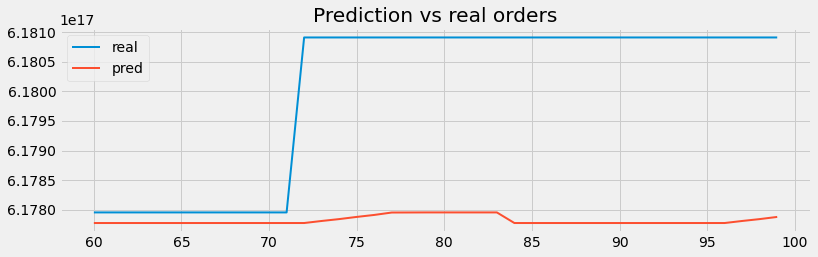

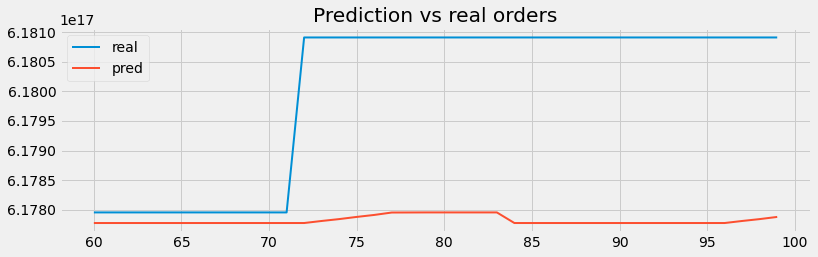

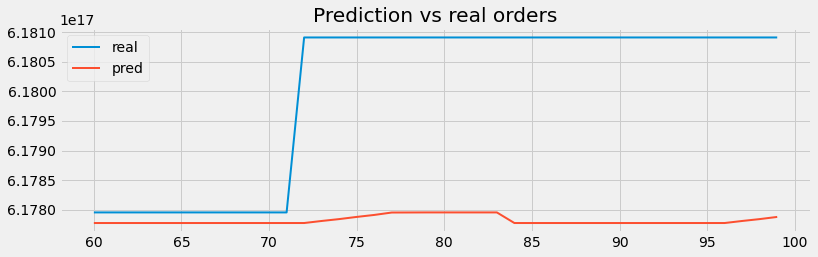

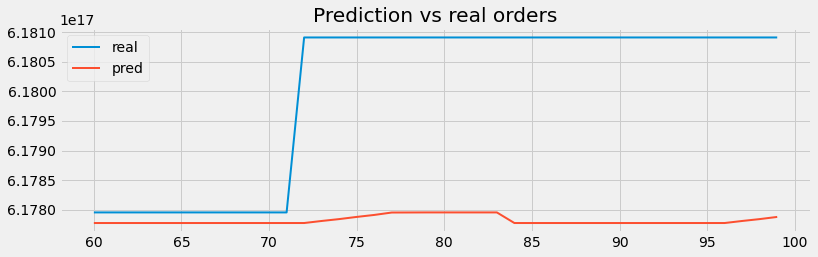

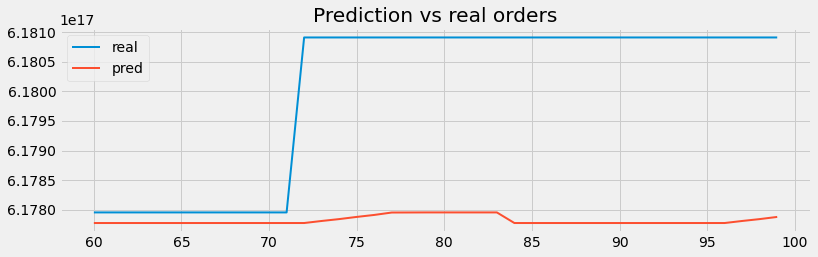

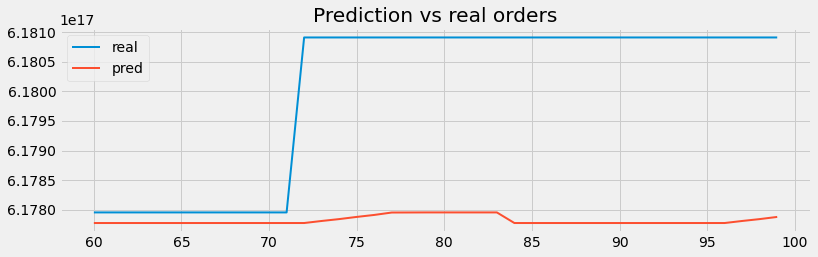

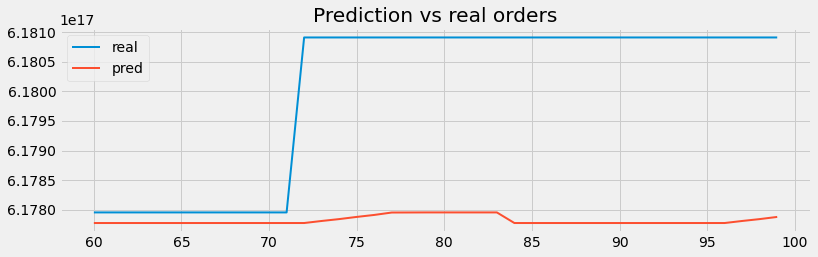

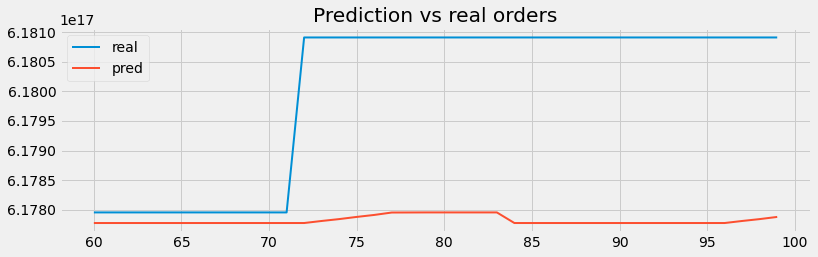

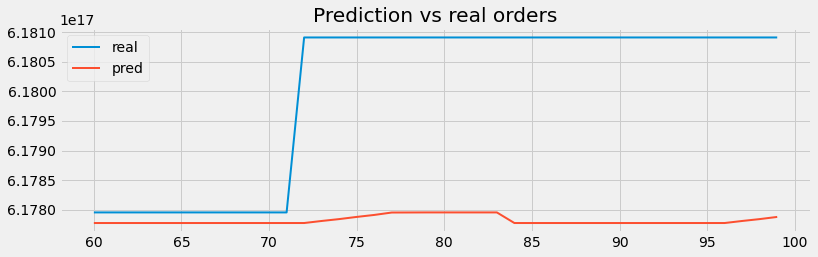

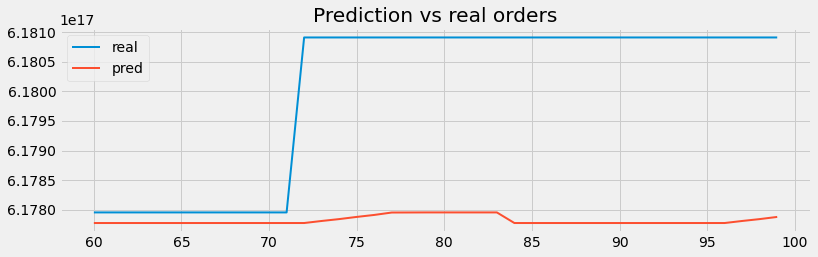

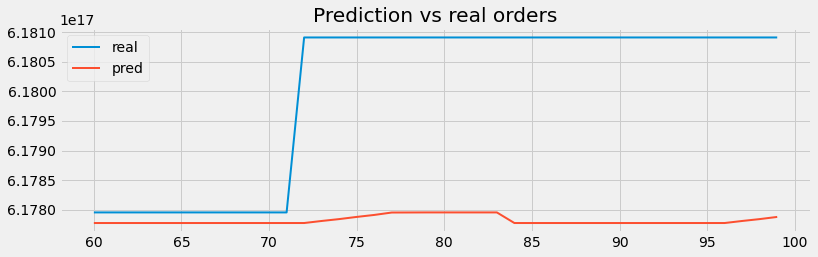

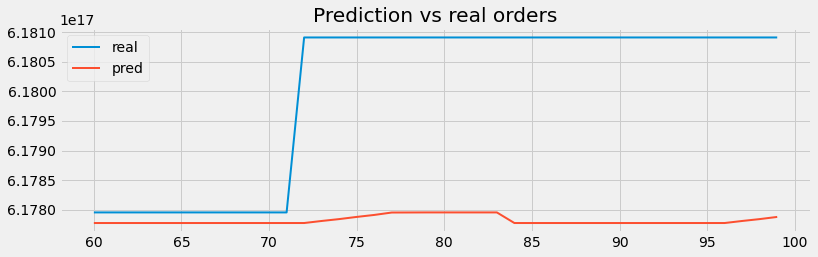

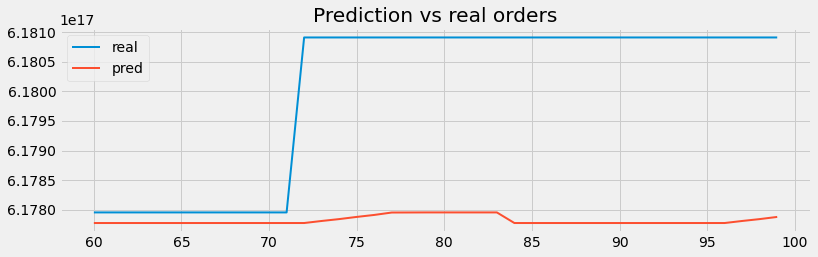

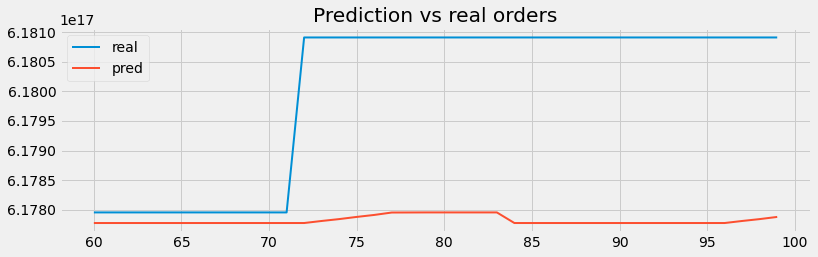

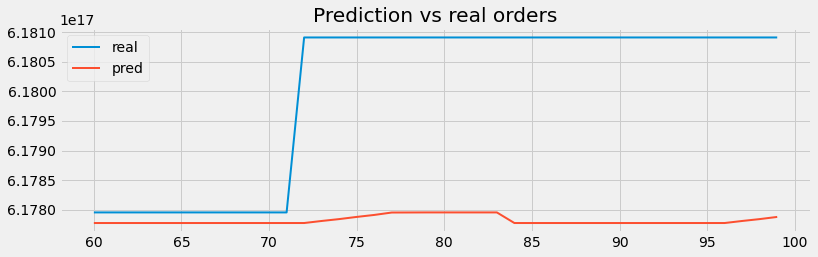

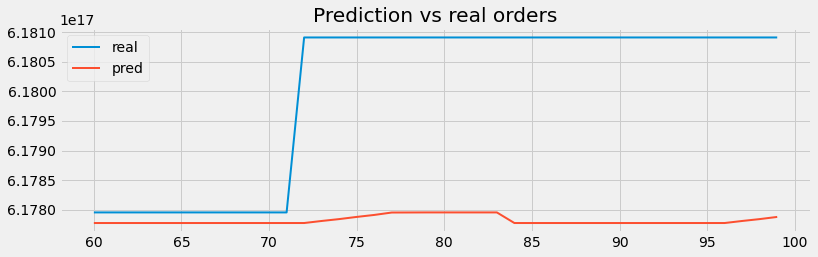

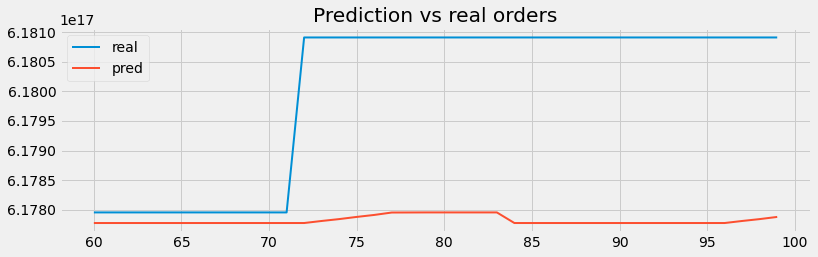

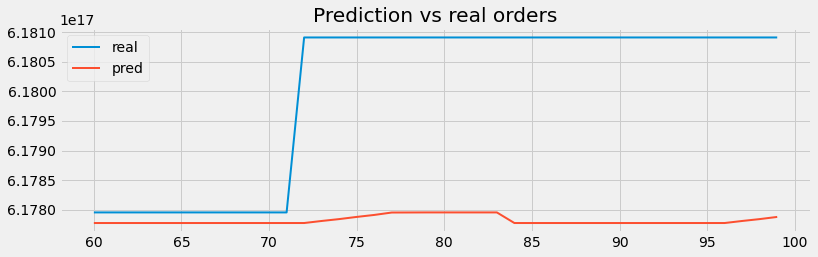

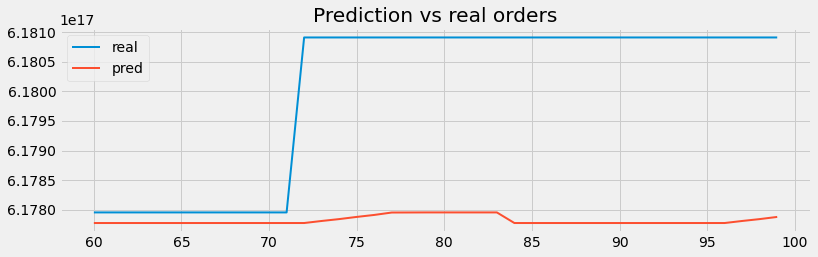

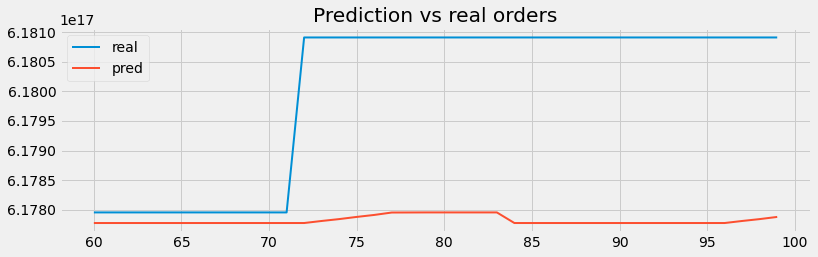

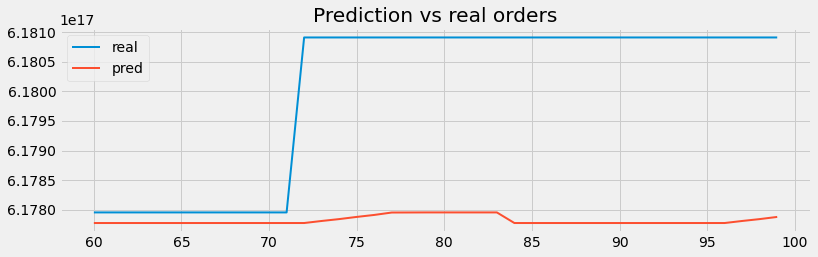

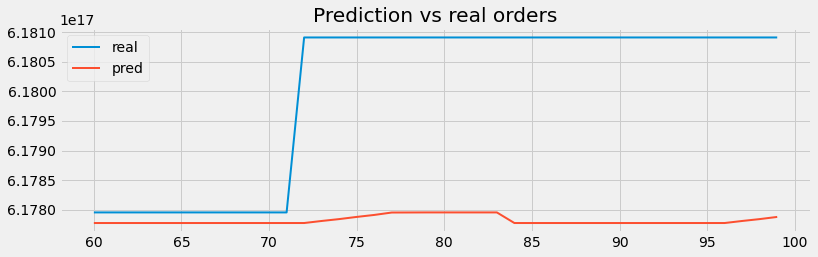

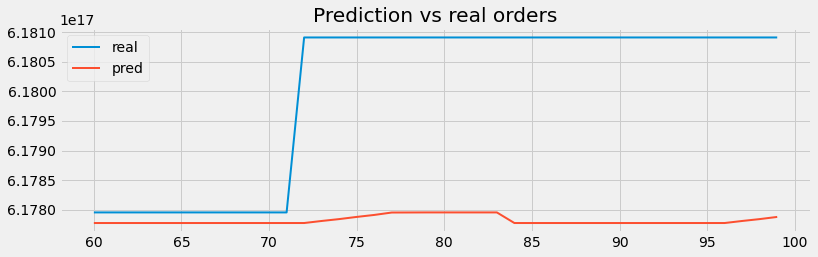

In [177]:
# Backtest final model
# ==============================================================================
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = table11,
                            initial_train_size = len(table11[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

for row in table11:                        
    fig, ax = plt.subplots(figsize=(12, 3.5))
    table11.loc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();

In [178]:
forecaster = ForecasterAutoregMultiOutput(
                regressor = AdaBoostRegressor(),
                steps     = 36,
                lags      = 20 # This value will be replaced in the grid search
             )

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500]}

# Lags used as predictors
lags_grid = [[1, 2, 3, 4, 20], [1, 2, 3, 10, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = table11,
                        exog        = dataxx1,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 20,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = 56,
                        return_best = True,
                        verbose     = False
                  )

Number of models compared: 4


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:00<00:00,  5.52it/s]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4 20] 
  Parameters: {'n_estimators': 100}
  Backtesting metric: 203673912457774.53



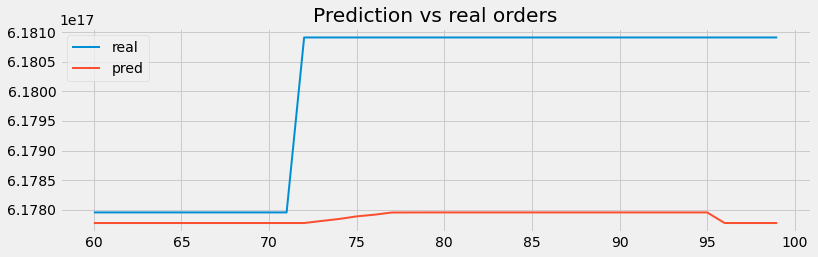

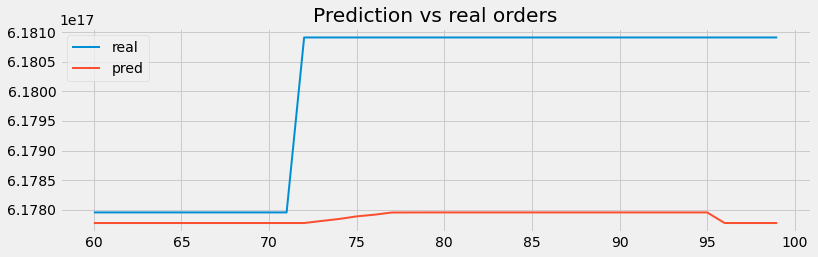

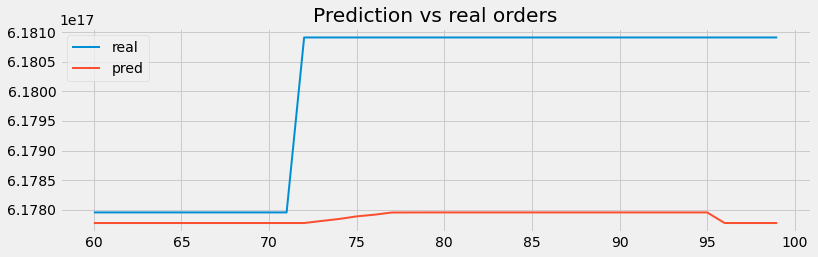

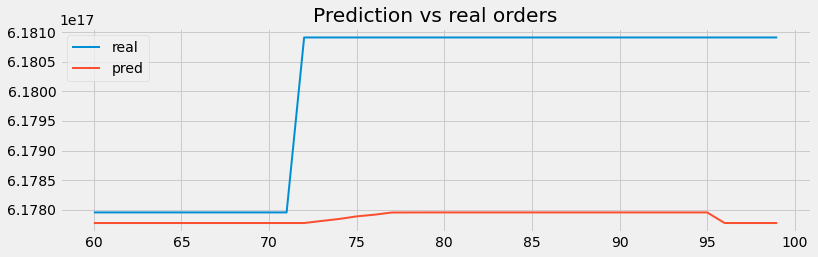

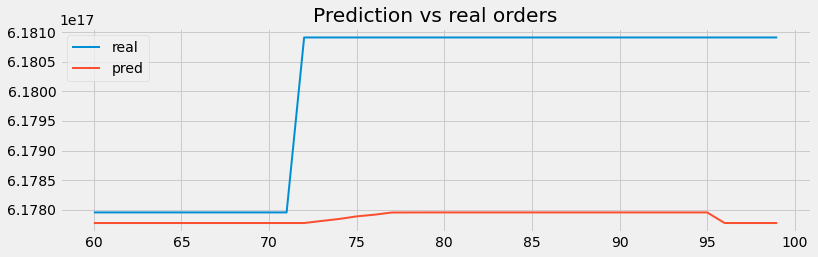

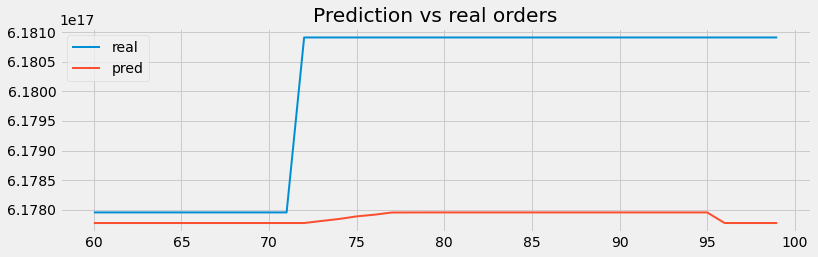

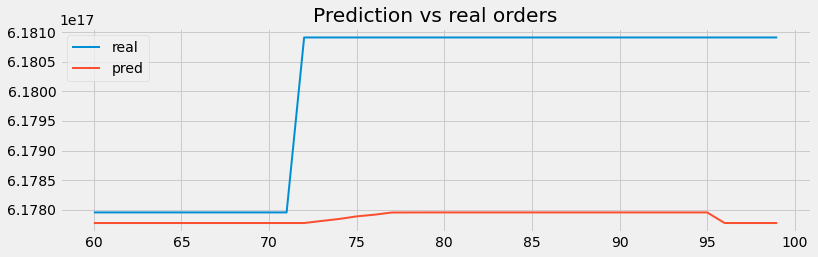

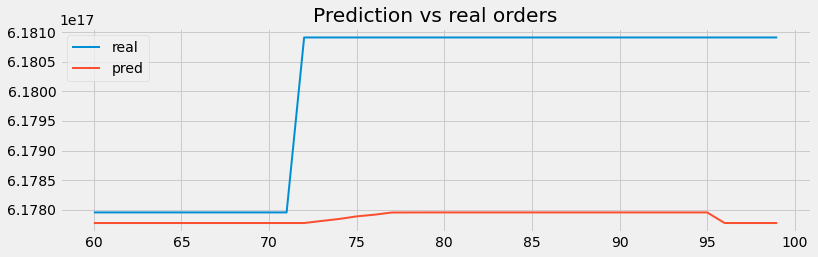

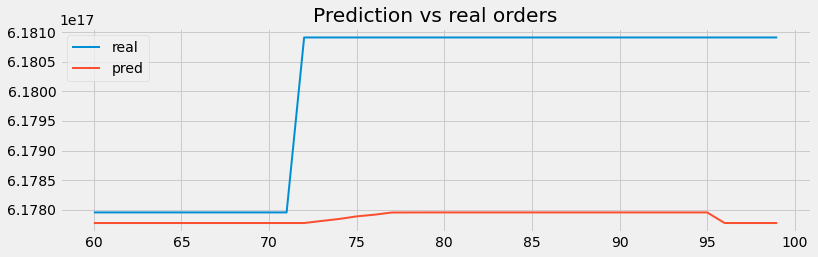

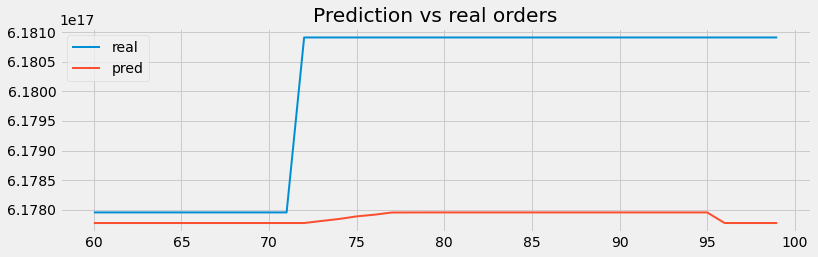

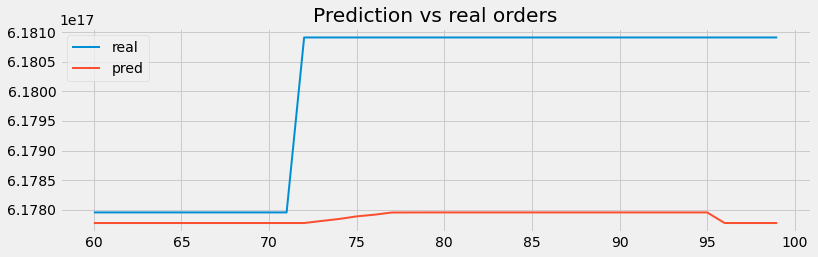

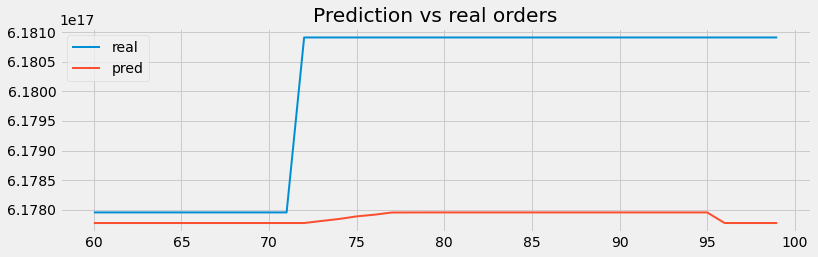

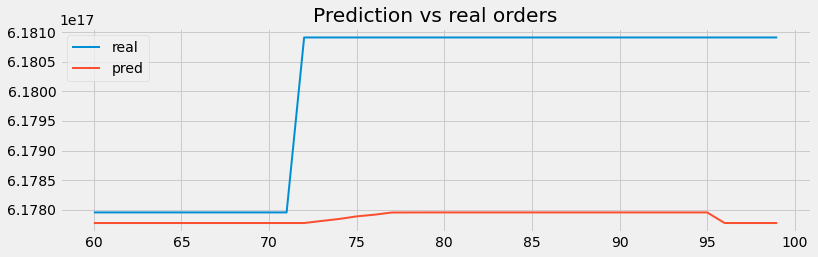

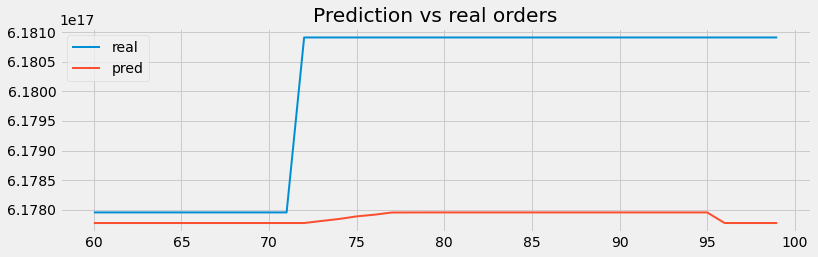

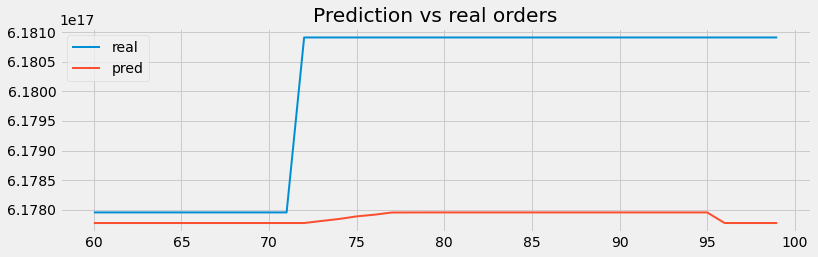

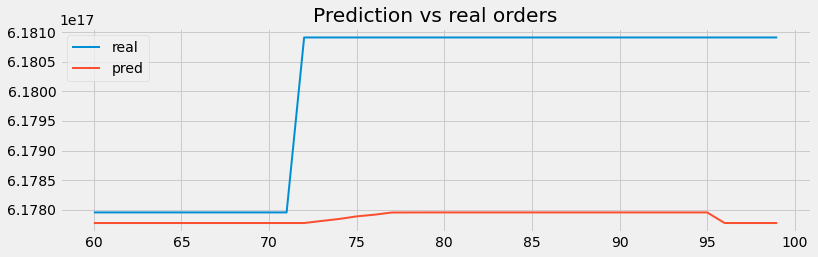

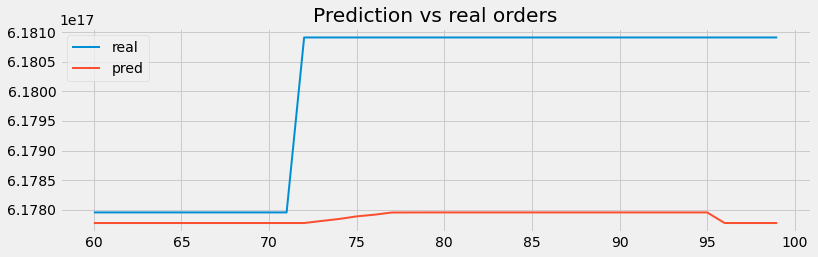

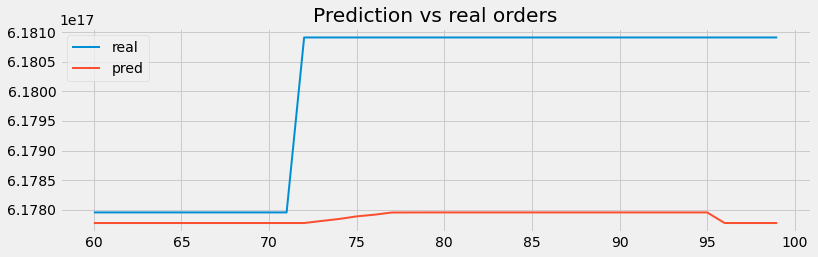

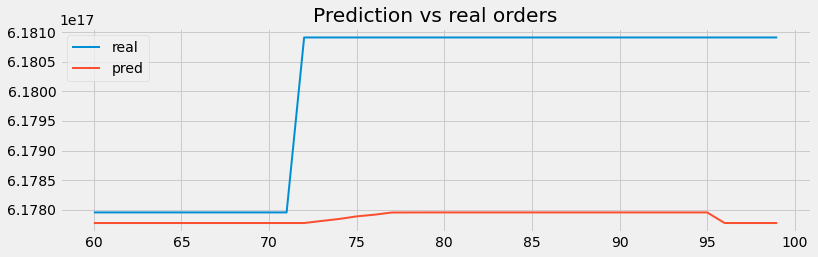

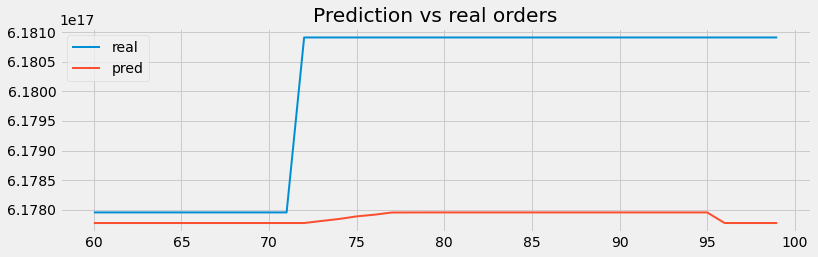

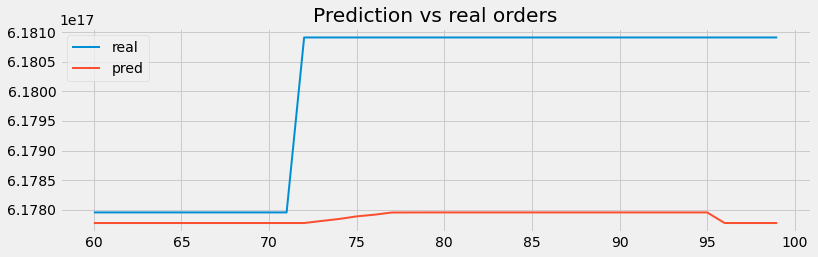

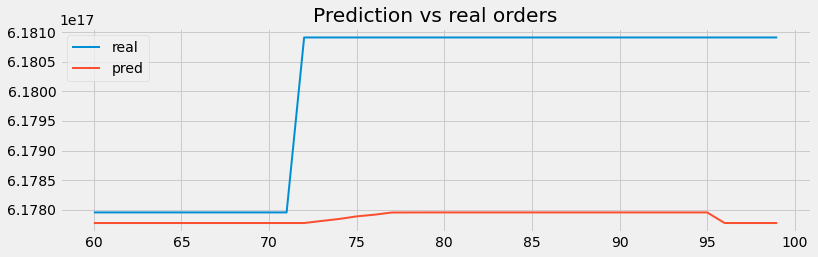

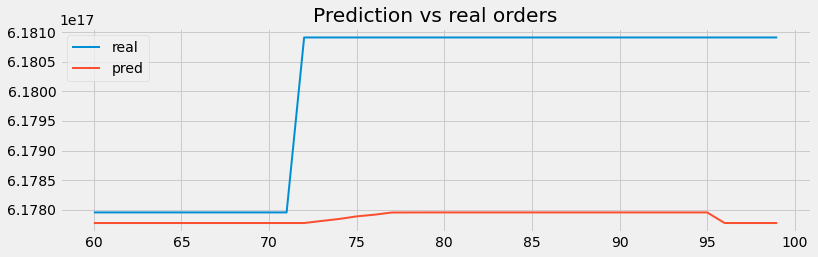

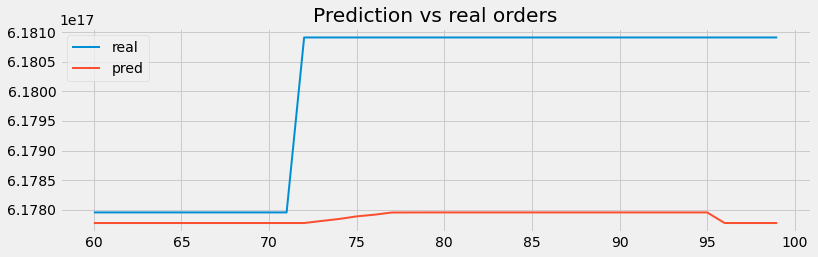

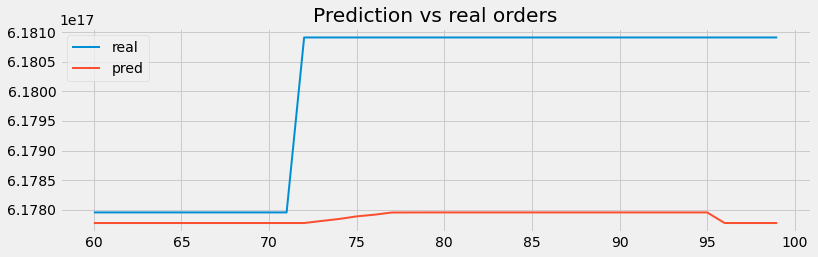

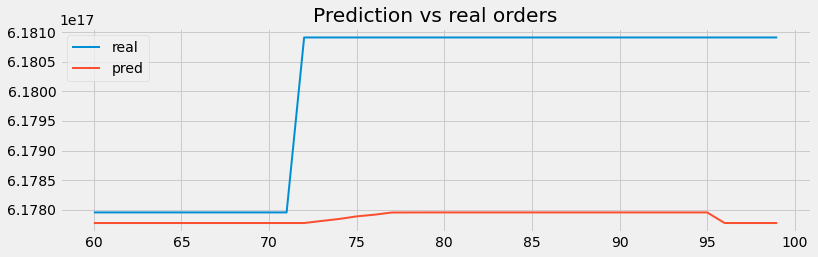

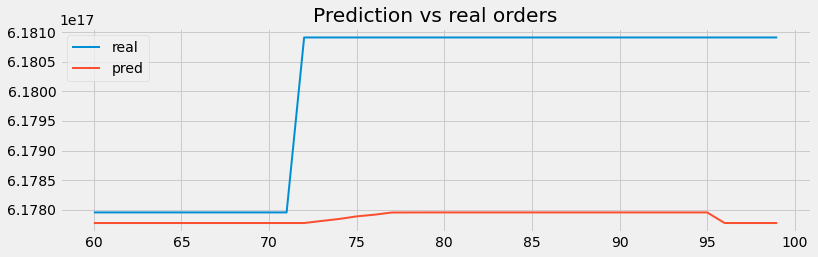

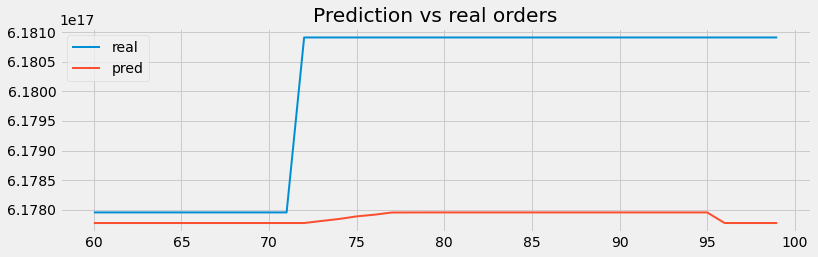

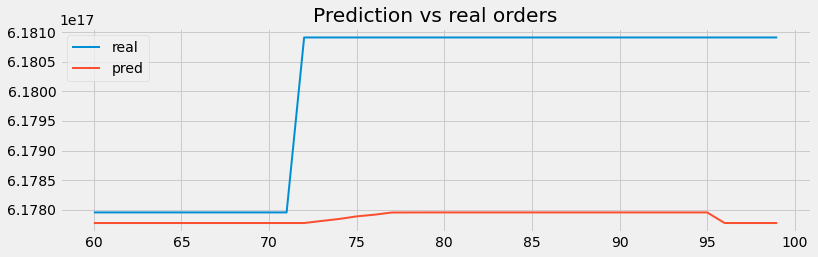

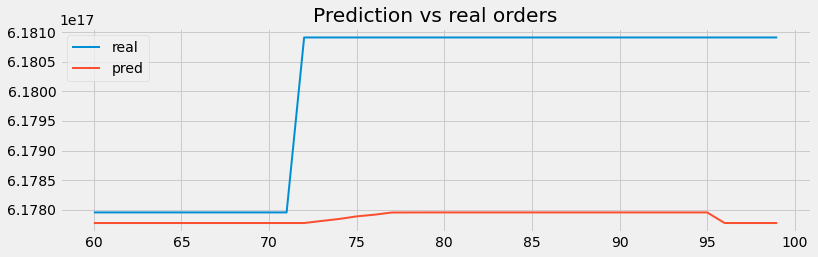

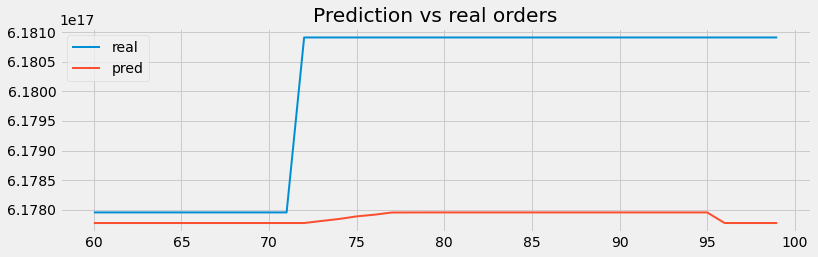

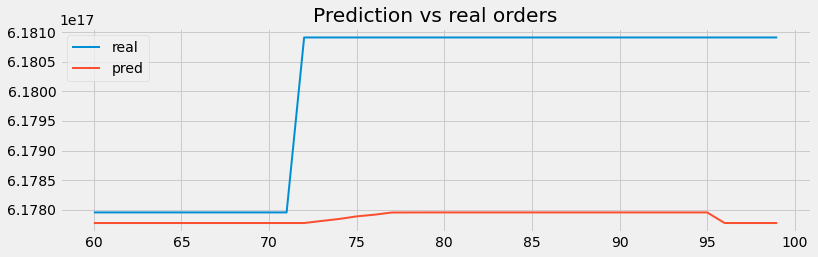

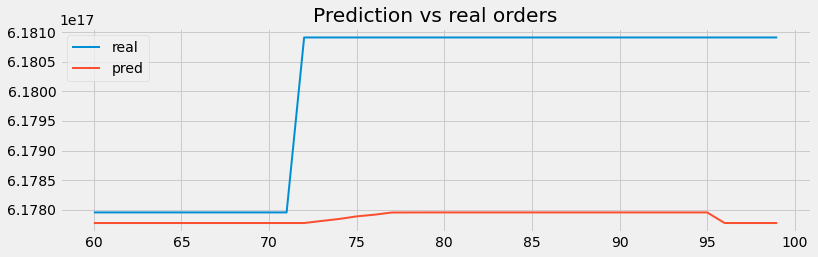

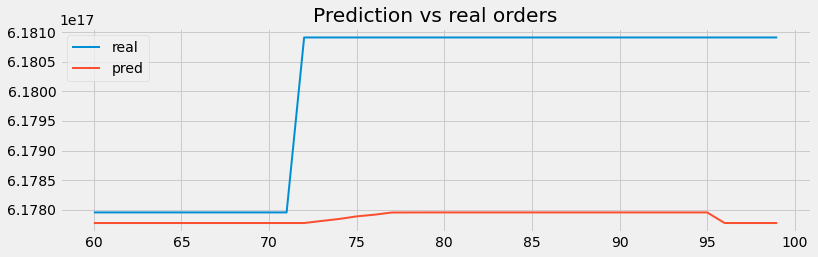

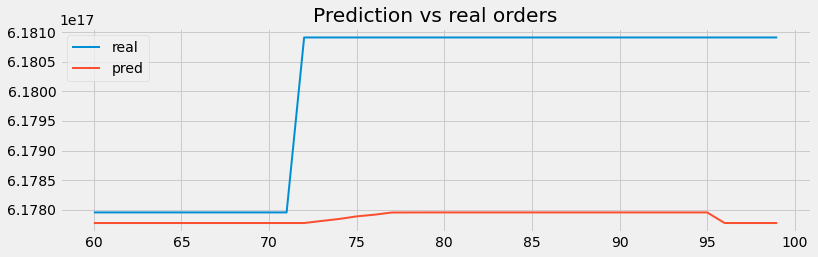

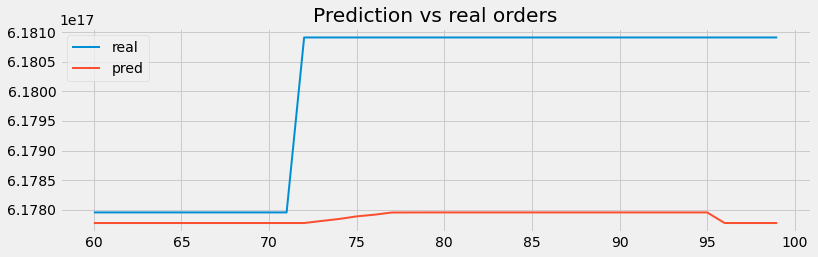

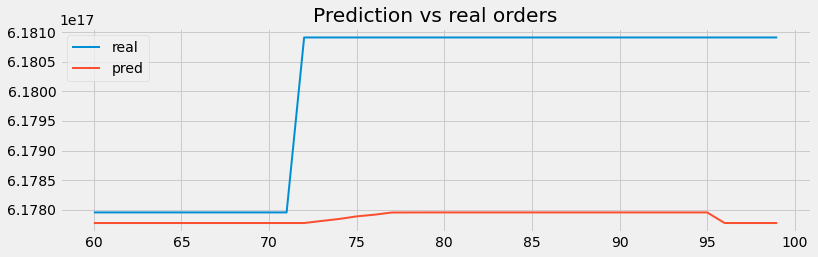

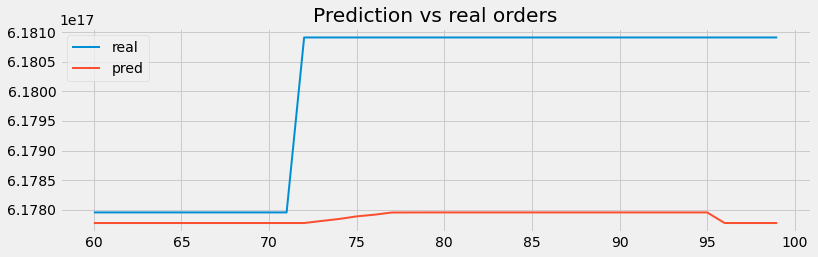

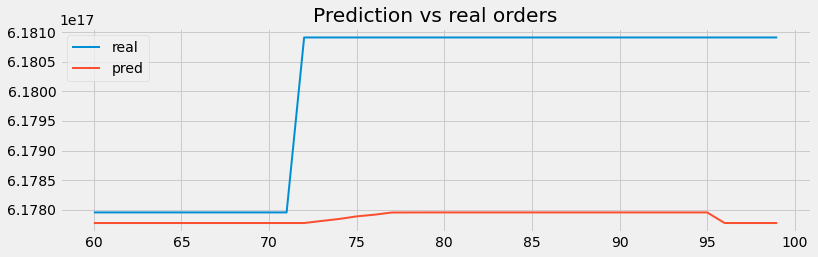

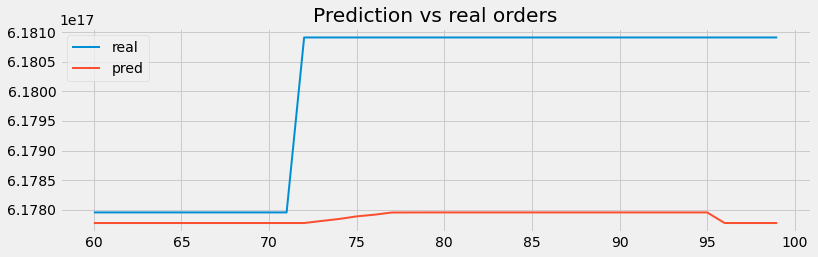

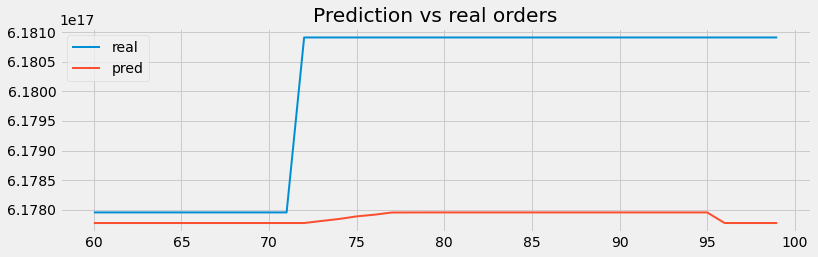

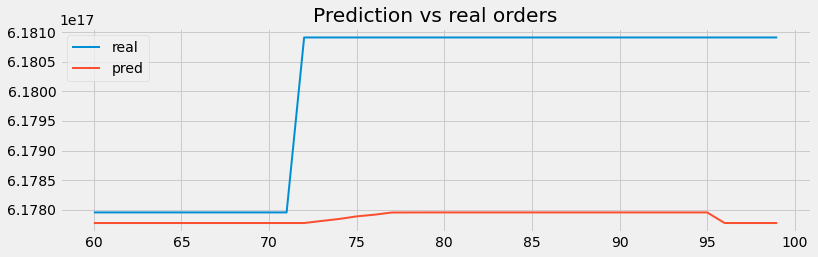

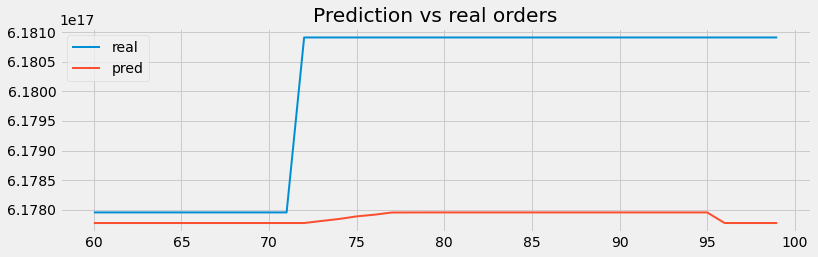

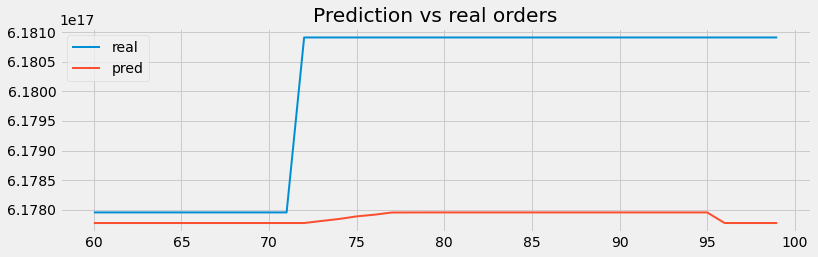

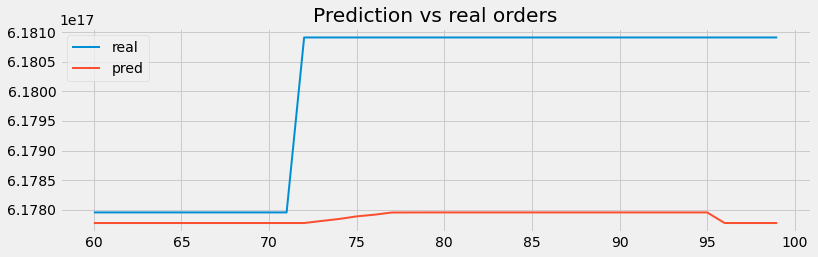

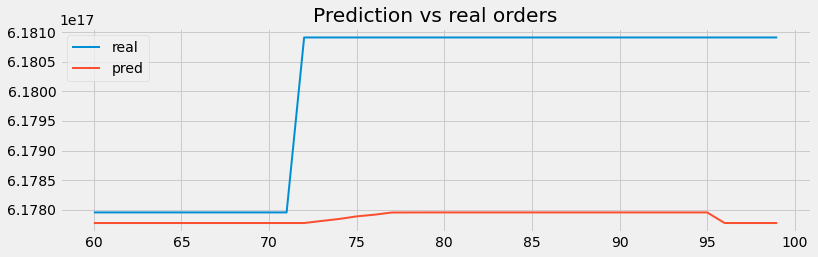

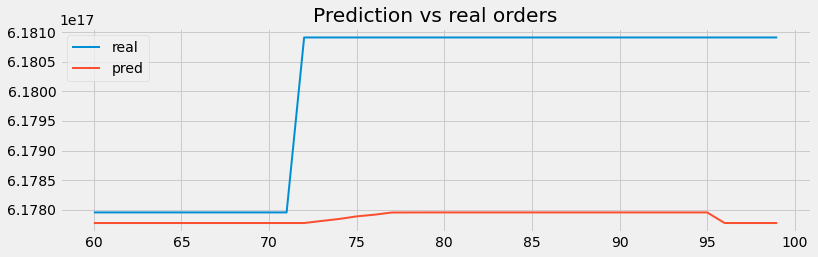

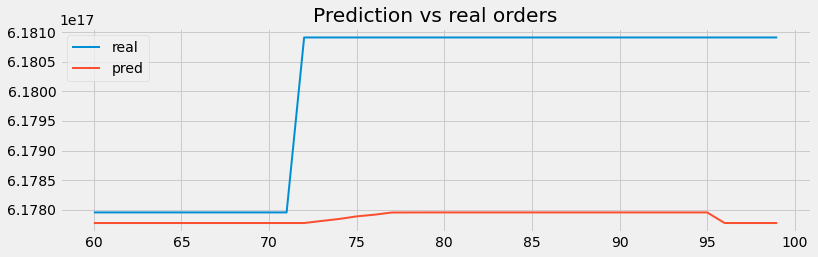

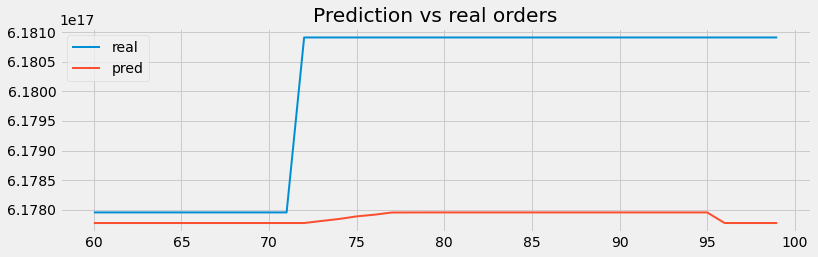

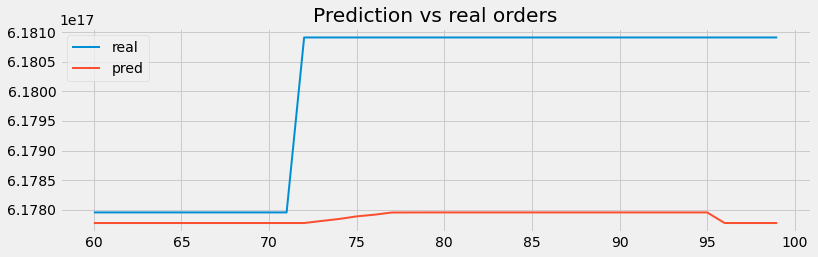

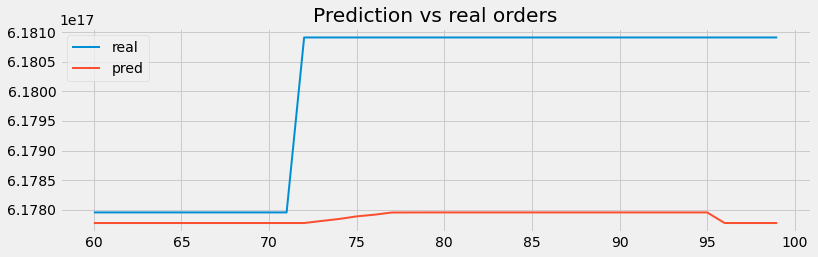

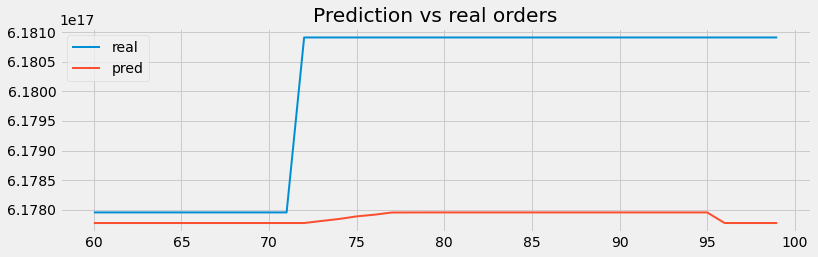

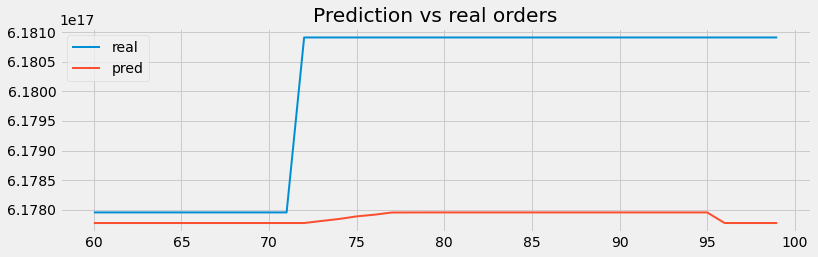

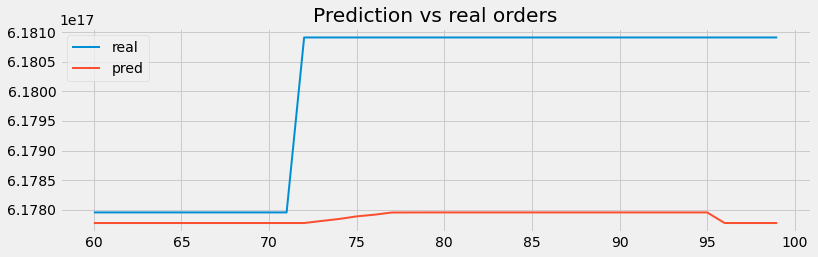

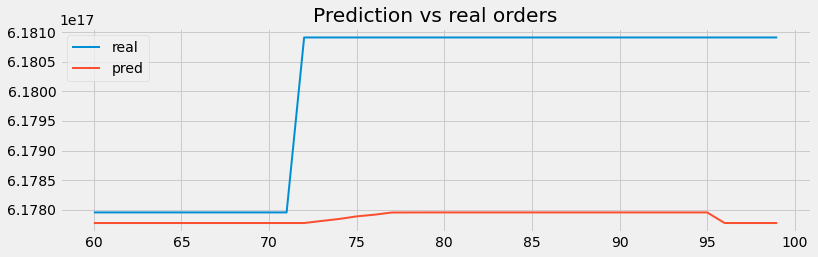

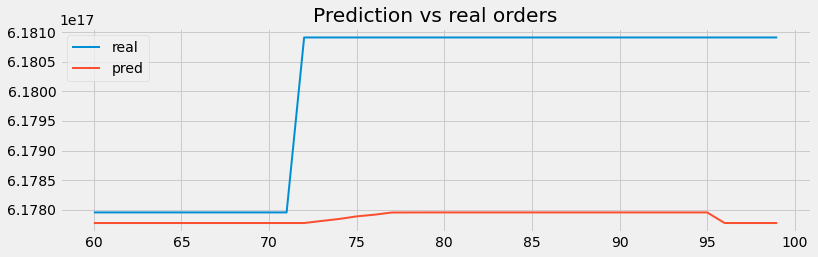

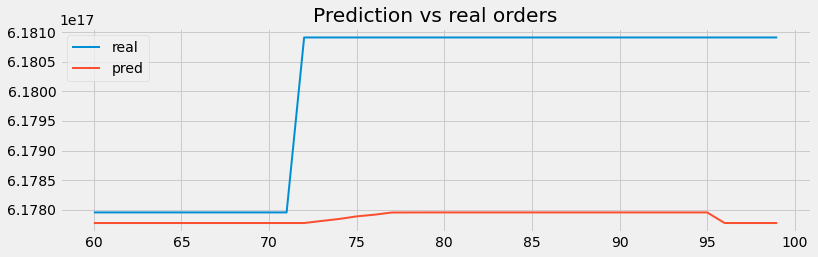

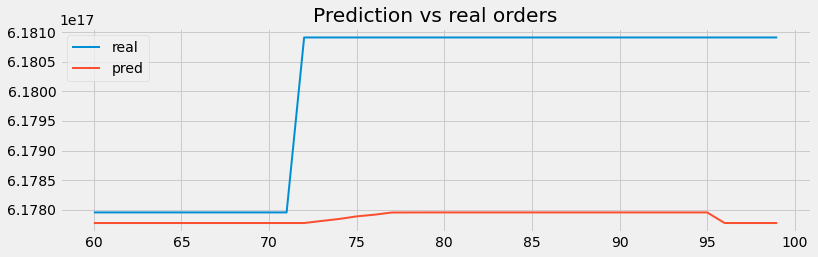

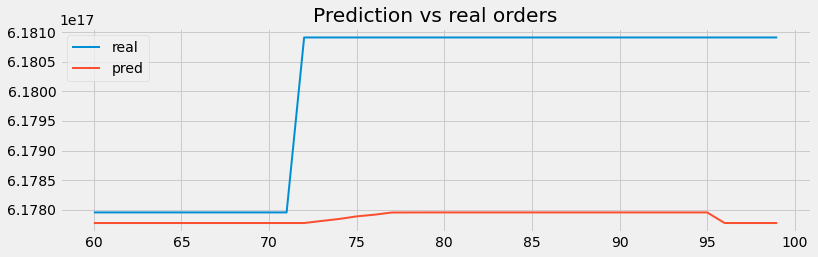

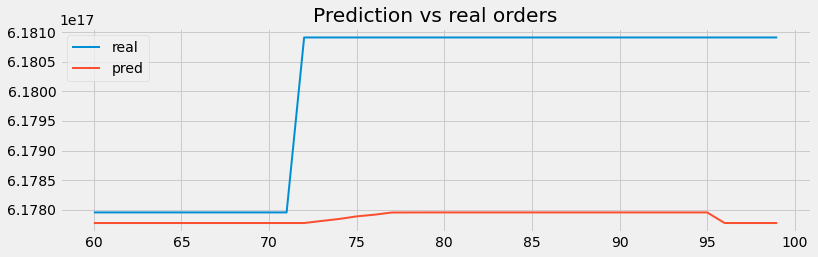

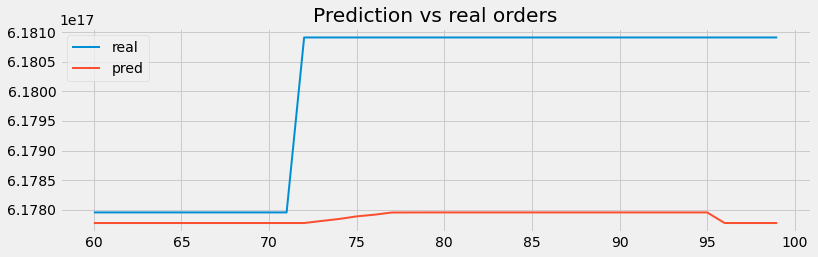

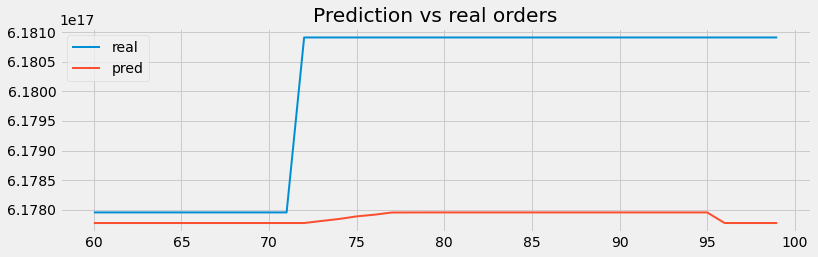

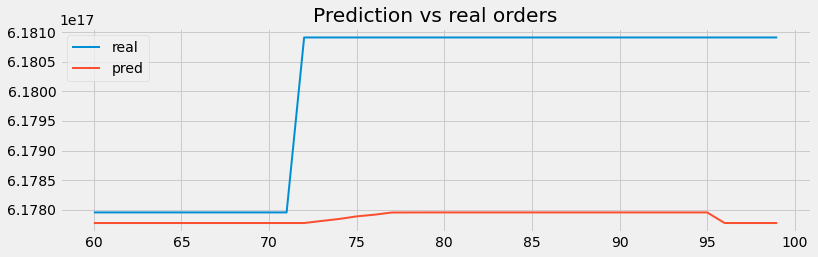

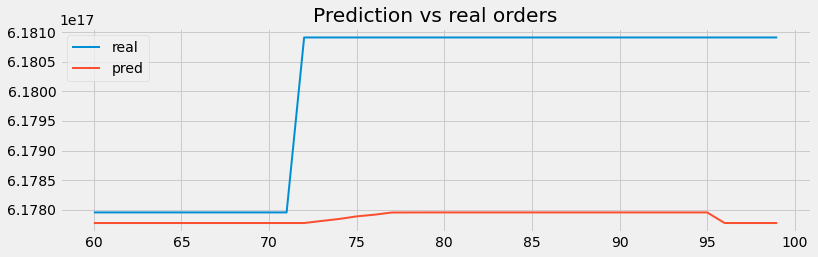

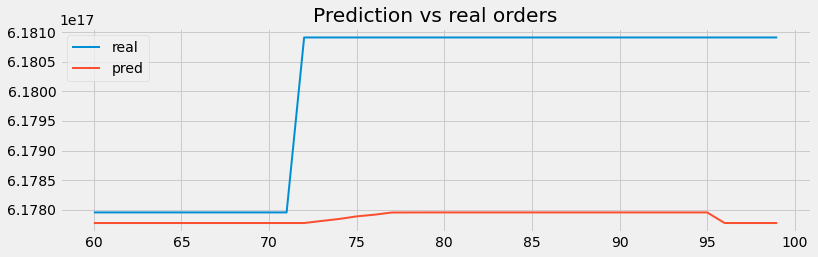

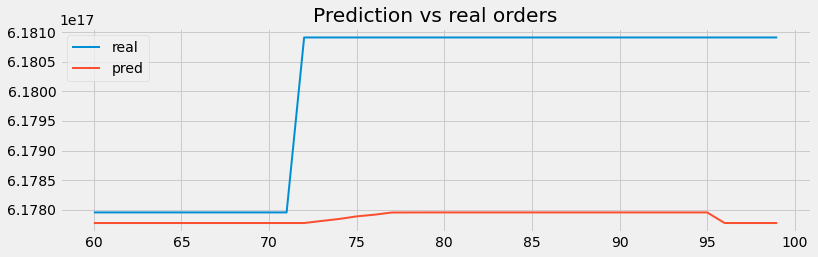

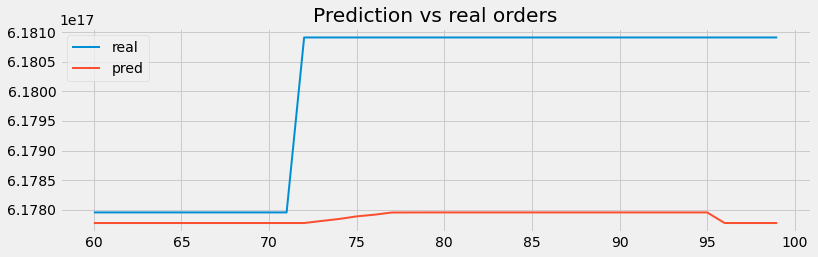

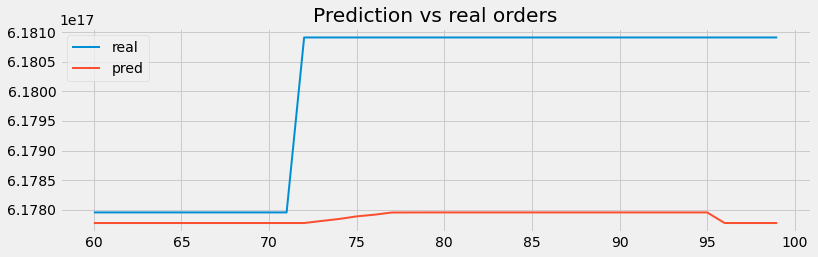

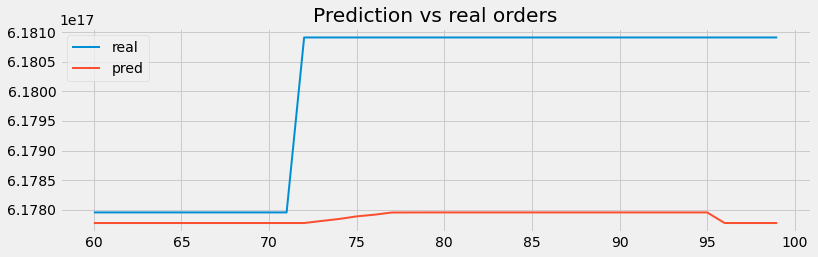

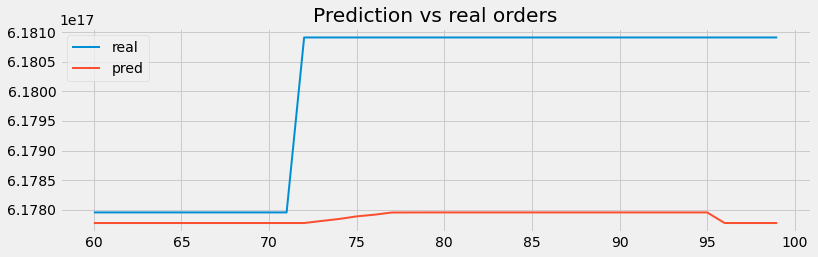

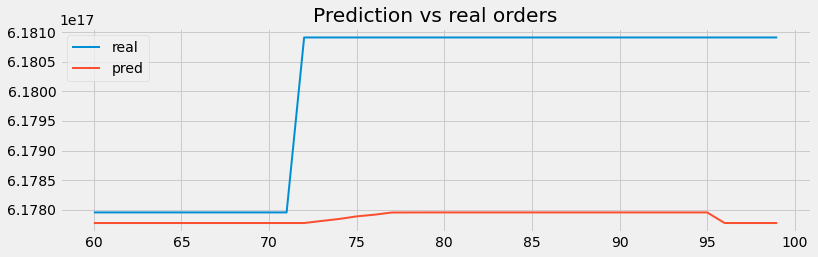

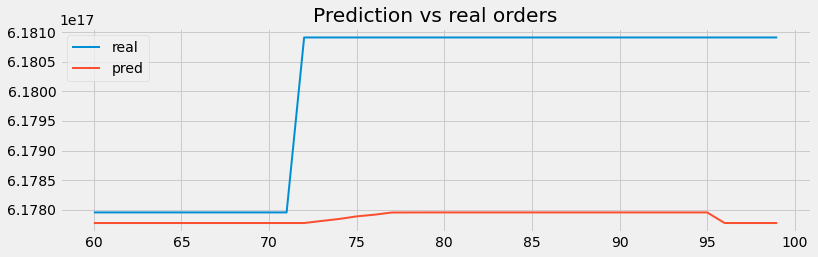

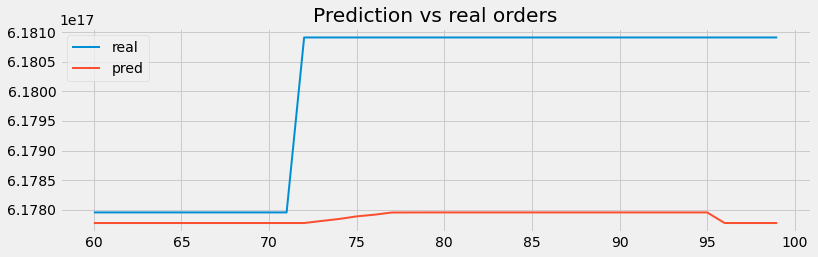

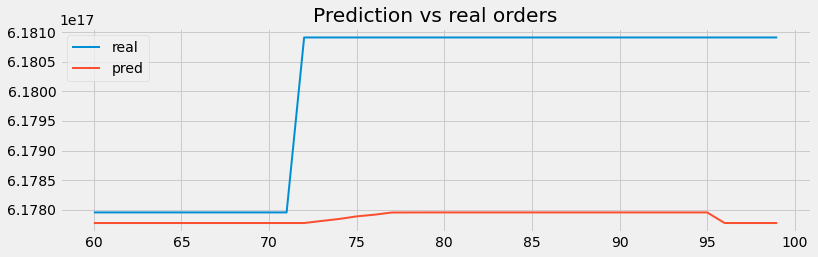

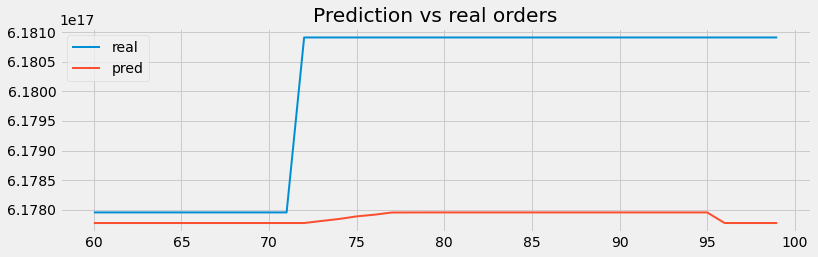

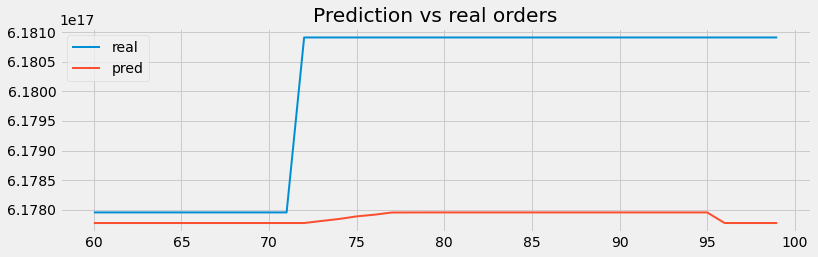

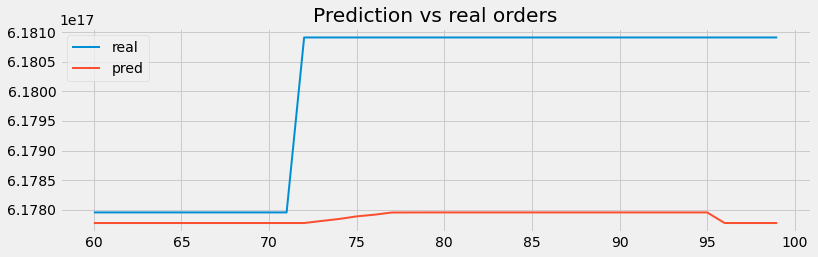

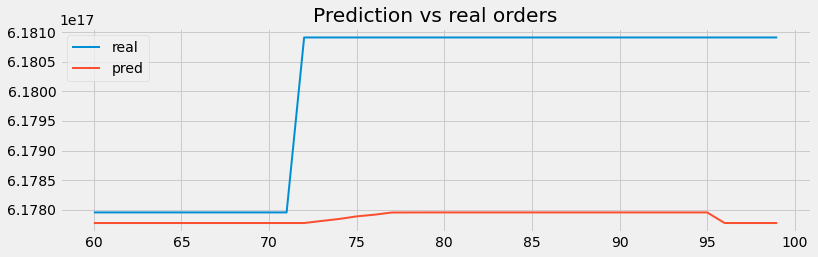

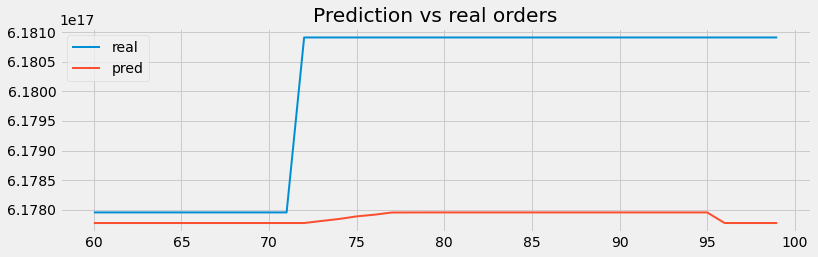

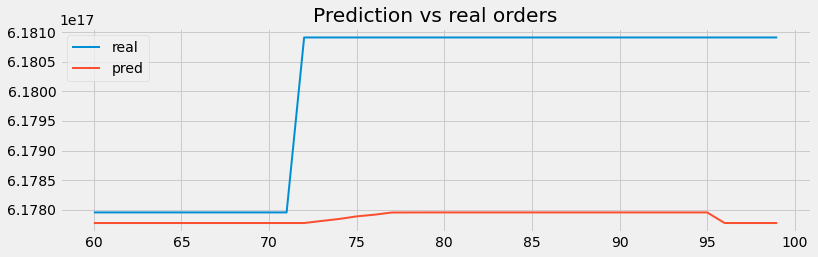

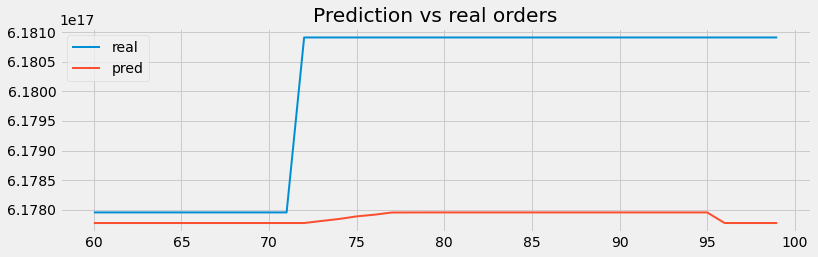

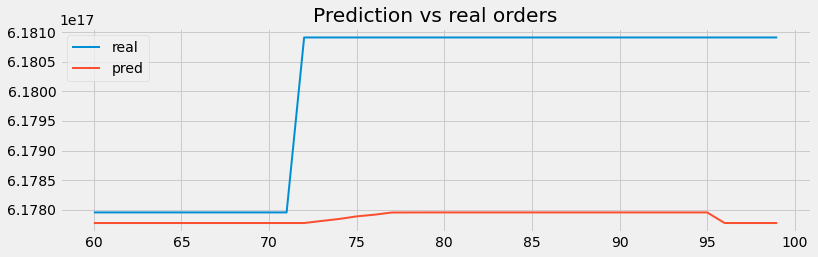

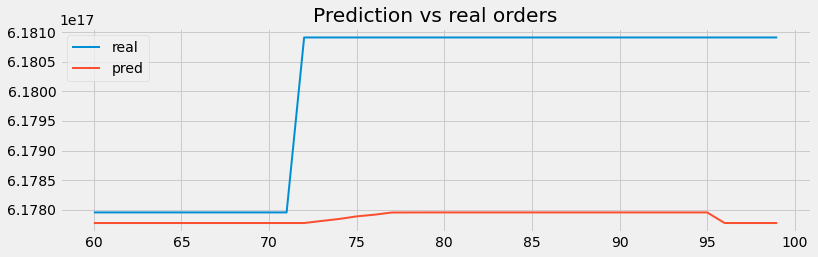

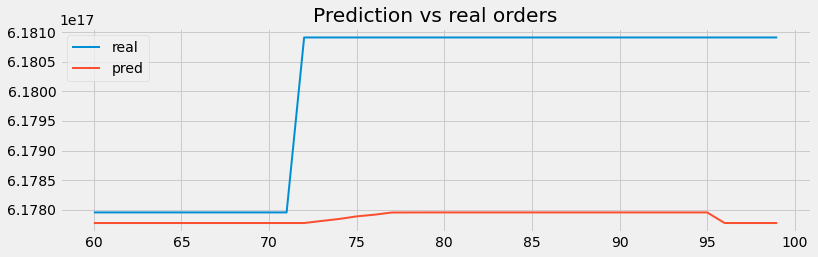

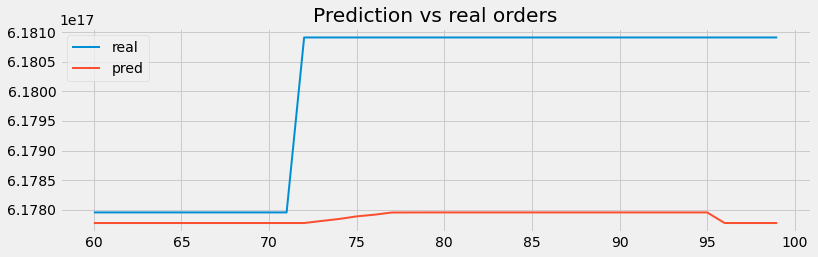

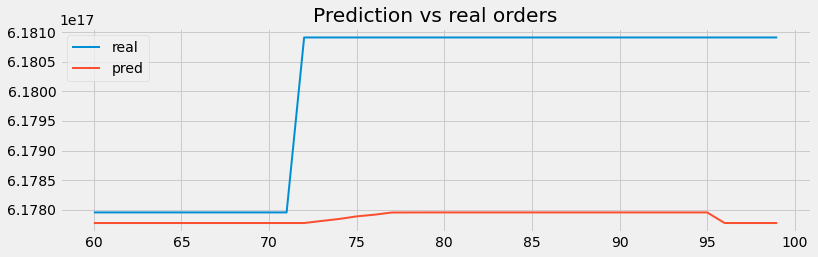

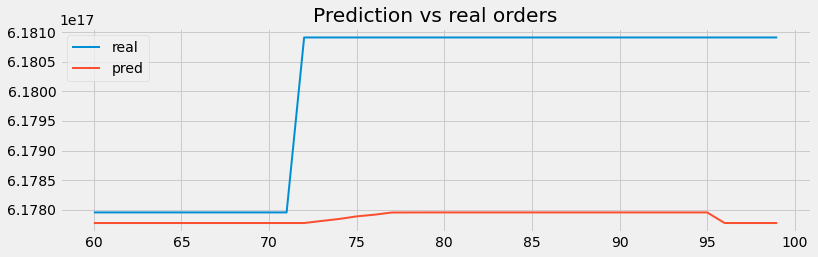

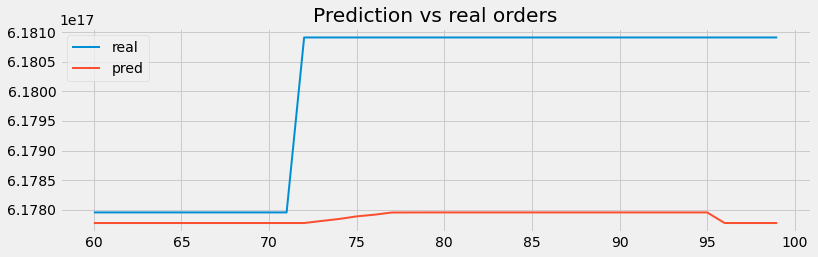

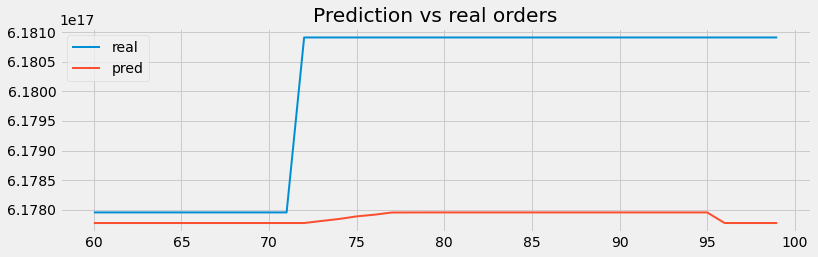

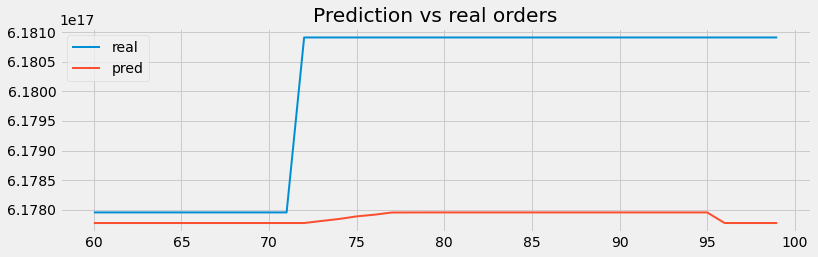

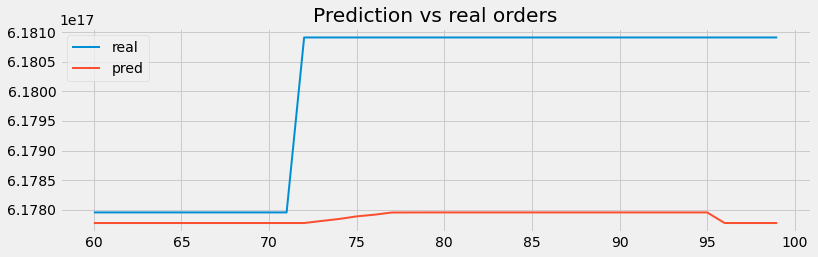

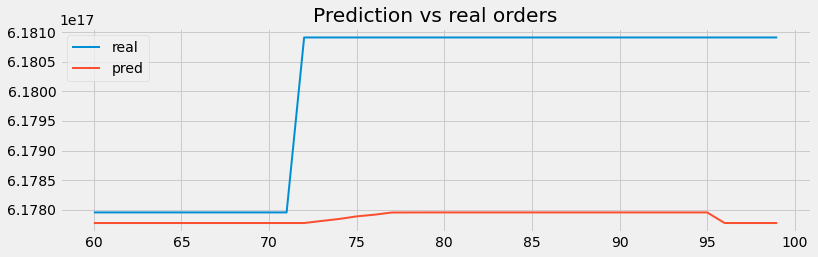

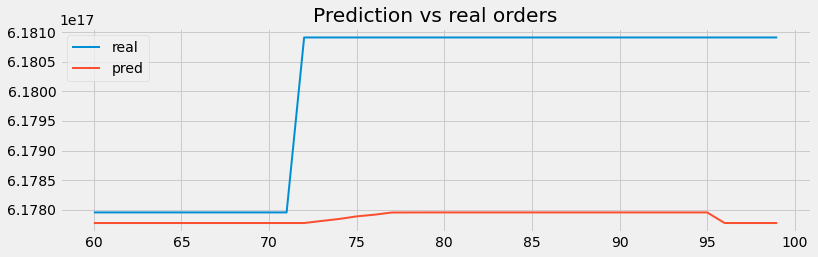

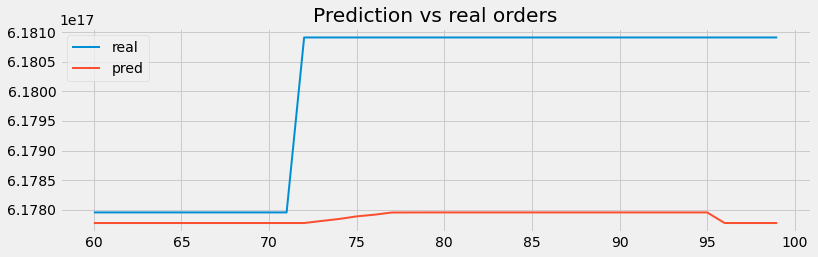

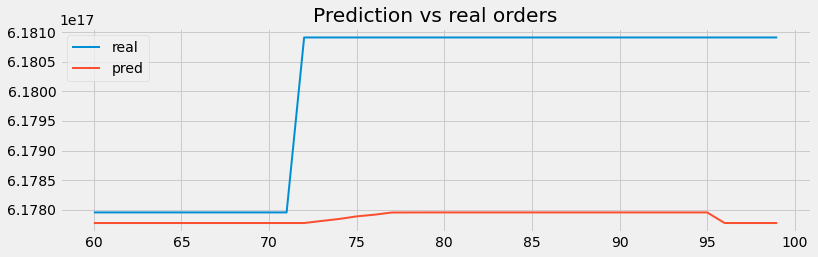

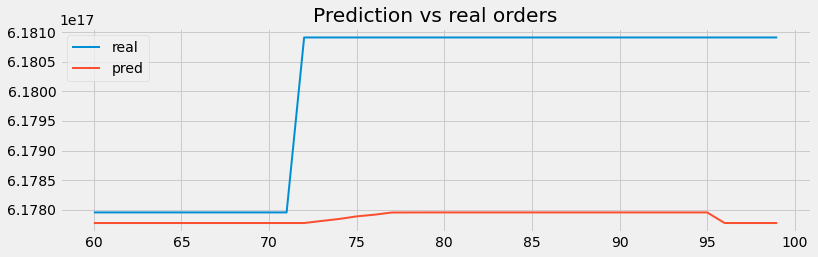

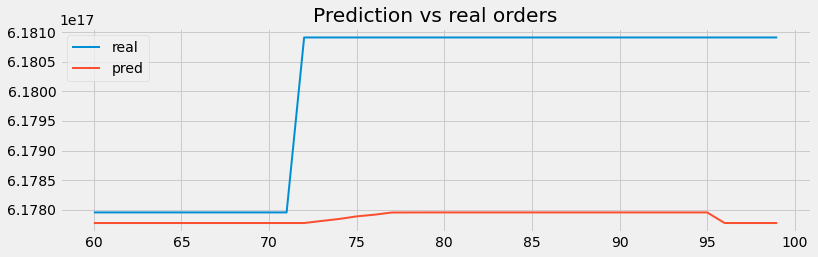

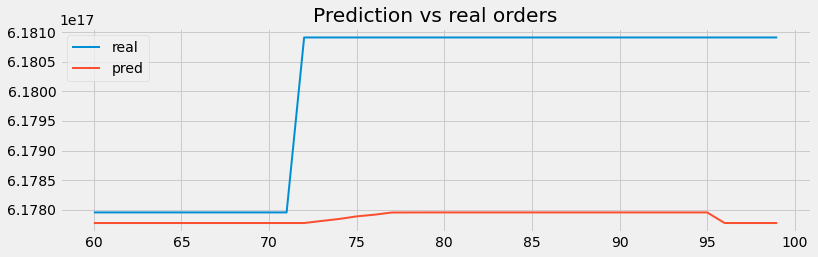

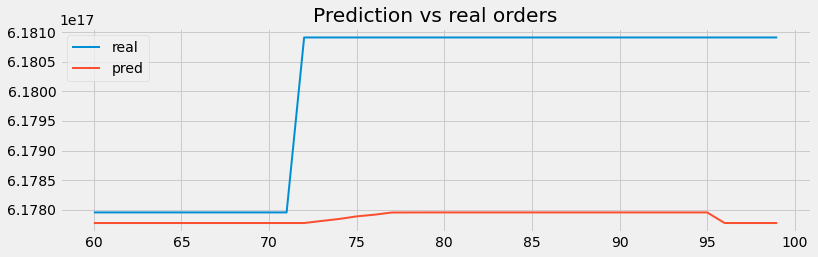

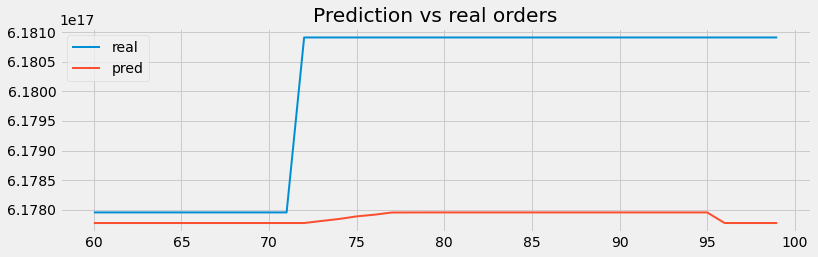

In [417]:
# Backtest final model
# ==============================================================================
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = table11,
                            initial_train_size = len(table11[:end_validation]),
                            steps      = 36,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False)

for row in table11:                        
    fig, ax = plt.subplots(figsize=(12, 3.5))
    table11.loc[predictions.index].plot(linewidth=2, label='real', ax=ax)
    predictions.plot(linewidth=2, label='prediction', ax=ax)
    ax.set_title('Prediction vs real orders')
    ax.legend();

In [ ]:
results_grid

In [ ]:
# Experiental custo

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
learning_rate = 0.4  
iterations = 10
l2_penality = 0.01
b = RidgeRegression(learning_rate, iterations, l2_penality) 
